In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import regularizers
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from keras.layers.normalization import BatchNormalization


from IPython import embed


def import_data(dataset="data"):
    X = []
    Y = []

    f=open(dataset, 'r')
    for line in f.readlines():
        intLine = [int(s) for s in line.split(' ')]
        X.append(intLine[:-1])
        Y.append(intLine[-1:])
    
    X = np.array(X)
    X = X.reshape(X.shape[0],X.shape[1],1)
    Y = np.array(Y)
    return X,Y

def create_CCN_model(input_size, f, k):
    model = Sequential()

    model.add(Conv1D(f, k, activation='selu', kernel_initializer="lecun_uniform", input_shape=(input_size, 1 ))) 
    model.add(Flatten()) 
    
    model.add(Dense(input_size, activation='selu', kernel_initializer="lecun_uniform"))
    model.add(Dense(input_size, activation='selu', kernel_initializer="lecun_uniform"))
    model.add(Dense(input_size, activation='selu', kernel_initializer="lecun_uniform"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), metrics=['binary_crossentropy', 'accuracy'])
    return model

def draw_figure(data, label, fig=None, ax=None):
    # Plot the change in the validation set vs change in the training set
    if not fig:
        fig = plt.figure(figsize=(6, 4))
    if not ax:
        ax = fig.add_subplot(111)
    
    
    real_data = []
    scale = int(len(data[0])/50)
    
    
    
    for i in range(0, 50):
        real_data.append(data[0][i*scale])
    
    ax.plot(np.arange(1, len(data[0]) + 1, scale), real_data, label=label)
    ax.legend(loc='best')
    ax.set_xlabel('Epoch number')
    return fig, ax

Using TensorFlow backend.



Training examples: 80000
Test examples: 20000
[30]
Epochs: 1000  -------  Try: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 7)              217       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 2,348
Trainable params: 2,348
Non-trainable pa

80000/80000 [==============================] - 1s 19us/step - loss: 0.6924 - binary_crossentropy: 0.6924 - acc: 0.5163 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_acc: 0.4919
Epoch 36/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - acc: 0.5169 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_acc: 0.4925
Epoch 37/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6923 - binary_crossentropy: 0.6923 - acc: 0.5188 - val_loss: 0.6943 - val_binary_crossentropy: 0.6943 - val_acc: 0.4961
Epoch 38/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - acc: 0.5178 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_acc: 0.4968
Epoch 39/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6922 - binary_crossentropy: 0.6922 - acc: 0.5181 - val_loss: 0.6953 - val_binary_crossentropy: 0.6953 - val_acc: 0

80000/80000 [==============================] - 2s 19us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - acc: 0.5336 - val_loss: 0.6977 - val_binary_crossentropy: 0.6977 - val_acc: 0.4913
Epoch 116/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - acc: 0.5325 - val_loss: 0.6980 - val_binary_crossentropy: 0.6980 - val_acc: 0.4901
Epoch 117/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - acc: 0.5316 - val_loss: 0.6980 - val_binary_crossentropy: 0.6980 - val_acc: 0.4925
Epoch 118/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - acc: 0.5337 - val_loss: 0.6972 - val_binary_crossentropy: 0.6972 - val_acc: 0.4957
Epoch 119/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - acc: 0.5336 - val_loss: 0.6983 - val_binary_crossentropy: 0.6983 - val_ac

80000/80000 [==============================] - 1s 19us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - acc: 0.5394 - val_loss: 0.6997 - val_binary_crossentropy: 0.6997 - val_acc: 0.4957
Epoch 156/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - acc: 0.5363 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_acc: 0.4962
Epoch 157/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - acc: 0.5387 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_acc: 0.4910
Epoch 158/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - acc: 0.5375 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_acc: 0.4958
Epoch 159/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - acc: 0.5386 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_ac

80000/80000 [==============================] - 2s 19us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - acc: 0.5416 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_acc: 0.4960
Epoch 196/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6879 - binary_crossentropy: 0.6879 - acc: 0.5399 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.4968
Epoch 197/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - acc: 0.5413 - val_loss: 0.7016 - val_binary_crossentropy: 0.7016 - val_acc: 0.4918
Epoch 198/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - acc: 0.5412 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_acc: 0.4956
Epoch 199/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - acc: 0.5404 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_ac

80000/80000 [==============================] - 2s 19us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - acc: 0.5461 - val_loss: 0.7032 - val_binary_crossentropy: 0.7032 - val_acc: 0.4977
Epoch 236/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6871 - binary_crossentropy: 0.6871 - acc: 0.5422 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.4923
Epoch 237/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - acc: 0.5438 - val_loss: 0.7030 - val_binary_crossentropy: 0.7030 - val_acc: 0.4895
Epoch 238/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - acc: 0.5448 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.4964
Epoch 239/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6870 - binary_crossentropy: 0.6870 - acc: 0.5446 - val_loss: 0.7033 - val_binary_crossentropy: 0.7033 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6863 - binary_crossentropy: 0.6863 - acc: 0.5479 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_acc: 0.4935
Epoch 276/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - acc: 0.5456 - val_loss: 0.7030 - val_binary_crossentropy: 0.7030 - val_acc: 0.4913
Epoch 277/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6861 - binary_crossentropy: 0.6861 - acc: 0.5464 - val_loss: 0.7036 - val_binary_crossentropy: 0.7036 - val_acc: 0.4947
Epoch 278/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5462 - val_loss: 0.7033 - val_binary_crossentropy: 0.7033 - val_acc: 0.4956
Epoch 279/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - acc: 0.5456 - val_loss: 0.7019 - val_binary_crossentropy: 0.7019 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6853 - binary_crossentropy: 0.6853 - acc: 0.5485 - val_loss: 0.7030 - val_binary_crossentropy: 0.7030 - val_acc: 0.4986
Epoch 316/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5470 - val_loss: 0.7028 - val_binary_crossentropy: 0.7028 - val_acc: 0.4938
Epoch 317/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5488 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.4961
Epoch 318/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5484 - val_loss: 0.7056 - val_binary_crossentropy: 0.7056 - val_acc: 0.4956
Epoch 319/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6855 - binary_crossentropy: 0.6855 - acc: 0.5489 - val_loss: 0.7022 - val_binary_crossentropy: 0.7022 - val_ac

80000/80000 [==============================] - 1s 19us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5500 - val_loss: 0.7034 - val_binary_crossentropy: 0.7034 - val_acc: 0.4988
Epoch 356/1000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5507 - val_loss: 0.7040 - val_binary_crossentropy: 0.7040 - val_acc: 0.4949
Epoch 357/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - acc: 0.5523 - val_loss: 0.7051 - val_binary_crossentropy: 0.7051 - val_acc: 0.4930
Epoch 358/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - acc: 0.5507 - val_loss: 0.7074 - val_binary_crossentropy: 0.7074 - val_acc: 0.4965
Epoch 359/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5514 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_ac

80000/80000 [==============================] - 1s 19us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - acc: 0.5535 - val_loss: 0.7050 - val_binary_crossentropy: 0.7050 - val_acc: 0.4922
Epoch 396/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - acc: 0.5524 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.4944
Epoch 397/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6835 - binary_crossentropy: 0.6835 - acc: 0.5540 - val_loss: 0.7054 - val_binary_crossentropy: 0.7054 - val_acc: 0.4969
Epoch 398/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6836 - binary_crossentropy: 0.6836 - acc: 0.5541 - val_loss: 0.7049 - val_binary_crossentropy: 0.7049 - val_acc: 0.4961
Epoch 399/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5542 - val_loss: 0.7047 - val_binary_crossentropy: 0.7047 - val_ac

80000/80000 [==============================] - 1s 19us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - acc: 0.5555 - val_loss: 0.7059 - val_binary_crossentropy: 0.7059 - val_acc: 0.4986
Epoch 436/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - acc: 0.5559 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_acc: 0.5028
Epoch 437/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - acc: 0.5556 - val_loss: 0.7059 - val_binary_crossentropy: 0.7059 - val_acc: 0.4919
Epoch 438/1000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - acc: 0.5567 - val_loss: 0.7074 - val_binary_crossentropy: 0.7074 - val_acc: 0.4936
Epoch 439/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - acc: 0.5559 - val_loss: 0.7060 - val_binary_crossentropy: 0.7060 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5580 - val_loss: 0.7060 - val_binary_crossentropy: 0.7060 - val_acc: 0.5027
Epoch 476/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - acc: 0.5583 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_acc: 0.4979
Epoch 477/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6821 - binary_crossentropy: 0.6821 - acc: 0.5583 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_acc: 0.4957
Epoch 478/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - acc: 0.5581 - val_loss: 0.7067 - val_binary_crossentropy: 0.7067 - val_acc: 0.4956
Epoch 479/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6823 - binary_crossentropy: 0.6823 - acc: 0.5574 - val_loss: 0.7087 - val_binary_crossentropy: 0.7087 - val_ac

Epoch 515/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - acc: 0.5597 - val_loss: 0.7085 - val_binary_crossentropy: 0.7085 - val_acc: 0.4955
Epoch 516/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - acc: 0.5606 - val_loss: 0.7077 - val_binary_crossentropy: 0.7077 - val_acc: 0.4941
Epoch 517/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - acc: 0.5601 - val_loss: 0.7082 - val_binary_crossentropy: 0.7082 - val_acc: 0.4968
Epoch 518/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5591 - val_loss: 0.7071 - val_binary_crossentropy: 0.7071 - val_acc: 0.4956
Epoch 519/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - acc: 0.5593 - val_loss: 0.7072 - val_binary_crossentropy: 

Epoch 555/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - acc: 0.5602 - val_loss: 0.7080 - val_binary_crossentropy: 0.7080 - val_acc: 0.4960
Epoch 556/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5610 - val_loss: 0.7114 - val_binary_crossentropy: 0.7114 - val_acc: 0.4952
Epoch 557/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5612 - val_loss: 0.7089 - val_binary_crossentropy: 0.7089 - val_acc: 0.4970
Epoch 558/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - acc: 0.5609 - val_loss: 0.7075 - val_binary_crossentropy: 0.7075 - val_acc: 0.4934
Epoch 559/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5604 - val_loss: 0.7074 - val_binary_crossentropy: 

Epoch 595/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5617 - val_loss: 0.7088 - val_binary_crossentropy: 0.7088 - val_acc: 0.4947
Epoch 596/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5629 - val_loss: 0.7078 - val_binary_crossentropy: 0.7078 - val_acc: 0.4942
Epoch 597/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5624 - val_loss: 0.7076 - val_binary_crossentropy: 0.7076 - val_acc: 0.4966
Epoch 598/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5617 - val_loss: 0.7091 - val_binary_crossentropy: 0.7091 - val_acc: 0.4949
Epoch 599/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - acc: 0.5630 - val_loss: 0.7087 - val_binary_crossentropy: 

Epoch 635/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6801 - binary_crossentropy: 0.6801 - acc: 0.5629 - val_loss: 0.7080 - val_binary_crossentropy: 0.7080 - val_acc: 0.4995
Epoch 636/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5613 - val_loss: 0.7097 - val_binary_crossentropy: 0.7097 - val_acc: 0.4982
Epoch 637/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6804 - binary_crossentropy: 0.6804 - acc: 0.5623 - val_loss: 0.7082 - val_binary_crossentropy: 0.7082 - val_acc: 0.4990
Epoch 638/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6802 - binary_crossentropy: 0.6802 - acc: 0.5632 - val_loss: 0.7093 - val_binary_crossentropy: 0.7093 - val_acc: 0.4975
Epoch 639/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6803 - binary_crossentropy: 0.6803 - acc: 0.5629 - val_loss: 0.7088 - val_binary_crossentropy: 

Epoch 675/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - acc: 0.5630 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_acc: 0.4985
Epoch 676/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - acc: 0.5627 - val_loss: 0.7089 - val_binary_crossentropy: 0.7089 - val_acc: 0.4986
Epoch 677/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - acc: 0.5640 - val_loss: 0.7092 - val_binary_crossentropy: 0.7092 - val_acc: 0.4978
Epoch 678/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - acc: 0.5652 - val_loss: 0.7092 - val_binary_crossentropy: 0.7092 - val_acc: 0.4978
Epoch 679/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - acc: 0.5638 - val_loss: 0.7090 - val_binary_crossentropy: 

80000/80000 [==============================] - 1s 18us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5654 - val_loss: 0.7114 - val_binary_crossentropy: 0.7114 - val_acc: 0.4963
Epoch 755/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5656 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_acc: 0.5003
Epoch 756/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - acc: 0.5666 - val_loss: 0.7093 - val_binary_crossentropy: 0.7093 - val_acc: 0.5004
Epoch 757/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - acc: 0.5655 - val_loss: 0.7106 - val_binary_crossentropy: 0.7106 - val_acc: 0.4986
Epoch 758/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5652 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - acc: 0.5654 - val_loss: 0.7097 - val_binary_crossentropy: 0.7097 - val_acc: 0.4984
Epoch 795/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - acc: 0.5667 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_acc: 0.4954
Epoch 796/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5651 - val_loss: 0.7103 - val_binary_crossentropy: 0.7103 - val_acc: 0.4960
Epoch 797/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - acc: 0.5655 - val_loss: 0.7118 - val_binary_crossentropy: 0.7118 - val_acc: 0.4984
Epoch 798/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - acc: 0.5673 - val_loss: 0.7107 - val_binary_crossentropy: 0.7107 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - acc: 0.5681 - val_loss: 0.7126 - val_binary_crossentropy: 0.7126 - val_acc: 0.5007
Epoch 835/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - acc: 0.5686 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_acc: 0.4963
Epoch 836/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - acc: 0.5686 - val_loss: 0.7108 - val_binary_crossentropy: 0.7108 - val_acc: 0.4986
Epoch 837/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - acc: 0.5674 - val_loss: 0.7101 - val_binary_crossentropy: 0.7101 - val_acc: 0.4981
Epoch 838/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - acc: 0.5657 - val_loss: 0.7085 - val_binary_crossentropy: 0.7085 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5679 - val_loss: 0.7128 - val_binary_crossentropy: 0.7128 - val_acc: 0.4973
Epoch 875/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - acc: 0.5676 - val_loss: 0.7095 - val_binary_crossentropy: 0.7095 - val_acc: 0.4966
Epoch 876/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - acc: 0.5682 - val_loss: 0.7122 - val_binary_crossentropy: 0.7122 - val_acc: 0.4964
Epoch 877/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5694 - val_loss: 0.7124 - val_binary_crossentropy: 0.7124 - val_acc: 0.4948
Epoch 878/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5691 - val_loss: 0.7108 - val_binary_crossentropy: 0.7108 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - acc: 0.5696 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_acc: 0.4995
Epoch 915/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5691 - val_loss: 0.7122 - val_binary_crossentropy: 0.7122 - val_acc: 0.4973
Epoch 916/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5700 - val_loss: 0.7114 - val_binary_crossentropy: 0.7114 - val_acc: 0.4947
Epoch 917/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5676 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_acc: 0.4970
Epoch 918/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5694 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_ac

80000/80000 [==============================] - 1s 18us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - acc: 0.5687 - val_loss: 0.7110 - val_binary_crossentropy: 0.7110 - val_acc: 0.4962
Epoch 955/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6775 - binary_crossentropy: 0.6775 - acc: 0.5695 - val_loss: 0.7120 - val_binary_crossentropy: 0.7120 - val_acc: 0.4965
Epoch 956/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6775 - binary_crossentropy: 0.6775 - acc: 0.5698 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_acc: 0.4954
Epoch 957/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6772 - binary_crossentropy: 0.6772 - acc: 0.5706 - val_loss: 0.7135 - val_binary_crossentropy: 0.7135 - val_acc: 0.4952
Epoch 958/1000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5666 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_ac

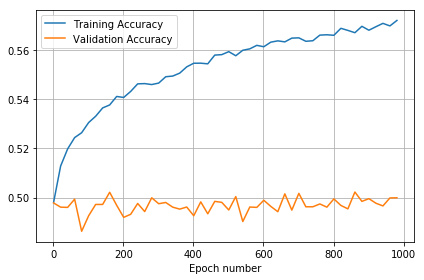

[[4304 4418]
 [5694 5584]]

Validation Avg: [ 0.4944]
Train Avg: [ 0.570975]


[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]    [0]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]    [0]
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [1]
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 

Epoch 26/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - acc: 0.5130 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939 - val_acc: 0.5020
Epoch 27/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - acc: 0.5103 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938 - val_acc: 0.4958
Epoch 28/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6928 - binary_crossentropy: 0.6928 - acc: 0.5114 - val_loss: 0.6940 - val_binary_crossentropy: 0.6940 - val_acc: 0.4993
Epoch 29/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - acc: 0.5136 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_acc: 0.4946
Epoch 30/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - acc: 0.5124 - val_loss: 0.6943 - val_binary_crossentropy: 0.694

80000/80000 [==============================] - 1s 18us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - acc: 0.5269 - val_loss: 0.6973 - val_binary_crossentropy: 0.6973 - val_acc: 0.4976
Epoch 107/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5268 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_acc: 0.4918
Epoch 108/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - acc: 0.5250 - val_loss: 0.6975 - val_binary_crossentropy: 0.6975 - val_acc: 0.4919
Epoch 109/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5258 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_acc: 0.4941
Epoch 110/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5271 - val_loss: 0.6978 - val_binary_crossentropy: 0.6978 - val_ac

80000/80000 [==============================] - 1s 19us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - acc: 0.5298 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_acc: 0.4936
Epoch 147/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - acc: 0.5322 - val_loss: 0.6991 - val_binary_crossentropy: 0.6991 - val_acc: 0.4924
Epoch 148/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - acc: 0.5316 - val_loss: 0.6988 - val_binary_crossentropy: 0.6988 - val_acc: 0.4965
Epoch 149/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - acc: 0.5336 - val_loss: 0.6978 - val_binary_crossentropy: 0.6978 - val_acc: 0.4948
Epoch 150/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - acc: 0.5338 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_ac

Epoch 186/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6883 - binary_crossentropy: 0.6883 - acc: 0.5381 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_acc: 0.4910
Epoch 187/2000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5342 - val_loss: 0.6999 - val_binary_crossentropy: 0.6999 - val_acc: 0.5007
Epoch 188/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5364 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_acc: 0.4951
Epoch 189/2000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - acc: 0.5361 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_acc: 0.4961
Epoch 190/2000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6884 - binary_crossentropy: 0.6884 - acc: 0.5370 - val_loss: 0.6990 - val_binary_crossentropy: 

Epoch 226/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - acc: 0.5396 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.4942
Epoch 227/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - acc: 0.5403 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_acc: 0.4935
Epoch 228/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - acc: 0.5403 - val_loss: 0.7002 - val_binary_crossentropy: 0.7002 - val_acc: 0.4989
Epoch 229/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6875 - binary_crossentropy: 0.6875 - acc: 0.5397 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_acc: 0.4951
Epoch 230/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6874 - binary_crossentropy: 0.6874 - acc: 0.5405 - val_loss: 0.7019 - val_binary_crossentropy: 

Epoch 266/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - acc: 0.5414 - val_loss: 0.7020 - val_binary_crossentropy: 0.7020 - val_acc: 0.4936
Epoch 267/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - acc: 0.5416 - val_loss: 0.7026 - val_binary_crossentropy: 0.7026 - val_acc: 0.4933
Epoch 268/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - acc: 0.5440 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_acc: 0.4908
Epoch 269/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - acc: 0.5428 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.4916
Epoch 270/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - acc: 0.5429 - val_loss: 0.7034 - val_binary_crossentropy: 

Epoch 306/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5476 - val_loss: 0.7039 - val_binary_crossentropy: 0.7039 - val_acc: 0.4913
Epoch 307/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - acc: 0.5474 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.4921
Epoch 308/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - acc: 0.5459 - val_loss: 0.7031 - val_binary_crossentropy: 0.7031 - val_acc: 0.4931
Epoch 309/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5472 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.4938
Epoch 310/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - acc: 0.5451 - val_loss: 0.7039 - val_binary_crossentropy: 

Epoch 346/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5492 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.4959
Epoch 347/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - acc: 0.5469 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.4926
Epoch 348/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - acc: 0.5493 - val_loss: 0.7054 - val_binary_crossentropy: 0.7054 - val_acc: 0.4902
Epoch 349/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - acc: 0.5492 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_acc: 0.4912
Epoch 350/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5499 - val_loss: 0.7061 - val_binary_crossentropy: 

Epoch 386/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - acc: 0.5497 - val_loss: 0.7051 - val_binary_crossentropy: 0.7051 - val_acc: 0.4951
Epoch 387/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - acc: 0.5512 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_acc: 0.4939
Epoch 388/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5528 - val_loss: 0.7048 - val_binary_crossentropy: 0.7048 - val_acc: 0.4945
Epoch 389/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - acc: 0.5519 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_acc: 0.4946
Epoch 390/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - acc: 0.5502 - val_loss: 0.7045 - val_binary_crossentropy: 

Epoch 426/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - acc: 0.5520 - val_loss: 0.7086 - val_binary_crossentropy: 0.7086 - val_acc: 0.4927
Epoch 427/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - acc: 0.5537 - val_loss: 0.7067 - val_binary_crossentropy: 0.7067 - val_acc: 0.4942
Epoch 428/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - acc: 0.5535 - val_loss: 0.7050 - val_binary_crossentropy: 0.7050 - val_acc: 0.4967
Epoch 429/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - acc: 0.5527 - val_loss: 0.7068 - val_binary_crossentropy: 0.7068 - val_acc: 0.4950
Epoch 430/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6834 - binary_crossentropy: 0.6834 - acc: 0.5522 - val_loss: 0.7070 - val_binary_crossentropy: 

Epoch 466/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - acc: 0.5545 - val_loss: 0.7098 - val_binary_crossentropy: 0.7098 - val_acc: 0.4929
Epoch 467/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - acc: 0.5558 - val_loss: 0.7103 - val_binary_crossentropy: 0.7103 - val_acc: 0.4917
Epoch 468/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6826 - binary_crossentropy: 0.6826 - acc: 0.5544 - val_loss: 0.7080 - val_binary_crossentropy: 0.7080 - val_acc: 0.4939
Epoch 469/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6827 - binary_crossentropy: 0.6827 - acc: 0.5527 - val_loss: 0.7076 - val_binary_crossentropy: 0.7076 - val_acc: 0.4964
Epoch 470/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - acc: 0.5558 - val_loss: 0.7077 - val_binary_crossentropy: 

Epoch 506/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6818 - binary_crossentropy: 0.6818 - acc: 0.5565 - val_loss: 0.7081 - val_binary_crossentropy: 0.7081 - val_acc: 0.4944
Epoch 507/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5577 - val_loss: 0.7100 - val_binary_crossentropy: 0.7100 - val_acc: 0.4919
Epoch 508/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5576 - val_loss: 0.7072 - val_binary_crossentropy: 0.7072 - val_acc: 0.4956
Epoch 509/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5558 - val_loss: 0.7085 - val_binary_crossentropy: 0.7085 - val_acc: 0.4971
Epoch 510/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5571 - val_loss: 0.7092 - val_binary_crossentropy: 

Epoch 546/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - acc: 0.5586 - val_loss: 0.7123 - val_binary_crossentropy: 0.7123 - val_acc: 0.4928
Epoch 547/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - acc: 0.5577 - val_loss: 0.7094 - val_binary_crossentropy: 0.7094 - val_acc: 0.4961
Epoch 548/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - acc: 0.5589 - val_loss: 0.7091 - val_binary_crossentropy: 0.7091 - val_acc: 0.4951
Epoch 549/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5595 - val_loss: 0.7112 - val_binary_crossentropy: 0.7112 - val_acc: 0.4954
Epoch 550/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - acc: 0.5595 - val_loss: 0.7084 - val_binary_crossentropy: 

Epoch 586/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - acc: 0.5600 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_acc: 0.4916
Epoch 587/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5606 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_acc: 0.4950
Epoch 588/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - acc: 0.5597 - val_loss: 0.7089 - val_binary_crossentropy: 0.7089 - val_acc: 0.4998
Epoch 589/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6807 - binary_crossentropy: 0.6807 - acc: 0.5613 - val_loss: 0.7094 - val_binary_crossentropy: 0.7094 - val_acc: 0.4954
Epoch 590/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - acc: 0.5597 - val_loss: 0.7099 - val_binary_crossentropy: 

Epoch 626/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6802 - binary_crossentropy: 0.6802 - acc: 0.5615 - val_loss: 0.7109 - val_binary_crossentropy: 0.7109 - val_acc: 0.4940
Epoch 627/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - acc: 0.5637 - val_loss: 0.7093 - val_binary_crossentropy: 0.7093 - val_acc: 0.4951
Epoch 628/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6801 - binary_crossentropy: 0.6801 - acc: 0.5620 - val_loss: 0.7097 - val_binary_crossentropy: 0.7097 - val_acc: 0.4949
Epoch 629/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6802 - binary_crossentropy: 0.6802 - acc: 0.5622 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_acc: 0.4931
Epoch 630/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6801 - binary_crossentropy: 0.6801 - acc: 0.5633 - val_loss: 0.7087 - val_binary_crossentropy: 

Epoch 666/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6795 - binary_crossentropy: 0.6795 - acc: 0.5632 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_acc: 0.4925
Epoch 667/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6794 - binary_crossentropy: 0.6794 - acc: 0.5634 - val_loss: 0.7112 - val_binary_crossentropy: 0.7112 - val_acc: 0.5016
Epoch 668/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6797 - binary_crossentropy: 0.6797 - acc: 0.5629 - val_loss: 0.7101 - val_binary_crossentropy: 0.7101 - val_acc: 0.4925
Epoch 669/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - acc: 0.5634 - val_loss: 0.7106 - val_binary_crossentropy: 0.7106 - val_acc: 0.4938
Epoch 670/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6796 - binary_crossentropy: 0.6796 - acc: 0.5625 - val_loss: 0.7108 - val_binary_crossentropy: 

Epoch 706/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - acc: 0.5643 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_acc: 0.4966
Epoch 707/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6792 - binary_crossentropy: 0.6792 - acc: 0.5657 - val_loss: 0.7120 - val_binary_crossentropy: 0.7120 - val_acc: 0.4984
Epoch 708/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - acc: 0.5665 - val_loss: 0.7124 - val_binary_crossentropy: 0.7124 - val_acc: 0.4947
Epoch 709/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5652 - val_loss: 0.7095 - val_binary_crossentropy: 0.7095 - val_acc: 0.4971
Epoch 710/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6791 - binary_crossentropy: 0.6791 - acc: 0.5633 - val_loss: 0.7119 - val_binary_crossentropy: 

Epoch 746/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - acc: 0.5646 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_acc: 0.4939
Epoch 747/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5658 - val_loss: 0.7126 - val_binary_crossentropy: 0.7126 - val_acc: 0.4961
Epoch 748/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5653 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_acc: 0.4967
Epoch 749/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - acc: 0.5653 - val_loss: 0.7113 - val_binary_crossentropy: 0.7113 - val_acc: 0.4965
Epoch 750/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - acc: 0.5665 - val_loss: 0.7104 - val_binary_crossentropy: 

Epoch 786/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5668 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_acc: 0.4978
Epoch 787/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - acc: 0.5666 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_acc: 0.4981
Epoch 788/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - acc: 0.5653 - val_loss: 0.7127 - val_binary_crossentropy: 0.7127 - val_acc: 0.4953
Epoch 789/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6782 - binary_crossentropy: 0.6782 - acc: 0.5671 - val_loss: 0.7112 - val_binary_crossentropy: 0.7112 - val_acc: 0.4987
Epoch 790/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5658 - val_loss: 0.7139 - val_binary_crossentropy: 

Epoch 826/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5672 - val_loss: 0.7130 - val_binary_crossentropy: 0.7130 - val_acc: 0.4964
Epoch 827/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - acc: 0.5697 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_acc: 0.4946
Epoch 828/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5664 - val_loss: 0.7124 - val_binary_crossentropy: 0.7124 - val_acc: 0.4984
Epoch 829/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5693 - val_loss: 0.7128 - val_binary_crossentropy: 0.7128 - val_acc: 0.4932
Epoch 830/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - acc: 0.5684 - val_loss: 0.7133 - val_binary_crossentropy: 

Epoch 866/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6774 - binary_crossentropy: 0.6774 - acc: 0.5690 - val_loss: 0.7128 - val_binary_crossentropy: 0.7128 - val_acc: 0.4982
Epoch 867/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - acc: 0.5703 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_acc: 0.4989
Epoch 868/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6772 - binary_crossentropy: 0.6772 - acc: 0.5689 - val_loss: 0.7148 - val_binary_crossentropy: 0.7148 - val_acc: 0.4940
Epoch 869/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - acc: 0.5690 - val_loss: 0.7137 - val_binary_crossentropy: 0.7137 - val_acc: 0.4954
Epoch 870/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6775 - binary_crossentropy: 0.6775 - acc: 0.5681 - val_loss: 0.7139 - val_binary_crossentropy: 

Epoch 906/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6771 - binary_crossentropy: 0.6771 - acc: 0.5704 - val_loss: 0.7142 - val_binary_crossentropy: 0.7142 - val_acc: 0.4977
Epoch 907/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - acc: 0.5682 - val_loss: 0.7121 - val_binary_crossentropy: 0.7121 - val_acc: 0.4964
Epoch 908/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - acc: 0.5714 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_acc: 0.4977
Epoch 909/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - acc: 0.5708 - val_loss: 0.7143 - val_binary_crossentropy: 0.7143 - val_acc: 0.4955
Epoch 910/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - acc: 0.5694 - val_loss: 0.7150 - val_binary_crossentropy: 

Epoch 946/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - acc: 0.5703 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_acc: 0.4926
Epoch 947/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5709 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_acc: 0.4971
Epoch 948/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5706 - val_loss: 0.7136 - val_binary_crossentropy: 0.7136 - val_acc: 0.4977
Epoch 949/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - acc: 0.5699 - val_loss: 0.7142 - val_binary_crossentropy: 0.7142 - val_acc: 0.4967
Epoch 950/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - acc: 0.5698 - val_loss: 0.7131 - val_binary_crossentropy: 

Epoch 986/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - acc: 0.5718 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_acc: 0.4899
Epoch 987/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5701 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_acc: 0.4951
Epoch 988/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - acc: 0.5708 - val_loss: 0.7143 - val_binary_crossentropy: 0.7143 - val_acc: 0.4955
Epoch 989/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - acc: 0.5691 - val_loss: 0.7152 - val_binary_crossentropy: 0.7152 - val_acc: 0.4976
Epoch 990/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - acc: 0.5700 - val_loss: 0.7149 - val_binary_crossentropy: 

Epoch 1065/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - acc: 0.5721 - val_loss: 0.7157 - val_binary_crossentropy: 0.7157 - val_acc: 0.4926
Epoch 1066/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5695 - val_loss: 0.7150 - val_binary_crossentropy: 0.7150 - val_acc: 0.4961
Epoch 1067/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - acc: 0.5723 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4927
Epoch 1068/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - acc: 0.5715 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4899
Epoch 1069/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5726 - val_loss: 0.7164 - val_binary_crossentr

Epoch 1105/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - acc: 0.5726 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4936
Epoch 1106/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - acc: 0.5725 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4934
Epoch 1107/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - acc: 0.5727 - val_loss: 0.7163 - val_binary_crossentropy: 0.7163 - val_acc: 0.4943
Epoch 1108/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - acc: 0.5751 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4953
Epoch 1109/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5732 - val_loss: 0.7152 - val_binary_crossentr

Epoch 1145/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5739 - val_loss: 0.7163 - val_binary_crossentropy: 0.7163 - val_acc: 0.4936
Epoch 1146/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5731 - val_loss: 0.7166 - val_binary_crossentropy: 0.7166 - val_acc: 0.4962
Epoch 1147/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - acc: 0.5713 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4971
Epoch 1148/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - acc: 0.5740 - val_loss: 0.7148 - val_binary_crossentropy: 0.7148 - val_acc: 0.4956
Epoch 1149/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5748 - val_loss: 0.7159 - val_binary_crossentr

Epoch 1185/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5729 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_acc: 0.4919
Epoch 1186/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5730 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4933
Epoch 1187/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5749 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4953
Epoch 1188/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5734 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4965
Epoch 1189/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5741 - val_loss: 0.7161 - val_binary_crossentr

Epoch 1225/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5742 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4933
Epoch 1226/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5746 - val_loss: 0.7206 - val_binary_crossentropy: 0.7206 - val_acc: 0.4943
Epoch 1227/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5749 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4964
Epoch 1228/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - acc: 0.5741 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4996
Epoch 1229/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5748 - val_loss: 0.7171 - val_binary_crossentr

Epoch 1265/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5752 - val_loss: 0.7166 - val_binary_crossentropy: 0.7166 - val_acc: 0.4953
Epoch 1266/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5739 - val_loss: 0.7158 - val_binary_crossentropy: 0.7158 - val_acc: 0.4936
Epoch 1267/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5732 - val_loss: 0.7164 - val_binary_crossentropy: 0.7164 - val_acc: 0.4938
Epoch 1268/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5743 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_acc: 0.4936
Epoch 1269/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5755 - val_loss: 0.7165 - val_binary_crossentr

Epoch 1305/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5750 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4935
Epoch 1306/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5749 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4921
Epoch 1307/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5752 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4906
Epoch 1308/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5760 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4937
Epoch 1309/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5755 - val_loss: 0.7176 - val_binary_crossentr

Epoch 1345/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5751 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_acc: 0.4937
Epoch 1346/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5739 - val_loss: 0.7158 - val_binary_crossentropy: 0.7158 - val_acc: 0.4972
Epoch 1347/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5763 - val_loss: 0.7168 - val_binary_crossentropy: 0.7168 - val_acc: 0.4960
Epoch 1348/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5757 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4980
Epoch 1349/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5745 - val_loss: 0.7184 - val_binary_crossentr

Epoch 1424/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5764 - val_loss: 0.7185 - val_binary_crossentropy: 0.7185 - val_acc: 0.4953
Epoch 1425/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5759 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4949
Epoch 1426/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5758 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4942
Epoch 1427/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5751 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_acc: 0.4969
Epoch 1428/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5763 - val_loss: 0.7182 - val_binary_crossentr

Epoch 1464/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5762 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4976
Epoch 1465/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5755 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_acc: 0.4946
Epoch 1466/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5760 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4939
Epoch 1467/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5773 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4922
Epoch 1468/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5754 - val_loss: 0.7184 - val_binary_crossentr

Epoch 1504/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5774 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_acc: 0.4983
Epoch 1505/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5767 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4954
Epoch 1506/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5756 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_acc: 0.4991
Epoch 1507/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5758 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_acc: 0.4938
Epoch 1508/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5765 - val_loss: 0.7165 - val_binary_crossentr

Epoch 1544/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5770 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4965
Epoch 1545/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5787 - val_loss: 0.7163 - val_binary_crossentropy: 0.7163 - val_acc: 0.4982
Epoch 1546/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5772 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_acc: 0.4951
Epoch 1547/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5762 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4962
Epoch 1548/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5775 - val_loss: 0.7201 - val_binary_crossentr

Epoch 1623/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5780 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_acc: 0.4954
Epoch 1624/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5765 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_acc: 0.4951
Epoch 1625/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5775 - val_loss: 0.7191 - val_binary_crossentropy: 0.7191 - val_acc: 0.4948
Epoch 1626/2000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5783 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4912
Epoch 1627/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5782 - val_loss: 0.7187 - val_binary_crossentr

Epoch 1663/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5782 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_acc: 0.4947
Epoch 1664/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5782 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4949
Epoch 1665/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5779 - val_loss: 0.7214 - val_binary_crossentropy: 0.7214 - val_acc: 0.4963
Epoch 1666/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5788 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_acc: 0.4987
Epoch 1667/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5768 - val_loss: 0.7208 - val_binary_crossentr

Epoch 1703/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5786 - val_loss: 0.7224 - val_binary_crossentropy: 0.7224 - val_acc: 0.4972
Epoch 1704/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5783 - val_loss: 0.7222 - val_binary_crossentropy: 0.7222 - val_acc: 0.4974
Epoch 1705/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5797 - val_loss: 0.7216 - val_binary_crossentropy: 0.7216 - val_acc: 0.4929
Epoch 1706/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5791 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4960
Epoch 1707/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5773 - val_loss: 0.7177 - val_binary_crossentr

Epoch 1743/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5777 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4941
Epoch 1744/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5775 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4954
Epoch 1745/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5782 - val_loss: 0.7235 - val_binary_crossentropy: 0.7235 - val_acc: 0.4942
Epoch 1746/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5787 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4972
Epoch 1747/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5799 - val_loss: 0.7201 - val_binary_crossentr

Epoch 1783/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5794 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4927
Epoch 1784/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5781 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4949
Epoch 1785/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5784 - val_loss: 0.7209 - val_binary_crossentropy: 0.7209 - val_acc: 0.4945
Epoch 1786/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5790 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4945
Epoch 1787/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5785 - val_loss: 0.7200 - val_binary_crossentr

Epoch 1823/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5783 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4900
Epoch 1824/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5801 - val_loss: 0.7216 - val_binary_crossentropy: 0.7216 - val_acc: 0.4926
Epoch 1825/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5781 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4946
Epoch 1826/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5779 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_acc: 0.4924
Epoch 1827/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5788 - val_loss: 0.7211 - val_binary_crossentr

Epoch 1863/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5802 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4945
Epoch 1864/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - acc: 0.5808 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4897
Epoch 1865/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5785 - val_loss: 0.7205 - val_binary_crossentropy: 0.7205 - val_acc: 0.4999
Epoch 1866/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5783 - val_loss: 0.7219 - val_binary_crossentropy: 0.7219 - val_acc: 0.4939
Epoch 1867/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5800 - val_loss: 0.7182 - val_binary_crossentr

Epoch 1903/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5797 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4946
Epoch 1904/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5807 - val_loss: 0.7214 - val_binary_crossentropy: 0.7214 - val_acc: 0.4933
Epoch 1905/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5782 - val_loss: 0.7211 - val_binary_crossentropy: 0.7211 - val_acc: 0.4924
Epoch 1906/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5802 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_acc: 0.4925
Epoch 1907/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - acc: 0.5789 - val_loss: 0.7189 - val_binary_crossentr

Epoch 1943/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5789 - val_loss: 0.7200 - val_binary_crossentropy: 0.7200 - val_acc: 0.4928
Epoch 1944/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5787 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_acc: 0.4925
Epoch 1945/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5786 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4899
Epoch 1946/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5777 - val_loss: 0.7206 - val_binary_crossentropy: 0.7206 - val_acc: 0.4939
Epoch 1947/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5771 - val_loss: 0.7217 - val_binary_crossentr

Epoch 1983/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5790 - val_loss: 0.7202 - val_binary_crossentropy: 0.7202 - val_acc: 0.4951
Epoch 1984/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - acc: 0.5798 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4969
Epoch 1985/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6720 - binary_crossentropy: 0.6720 - acc: 0.5792 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4949
Epoch 1986/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5785 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4953
Epoch 1987/2000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5794 - val_loss: 0.7197 - val_binary_crossentr

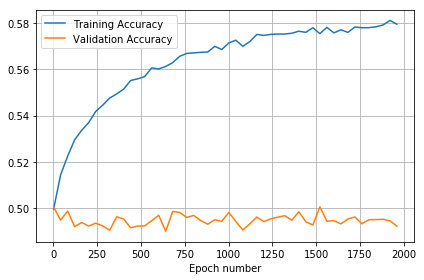

[[4902 5032]
 [5096 4970]]

Validation Avg: [ 0.4936]
Train Avg: [ 0.5802125]


[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]    [0]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]


Epoch 26/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6930 - binary_crossentropy: 0.6930 - acc: 0.5095 - val_loss: 0.6938 - val_binary_crossentropy: 0.6938 - val_acc: 0.4937
Epoch 27/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5100 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935 - val_acc: 0.4978
Epoch 28/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6930 - binary_crossentropy: 0.6930 - acc: 0.5095 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_acc: 0.4953
Epoch 29/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5106 - val_loss: 0.6940 - val_binary_crossentropy: 0.6940 - val_acc: 0.4955
Epoch 30/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5098 - val_loss: 0.6935 - val_binary_crossentropy: 0.693

80000/80000 [==============================] - 1s 18us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - acc: 0.5259 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_acc: 0.4992
Epoch 107/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6911 - binary_crossentropy: 0.6911 - acc: 0.5265 - val_loss: 0.6953 - val_binary_crossentropy: 0.6953 - val_acc: 0.4998
Epoch 108/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - acc: 0.5242 - val_loss: 0.6953 - val_binary_crossentropy: 0.6953 - val_acc: 0.4995
Epoch 109/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - acc: 0.5256 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_acc: 0.4989
Epoch 110/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6910 - binary_crossentropy: 0.6910 - acc: 0.5270 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_ac

Epoch 146/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - acc: 0.5307 - val_loss: 0.6968 - val_binary_crossentropy: 0.6968 - val_acc: 0.4978
Epoch 147/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6903 - binary_crossentropy: 0.6903 - acc: 0.5294 - val_loss: 0.6971 - val_binary_crossentropy: 0.6971 - val_acc: 0.4974
Epoch 148/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6901 - binary_crossentropy: 0.6901 - acc: 0.5311 - val_loss: 0.6977 - val_binary_crossentropy: 0.6977 - val_acc: 0.4980
Epoch 149/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - acc: 0.5303 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_acc: 0.4988
Epoch 150/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - acc: 0.5315 - val_loss: 0.6969 - val_binary_crossentropy: 

Epoch 186/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6892 - binary_crossentropy: 0.6892 - acc: 0.5344 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985 - val_acc: 0.5007
Epoch 187/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - acc: 0.5361 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_acc: 0.4999
Epoch 188/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6892 - binary_crossentropy: 0.6892 - acc: 0.5367 - val_loss: 0.6983 - val_binary_crossentropy: 0.6983 - val_acc: 0.5000
Epoch 189/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - acc: 0.5347 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_acc: 0.4965
Epoch 190/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6891 - binary_crossentropy: 0.6891 - acc: 0.5347 - val_loss: 0.6979 - val_binary_crossentropy: 

Epoch 226/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6882 - binary_crossentropy: 0.6882 - acc: 0.5391 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985 - val_acc: 0.4990
Epoch 227/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - acc: 0.5376 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.4976
Epoch 228/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - acc: 0.5409 - val_loss: 0.6982 - val_binary_crossentropy: 0.6982 - val_acc: 0.4990
Epoch 229/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - acc: 0.5379 - val_loss: 0.7000 - val_binary_crossentropy: 0.7000 - val_acc: 0.4972
Epoch 230/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - acc: 0.5410 - val_loss: 0.6991 - val_binary_crossentropy: 

Epoch 266/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - acc: 0.5435 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_acc: 0.4954
Epoch 267/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6869 - binary_crossentropy: 0.6869 - acc: 0.5439 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_acc: 0.4945
Epoch 268/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - acc: 0.5448 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_acc: 0.4930
Epoch 269/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - acc: 0.5439 - val_loss: 0.7019 - val_binary_crossentropy: 0.7019 - val_acc: 0.4948
Epoch 270/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - acc: 0.5428 - val_loss: 0.7009 - val_binary_crossentropy: 

Epoch 306/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - acc: 0.5482 - val_loss: 0.7023 - val_binary_crossentropy: 0.7023 - val_acc: 0.4954
Epoch 307/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - acc: 0.5481 - val_loss: 0.7022 - val_binary_crossentropy: 0.7022 - val_acc: 0.4994
Epoch 308/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - acc: 0.5481 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_acc: 0.4947
Epoch 309/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - acc: 0.5469 - val_loss: 0.7032 - val_binary_crossentropy: 0.7032 - val_acc: 0.4978
Epoch 310/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6856 - binary_crossentropy: 0.6856 - acc: 0.5486 - val_loss: 0.7029 - val_binary_crossentropy: 

Epoch 346/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - acc: 0.5538 - val_loss: 0.7052 - val_binary_crossentropy: 0.7052 - val_acc: 0.4958
Epoch 347/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6846 - binary_crossentropy: 0.6846 - acc: 0.5491 - val_loss: 0.7048 - val_binary_crossentropy: 0.7048 - val_acc: 0.4982
Epoch 348/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6845 - binary_crossentropy: 0.6845 - acc: 0.5511 - val_loss: 0.7047 - val_binary_crossentropy: 0.7047 - val_acc: 0.4975
Epoch 349/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6847 - binary_crossentropy: 0.6847 - acc: 0.5494 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_acc: 0.4964
Epoch 350/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - acc: 0.5517 - val_loss: 0.7046 - val_binary_crossentropy: 

Epoch 386/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5536 - val_loss: 0.7054 - val_binary_crossentropy: 0.7054 - val_acc: 0.4936
Epoch 387/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - acc: 0.5538 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.4958
Epoch 388/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - acc: 0.5541 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_acc: 0.4950
Epoch 389/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5553 - val_loss: 0.7046 - val_binary_crossentropy: 0.7046 - val_acc: 0.4969
Epoch 390/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6837 - binary_crossentropy: 0.6837 - acc: 0.5551 - val_loss: 0.7059 - val_binary_crossentropy: 

Epoch 426/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6832 - binary_crossentropy: 0.6832 - acc: 0.5557 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_acc: 0.4947
Epoch 427/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6831 - binary_crossentropy: 0.6831 - acc: 0.5559 - val_loss: 0.7046 - val_binary_crossentropy: 0.7046 - val_acc: 0.4979
Epoch 428/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6830 - binary_crossentropy: 0.6830 - acc: 0.5544 - val_loss: 0.7069 - val_binary_crossentropy: 0.7069 - val_acc: 0.4903
Epoch 429/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6828 - binary_crossentropy: 0.6828 - acc: 0.5554 - val_loss: 0.7063 - val_binary_crossentropy: 0.7063 - val_acc: 0.4975
Epoch 430/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6829 - binary_crossentropy: 0.6829 - acc: 0.5561 - val_loss: 0.7055 - val_binary_crossentropy: 

Epoch 466/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - acc: 0.5570 - val_loss: 0.7062 - val_binary_crossentropy: 0.7062 - val_acc: 0.4975
Epoch 467/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6825 - binary_crossentropy: 0.6825 - acc: 0.5561 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_acc: 0.4950
Epoch 468/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6823 - binary_crossentropy: 0.6823 - acc: 0.5594 - val_loss: 0.7071 - val_binary_crossentropy: 0.7071 - val_acc: 0.4968
Epoch 469/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - acc: 0.5571 - val_loss: 0.7068 - val_binary_crossentropy: 0.7068 - val_acc: 0.4974
Epoch 470/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6822 - binary_crossentropy: 0.6822 - acc: 0.5578 - val_loss: 0.7074 - val_binary_crossentropy: 

Epoch 506/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - acc: 0.5617 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_acc: 0.4975
Epoch 507/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5603 - val_loss: 0.7094 - val_binary_crossentropy: 0.7094 - val_acc: 0.4979
Epoch 508/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5597 - val_loss: 0.7075 - val_binary_crossentropy: 0.7075 - val_acc: 0.4960
Epoch 509/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5593 - val_loss: 0.7078 - val_binary_crossentropy: 0.7078 - val_acc: 0.4968
Epoch 510/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6816 - binary_crossentropy: 0.6816 - acc: 0.5598 - val_loss: 0.7078 - val_binary_crossentropy: 

Epoch 546/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - acc: 0.5625 - val_loss: 0.7107 - val_binary_crossentropy: 0.7107 - val_acc: 0.4949
Epoch 547/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6811 - binary_crossentropy: 0.6811 - acc: 0.5611 - val_loss: 0.7078 - val_binary_crossentropy: 0.7078 - val_acc: 0.5001
Epoch 548/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6808 - binary_crossentropy: 0.6808 - acc: 0.5629 - val_loss: 0.7089 - val_binary_crossentropy: 0.7089 - val_acc: 0.4976
Epoch 549/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5625 - val_loss: 0.7092 - val_binary_crossentropy: 0.7092 - val_acc: 0.4949
Epoch 550/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6810 - binary_crossentropy: 0.6810 - acc: 0.5644 - val_loss: 0.7080 - val_binary_crossentropy: 

Epoch 586/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - acc: 0.5645 - val_loss: 0.7122 - val_binary_crossentropy: 0.7122 - val_acc: 0.4951
Epoch 587/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6803 - binary_crossentropy: 0.6803 - acc: 0.5633 - val_loss: 0.7103 - val_binary_crossentropy: 0.7103 - val_acc: 0.4977
Epoch 588/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6806 - binary_crossentropy: 0.6806 - acc: 0.5624 - val_loss: 0.7102 - val_binary_crossentropy: 0.7102 - val_acc: 0.4965
Epoch 589/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6805 - binary_crossentropy: 0.6805 - acc: 0.5619 - val_loss: 0.7102 - val_binary_crossentropy: 0.7102 - val_acc: 0.4978
Epoch 590/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6800 - binary_crossentropy: 0.6800 - acc: 0.5640 - val_loss: 0.7092 - val_binary_crossentropy: 

Epoch 626/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6797 - binary_crossentropy: 0.6797 - acc: 0.5643 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_acc: 0.4958
Epoch 627/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - acc: 0.5646 - val_loss: 0.7109 - val_binary_crossentropy: 0.7109 - val_acc: 0.4957
Epoch 628/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6799 - binary_crossentropy: 0.6799 - acc: 0.5651 - val_loss: 0.7114 - val_binary_crossentropy: 0.7114 - val_acc: 0.4936
Epoch 629/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - acc: 0.5635 - val_loss: 0.7107 - val_binary_crossentropy: 0.7107 - val_acc: 0.4964
Epoch 630/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6798 - binary_crossentropy: 0.6798 - acc: 0.5642 - val_loss: 0.7086 - val_binary_crossentropy: 

Epoch 666/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6794 - binary_crossentropy: 0.6794 - acc: 0.5659 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_acc: 0.4950
Epoch 667/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - acc: 0.5646 - val_loss: 0.7102 - val_binary_crossentropy: 0.7102 - val_acc: 0.4951
Epoch 668/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - acc: 0.5655 - val_loss: 0.7102 - val_binary_crossentropy: 0.7102 - val_acc: 0.4953
Epoch 669/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6793 - binary_crossentropy: 0.6793 - acc: 0.5670 - val_loss: 0.7097 - val_binary_crossentropy: 0.7097 - val_acc: 0.4964
Epoch 670/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6794 - binary_crossentropy: 0.6794 - acc: 0.5665 - val_loss: 0.7094 - val_binary_crossentropy: 

Epoch 706/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - acc: 0.5670 - val_loss: 0.7113 - val_binary_crossentropy: 0.7113 - val_acc: 0.4952
Epoch 707/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5663 - val_loss: 0.7113 - val_binary_crossentropy: 0.7113 - val_acc: 0.4963
Epoch 708/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6790 - binary_crossentropy: 0.6790 - acc: 0.5660 - val_loss: 0.7106 - val_binary_crossentropy: 0.7106 - val_acc: 0.4990
Epoch 709/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6789 - binary_crossentropy: 0.6789 - acc: 0.5678 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_acc: 0.4962
Epoch 710/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6787 - binary_crossentropy: 0.6787 - acc: 0.5682 - val_loss: 0.7117 - val_binary_crossentropy: 

Epoch 746/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5677 - val_loss: 0.7118 - val_binary_crossentropy: 0.7118 - val_acc: 0.4920
Epoch 747/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6786 - binary_crossentropy: 0.6786 - acc: 0.5685 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_acc: 0.4961
Epoch 748/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6783 - binary_crossentropy: 0.6783 - acc: 0.5682 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_acc: 0.4947
Epoch 749/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5685 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_acc: 0.4980
Epoch 750/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5712 - val_loss: 0.7115 - val_binary_crossentropy: 

Epoch 786/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5693 - val_loss: 0.7120 - val_binary_crossentropy: 0.7120 - val_acc: 0.4952
Epoch 787/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5704 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_acc: 0.4962
Epoch 788/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - acc: 0.5688 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_acc: 0.4938
Epoch 789/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5691 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_acc: 0.4934
Epoch 790/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5720 - val_loss: 0.7118 - val_binary_crossentropy: 

Epoch 826/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6778 - binary_crossentropy: 0.6778 - acc: 0.5699 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_acc: 0.4942
Epoch 827/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5701 - val_loss: 0.7123 - val_binary_crossentropy: 0.7123 - val_acc: 0.4931
Epoch 828/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5709 - val_loss: 0.7136 - val_binary_crossentropy: 0.7136 - val_acc: 0.4958
Epoch 829/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6775 - binary_crossentropy: 0.6775 - acc: 0.5700 - val_loss: 0.7152 - val_binary_crossentropy: 0.7152 - val_acc: 0.4950
Epoch 830/3000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.5703 - val_loss: 0.7119 - val_binary_crossentropy: 

Epoch 866/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - acc: 0.5694 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_acc: 0.4905
Epoch 867/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6771 - binary_crossentropy: 0.6771 - acc: 0.5719 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4917
Epoch 868/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6773 - binary_crossentropy: 0.6773 - acc: 0.5715 - val_loss: 0.7140 - val_binary_crossentropy: 0.7140 - val_acc: 0.4932
Epoch 869/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6771 - binary_crossentropy: 0.6771 - acc: 0.5717 - val_loss: 0.7143 - val_binary_crossentropy: 0.7143 - val_acc: 0.4950
Epoch 870/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6771 - binary_crossentropy: 0.6771 - acc: 0.5725 - val_loss: 0.7137 - val_binary_crossentropy: 

Epoch 906/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - acc: 0.5709 - val_loss: 0.7129 - val_binary_crossentropy: 0.7129 - val_acc: 0.4992
Epoch 907/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - acc: 0.5721 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4927
Epoch 908/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - acc: 0.5730 - val_loss: 0.7138 - val_binary_crossentropy: 0.7138 - val_acc: 0.4870
Epoch 909/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6769 - binary_crossentropy: 0.6769 - acc: 0.5718 - val_loss: 0.7136 - val_binary_crossentropy: 0.7136 - val_acc: 0.4933
Epoch 910/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - acc: 0.5711 - val_loss: 0.7145 - val_binary_crossentropy: 

Epoch 946/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6767 - binary_crossentropy: 0.6767 - acc: 0.5730 - val_loss: 0.7135 - val_binary_crossentropy: 0.7135 - val_acc: 0.4921
Epoch 947/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6766 - binary_crossentropy: 0.6766 - acc: 0.5733 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_acc: 0.4940
Epoch 948/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5726 - val_loss: 0.7147 - val_binary_crossentropy: 0.7147 - val_acc: 0.4954
Epoch 949/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5727 - val_loss: 0.7133 - val_binary_crossentropy: 0.7133 - val_acc: 0.4923
Epoch 950/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6765 - binary_crossentropy: 0.6765 - acc: 0.5718 - val_loss: 0.7149 - val_binary_crossentropy: 

Epoch 986/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - acc: 0.5736 - val_loss: 0.7153 - val_binary_crossentropy: 0.7153 - val_acc: 0.4935
Epoch 987/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - acc: 0.5719 - val_loss: 0.7147 - val_binary_crossentropy: 0.7147 - val_acc: 0.4953
Epoch 988/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - acc: 0.5753 - val_loss: 0.7154 - val_binary_crossentropy: 0.7154 - val_acc: 0.4931
Epoch 989/3000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6763 - binary_crossentropy: 0.6763 - acc: 0.5724 - val_loss: 0.7154 - val_binary_crossentropy: 0.7154 - val_acc: 0.4960
Epoch 990/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - acc: 0.5736 - val_loss: 0.7164 - val_binary_crossentropy: 

Epoch 1026/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - acc: 0.5720 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4931
Epoch 1027/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6760 - binary_crossentropy: 0.6760 - acc: 0.5744 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4941
Epoch 1028/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - acc: 0.5731 - val_loss: 0.7135 - val_binary_crossentropy: 0.7135 - val_acc: 0.4921
Epoch 1029/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6762 - binary_crossentropy: 0.6762 - acc: 0.5722 - val_loss: 0.7146 - val_binary_crossentropy: 0.7146 - val_acc: 0.4923
Epoch 1030/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6761 - binary_crossentropy: 0.6761 - acc: 0.5733 - val_loss: 0.7161 - val_binary_crossentr

Epoch 1105/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5736 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_acc: 0.4983
Epoch 1106/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6756 - binary_crossentropy: 0.6756 - acc: 0.5747 - val_loss: 0.7160 - val_binary_crossentropy: 0.7160 - val_acc: 0.4947
Epoch 1107/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6755 - binary_crossentropy: 0.6755 - acc: 0.5737 - val_loss: 0.7149 - val_binary_crossentropy: 0.7149 - val_acc: 0.4967
Epoch 1108/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5755 - val_loss: 0.7144 - val_binary_crossentropy: 0.7144 - val_acc: 0.4932
Epoch 1109/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5723 - val_loss: 0.7151 - val_binary_crossentr

Epoch 1145/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6759 - binary_crossentropy: 0.6759 - acc: 0.5738 - val_loss: 0.7150 - val_binary_crossentropy: 0.7150 - val_acc: 0.4928
Epoch 1146/3000
80000/80000 [==============================] - 2s 25us/step - loss: 0.6758 - binary_crossentropy: 0.6758 - acc: 0.5742 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_acc: 0.4974
Epoch 1147/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - acc: 0.5762 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_acc: 0.4941
Epoch 1148/3000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6757 - binary_crossentropy: 0.6757 - acc: 0.5744 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_acc: 0.4986
Epoch 1149/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6759 - binary_crossentropy: 0.6759 - acc: 0.5745 - val_loss: 0.7155 - val_binary_crossentr

Epoch 1185/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - acc: 0.5761 - val_loss: 0.7171 - val_binary_crossentropy: 0.7171 - val_acc: 0.4934
Epoch 1186/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - acc: 0.5749 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4942
Epoch 1187/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - acc: 0.5754 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_acc: 0.4936
Epoch 1188/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - acc: 0.5755 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4915
Epoch 1189/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - acc: 0.5753 - val_loss: 0.7164 - val_binary_crossentr

Epoch 1225/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - acc: 0.5742 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_acc: 0.4916
Epoch 1226/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5766 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_acc: 0.4945
Epoch 1227/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - acc: 0.5770 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_acc: 0.4948
Epoch 1228/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5776 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4917
Epoch 1229/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6752 - binary_crossentropy: 0.6752 - acc: 0.5755 - val_loss: 0.7174 - val_binary_crossentr

Epoch 1265/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5750 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_acc: 0.4957
Epoch 1266/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5754 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_acc: 0.4950
Epoch 1267/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6751 - binary_crossentropy: 0.6751 - acc: 0.5747 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4940
Epoch 1268/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6750 - binary_crossentropy: 0.6750 - acc: 0.5767 - val_loss: 0.7148 - val_binary_crossentropy: 0.7148 - val_acc: 0.4947
Epoch 1269/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5757 - val_loss: 0.7183 - val_binary_crossentr

Epoch 1305/3000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.5759 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4957
Epoch 1306/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - acc: 0.5758 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4938
Epoch 1307/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - acc: 0.5778 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4951
Epoch 1308/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6748 - binary_crossentropy: 0.6748 - acc: 0.5780 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_acc: 0.4947
Epoch 1309/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5764 - val_loss: 0.7173 - val_binary_crossentr

Epoch 1384/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5776 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4943
Epoch 1385/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5773 - val_loss: 0.7168 - val_binary_crossentropy: 0.7168 - val_acc: 0.4930
Epoch 1386/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5779 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4937
Epoch 1387/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6747 - binary_crossentropy: 0.6747 - acc: 0.5767 - val_loss: 0.7166 - val_binary_crossentropy: 0.7166 - val_acc: 0.4933
Epoch 1388/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5791 - val_loss: 0.7190 - val_binary_crossentr

Epoch 1424/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5759 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_acc: 0.4999
Epoch 1425/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - acc: 0.5768 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_acc: 0.4968
Epoch 1426/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5775 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_acc: 0.4926
Epoch 1427/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5757 - val_loss: 0.7168 - val_binary_crossentropy: 0.7168 - val_acc: 0.4941
Epoch 1428/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5751 - val_loss: 0.7207 - val_binary_crossentr

Epoch 1464/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5779 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4944
Epoch 1465/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5766 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4950
Epoch 1466/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6746 - binary_crossentropy: 0.6746 - acc: 0.5766 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_acc: 0.4949
Epoch 1467/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5767 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4947
Epoch 1468/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5781 - val_loss: 0.7175 - val_binary_crossentr

Epoch 1504/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5768 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_acc: 0.4915
Epoch 1505/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5776 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4962
Epoch 1506/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5778 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4968
Epoch 1507/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5775 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_acc: 0.4955
Epoch 1508/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5767 - val_loss: 0.7169 - val_binary_crossentr

Epoch 1544/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5788 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4945
Epoch 1545/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5780 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4960
Epoch 1546/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5775 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_acc: 0.4923
Epoch 1547/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5776 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4937
Epoch 1548/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5773 - val_loss: 0.7187 - val_binary_crossentr

Epoch 1623/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5784 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4973
Epoch 1624/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5775 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4979
Epoch 1625/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5788 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4980
Epoch 1626/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5781 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4938
Epoch 1627/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5780 - val_loss: 0.7178 - val_binary_crossentr

Epoch 1663/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5782 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4949
Epoch 1664/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5769 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4950
Epoch 1665/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5783 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4958
Epoch 1666/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5757 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_acc: 0.4988
Epoch 1667/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5767 - val_loss: 0.7172 - val_binary_crossentr

Epoch 1703/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5784 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4971
Epoch 1704/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5781 - val_loss: 0.7191 - val_binary_crossentropy: 0.7191 - val_acc: 0.4924
Epoch 1705/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5777 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_acc: 0.4982
Epoch 1706/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6742 - binary_crossentropy: 0.6742 - acc: 0.5790 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4968
Epoch 1707/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6741 - binary_crossentropy: 0.6741 - acc: 0.5783 - val_loss: 0.7204 - val_binary_crossentr

Epoch 1743/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5804 - val_loss: 0.7163 - val_binary_crossentropy: 0.7163 - val_acc: 0.4943
Epoch 1744/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5787 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4956
Epoch 1745/3000
80000/80000 [==============================] - 2s 19us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5791 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4943
Epoch 1746/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5774 - val_loss: 0.7191 - val_binary_crossentropy: 0.7191 - val_acc: 0.4960
Epoch 1747/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5789 - val_loss: 0.7197 - val_binary_crossentr

Epoch 1783/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5773 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_acc: 0.4957
Epoch 1784/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5780 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4961
Epoch 1785/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5785 - val_loss: 0.7160 - val_binary_crossentropy: 0.7160 - val_acc: 0.4969
Epoch 1786/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5783 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_acc: 0.4967
Epoch 1787/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5783 - val_loss: 0.7187 - val_binary_crossentr

Epoch 1823/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5794 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4941
Epoch 1824/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6740 - binary_crossentropy: 0.6740 - acc: 0.5776 - val_loss: 0.7200 - val_binary_crossentropy: 0.7200 - val_acc: 0.4912
Epoch 1825/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5790 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4968
Epoch 1826/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5789 - val_loss: 0.7171 - val_binary_crossentropy: 0.7171 - val_acc: 0.4953
Epoch 1827/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5777 - val_loss: 0.7179 - val_binary_crossentr

Epoch 1863/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5792 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4995
Epoch 1864/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5776 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4932
Epoch 1865/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5785 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_acc: 0.4968
Epoch 1866/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5765 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4943
Epoch 1867/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5789 - val_loss: 0.7160 - val_binary_crossentr

Epoch 1903/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5775 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4981
Epoch 1904/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5782 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_acc: 0.5025
Epoch 1905/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5782 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4966
Epoch 1906/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5773 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_acc: 0.4976
Epoch 1907/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5788 - val_loss: 0.7178 - val_binary_crossentr

Epoch 1943/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5775 - val_loss: 0.7171 - val_binary_crossentropy: 0.7171 - val_acc: 0.4957
Epoch 1944/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5785 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_acc: 0.5004
Epoch 1945/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5778 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4987
Epoch 1946/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5783 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_acc: 0.4965
Epoch 1947/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5780 - val_loss: 0.7172 - val_binary_crossentr

Epoch 2022/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6737 - binary_crossentropy: 0.6737 - acc: 0.5796 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4965
Epoch 2023/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6739 - binary_crossentropy: 0.6739 - acc: 0.5783 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_acc: 0.4992
Epoch 2024/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5797 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_acc: 0.4947
Epoch 2025/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5780 - val_loss: 0.7159 - val_binary_crossentropy: 0.7159 - val_acc: 0.4956
Epoch 2026/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5787 - val_loss: 0.7181 - val_binary_crossentr

Epoch 2062/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5795 - val_loss: 0.7202 - val_binary_crossentropy: 0.7202 - val_acc: 0.4994
Epoch 2063/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5782 - val_loss: 0.7213 - val_binary_crossentropy: 0.7213 - val_acc: 0.4980
Epoch 2064/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5785 - val_loss: 0.7212 - val_binary_crossentropy: 0.7212 - val_acc: 0.4976
Epoch 2065/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5789 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_acc: 0.4962
Epoch 2066/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5800 - val_loss: 0.7191 - val_binary_crossentr

Epoch 2102/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5793 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_acc: 0.4983
Epoch 2103/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5809 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4993
Epoch 2104/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5786 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_acc: 0.4968
Epoch 2105/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6736 - binary_crossentropy: 0.6736 - acc: 0.5794 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4959
Epoch 2106/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5775 - val_loss: 0.7185 - val_binary_crossentr

Epoch 2142/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5783 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.5012
Epoch 2143/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5788 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_acc: 0.4973
Epoch 2144/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5796 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_acc: 0.4988
Epoch 2145/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5779 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4960
Epoch 2146/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5780 - val_loss: 0.7192 - val_binary_crossentr

Epoch 2182/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5787 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4947
Epoch 2183/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5785 - val_loss: 0.7241 - val_binary_crossentropy: 0.7241 - val_acc: 0.4972
Epoch 2184/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5796 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4941
Epoch 2185/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5788 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4954
Epoch 2186/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5780 - val_loss: 0.7180 - val_binary_crossentr

Epoch 2222/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5791 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4983
Epoch 2223/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5796 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4931
Epoch 2224/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5798 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_acc: 0.4968
Epoch 2225/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5782 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4948
Epoch 2226/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6735 - binary_crossentropy: 0.6735 - acc: 0.5782 - val_loss: 0.7168 - val_binary_crossentr

Epoch 2262/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5805 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_acc: 0.4976
Epoch 2263/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6738 - binary_crossentropy: 0.6738 - acc: 0.5792 - val_loss: 0.7203 - val_binary_crossentropy: 0.7203 - val_acc: 0.4945
Epoch 2264/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5798 - val_loss: 0.7201 - val_binary_crossentropy: 0.7201 - val_acc: 0.4997
Epoch 2265/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5801 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_acc: 0.4983
Epoch 2266/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5782 - val_loss: 0.7191 - val_binary_crossentr

Epoch 2302/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5791 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4978
Epoch 2303/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5781 - val_loss: 0.7198 - val_binary_crossentropy: 0.7198 - val_acc: 0.4956
Epoch 2304/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5783 - val_loss: 0.7185 - val_binary_crossentropy: 0.7185 - val_acc: 0.4960
Epoch 2305/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5785 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4943
Epoch 2306/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5792 - val_loss: 0.7186 - val_binary_crossentr

Epoch 2342/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5807 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_acc: 0.4952
Epoch 2343/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5794 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_acc: 0.4940
Epoch 2344/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5799 - val_loss: 0.7185 - val_binary_crossentropy: 0.7185 - val_acc: 0.4942
Epoch 2345/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5785 - val_loss: 0.7214 - val_binary_crossentropy: 0.7214 - val_acc: 0.4985
Epoch 2346/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5779 - val_loss: 0.7178 - val_binary_crossentr

Epoch 2382/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5779 - val_loss: 0.7203 - val_binary_crossentropy: 0.7203 - val_acc: 0.4961
Epoch 2383/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5786 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4943
Epoch 2384/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5790 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_acc: 0.4971
Epoch 2385/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5789 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4966
Epoch 2386/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5812 - val_loss: 0.7194 - val_binary_crossentr

Epoch 2422/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5787 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4949
Epoch 2423/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5791 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_acc: 0.4969
Epoch 2424/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5792 - val_loss: 0.7211 - val_binary_crossentropy: 0.7211 - val_acc: 0.4935
Epoch 2425/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5797 - val_loss: 0.7203 - val_binary_crossentropy: 0.7203 - val_acc: 0.4959
Epoch 2426/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6734 - binary_crossentropy: 0.6734 - acc: 0.5792 - val_loss: 0.7181 - val_binary_crossentr

Epoch 2462/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5789 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4958
Epoch 2463/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5790 - val_loss: 0.7209 - val_binary_crossentropy: 0.7209 - val_acc: 0.4979
Epoch 2464/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5797 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_acc: 0.4949
Epoch 2465/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5812 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_acc: 0.4985
Epoch 2466/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5797 - val_loss: 0.7187 - val_binary_crossentr

Epoch 2502/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6733 - binary_crossentropy: 0.6733 - acc: 0.5792 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_acc: 0.4989
Epoch 2503/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5791 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_acc: 0.4980
Epoch 2504/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5783 - val_loss: 0.7214 - val_binary_crossentropy: 0.7214 - val_acc: 0.4978
Epoch 2505/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5803 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_acc: 0.4980
Epoch 2506/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5792 - val_loss: 0.7201 - val_binary_crossentr

Epoch 2542/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5789 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_acc: 0.4993
Epoch 2543/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5789 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_acc: 0.4964
Epoch 2544/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5795 - val_loss: 0.7196 - val_binary_crossentropy: 0.7196 - val_acc: 0.4973
Epoch 2545/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5801 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4966
Epoch 2546/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5800 - val_loss: 0.7179 - val_binary_crossentr

Epoch 2582/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5782 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4981
Epoch 2583/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5782 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4955
Epoch 2584/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5806 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4981
Epoch 2585/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5790 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_acc: 0.4942
Epoch 2586/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5798 - val_loss: 0.7174 - val_binary_crossentr

Epoch 2622/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5786 - val_loss: 0.7202 - val_binary_crossentropy: 0.7202 - val_acc: 0.4931
Epoch 2623/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5785 - val_loss: 0.7196 - val_binary_crossentropy: 0.7196 - val_acc: 0.4975
Epoch 2624/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5782 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4989
Epoch 2625/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5791 - val_loss: 0.7198 - val_binary_crossentropy: 0.7198 - val_acc: 0.4976
Epoch 2626/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5792 - val_loss: 0.7184 - val_binary_crossentr

Epoch 2662/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5799 - val_loss: 0.7205 - val_binary_crossentropy: 0.7205 - val_acc: 0.4962
Epoch 2663/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5785 - val_loss: 0.7185 - val_binary_crossentropy: 0.7185 - val_acc: 0.4990
Epoch 2664/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5779 - val_loss: 0.7198 - val_binary_crossentropy: 0.7198 - val_acc: 0.4982
Epoch 2665/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6732 - binary_crossentropy: 0.6732 - acc: 0.5793 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_acc: 0.4987
Epoch 2666/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5817 - val_loss: 0.7198 - val_binary_crossentr

Epoch 2702/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5797 - val_loss: 0.7204 - val_binary_crossentropy: 0.7204 - val_acc: 0.4960
Epoch 2703/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5802 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_acc: 0.4981
Epoch 2704/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5786 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4995
Epoch 2705/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5785 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_acc: 0.4967
Epoch 2706/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5803 - val_loss: 0.7174 - val_binary_crossentr

Epoch 2742/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5788 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.5001
Epoch 2743/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5790 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.4973
Epoch 2744/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5801 - val_loss: 0.7223 - val_binary_crossentropy: 0.7223 - val_acc: 0.4938
Epoch 2745/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6731 - binary_crossentropy: 0.6731 - acc: 0.5806 - val_loss: 0.7207 - val_binary_crossentropy: 0.7207 - val_acc: 0.4962
Epoch 2746/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5793 - val_loss: 0.7173 - val_binary_crossentr

Epoch 2782/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5793 - val_loss: 0.7212 - val_binary_crossentropy: 0.7212 - val_acc: 0.4963
Epoch 2783/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5809 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4952
Epoch 2784/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5801 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_acc: 0.4985
Epoch 2785/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6727 - binary_crossentropy: 0.6727 - acc: 0.5799 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_acc: 0.4974
Epoch 2786/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6729 - binary_crossentropy: 0.6729 - acc: 0.5784 - val_loss: 0.7211 - val_binary_crossentr

Epoch 2822/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6730 - binary_crossentropy: 0.6730 - acc: 0.5788 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_acc: 0.4963
Epoch 2823/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5799 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_acc: 0.4964
Epoch 2824/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5810 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_acc: 0.4996
Epoch 2825/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5816 - val_loss: 0.7215 - val_binary_crossentropy: 0.7215 - val_acc: 0.4950
Epoch 2826/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5797 - val_loss: 0.7196 - val_binary_crossentr

Epoch 2862/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5803 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_acc: 0.4995
Epoch 2863/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5812 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_acc: 0.4963
Epoch 2864/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5803 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4986
Epoch 2865/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5809 - val_loss: 0.7196 - val_binary_crossentropy: 0.7196 - val_acc: 0.4955
Epoch 2866/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5801 - val_loss: 0.7187 - val_binary_crossentr

Epoch 2902/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5811 - val_loss: 0.7207 - val_binary_crossentropy: 0.7207 - val_acc: 0.4993
Epoch 2903/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5796 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_acc: 0.4985
Epoch 2904/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5811 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_acc: 0.4960
Epoch 2905/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - acc: 0.5814 - val_loss: 0.7205 - val_binary_crossentropy: 0.7205 - val_acc: 0.4965
Epoch 2906/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5816 - val_loss: 0.7174 - val_binary_crossentr

Epoch 2942/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5787 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_acc: 0.4968
Epoch 2943/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6728 - binary_crossentropy: 0.6728 - acc: 0.5790 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_acc: 0.4978
Epoch 2944/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6724 - binary_crossentropy: 0.6724 - acc: 0.5811 - val_loss: 0.7197 - val_binary_crossentropy: 0.7197 - val_acc: 0.4978
Epoch 2945/3000
80000/80000 [==============================] - 1s 19us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5815 - val_loss: 0.7215 - val_binary_crossentropy: 0.7215 - val_acc: 0.4938
Epoch 2946/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5783 - val_loss: 0.7169 - val_binary_crossentr

Epoch 2982/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - acc: 0.5816 - val_loss: 0.7213 - val_binary_crossentropy: 0.7213 - val_acc: 0.4944
Epoch 2983/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5811 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_acc: 0.5011
Epoch 2984/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6725 - binary_crossentropy: 0.6725 - acc: 0.5803 - val_loss: 0.7196 - val_binary_crossentropy: 0.7196 - val_acc: 0.4977
Epoch 2985/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - acc: 0.5814 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_acc: 0.4975
Epoch 2986/3000
80000/80000 [==============================] - 1s 18us/step - loss: 0.6726 - binary_crossentropy: 0.6726 - acc: 0.5802 - val_loss: 0.7190 - val_binary_crossentr

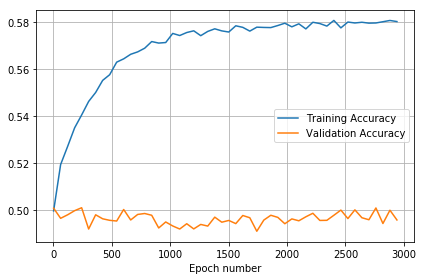

[[4177 4234]
 [5821 5768]]

Validation Avg: [ 0.49725]
Train Avg: [ 0.5820375]


[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]

Epoch 26/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6910 - binary_crossentropy: 0.6910 - acc: 0.5255 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_acc: 0.4943
Epoch 27/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6909 - binary_crossentropy: 0.6909 - acc: 0.5265 - val_loss: 0.6961 - val_binary_crossentropy: 0.6961 - val_acc: 0.4973
Epoch 28/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - acc: 0.5296 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_acc: 0.4976
Epoch 29/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5283 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_acc: 0.4967
Epoch 30/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6902 - binary_crossentropy: 0.6902 - acc: 0.5317 - val_loss: 0.6980 - val_binary_crossentropy: 0.698

Epoch 106/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6673 - binary_crossentropy: 0.6673 - acc: 0.5901 - val_loss: 0.7246 - val_binary_crossentropy: 0.7246 - val_acc: 0.4945
Epoch 107/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6669 - binary_crossentropy: 0.6669 - acc: 0.5919 - val_loss: 0.7259 - val_binary_crossentropy: 0.7259 - val_acc: 0.4909
Epoch 108/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6665 - binary_crossentropy: 0.6665 - acc: 0.5917 - val_loss: 0.7296 - val_binary_crossentropy: 0.7296 - val_acc: 0.4898
Epoch 109/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - acc: 0.5926 - val_loss: 0.7276 - val_binary_crossentropy: 0.7276 - val_acc: 0.4944
Epoch 110/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6657 - binary_crossentropy: 0.6657 - acc: 0.5943 - val_loss: 0.7272 - val_binary_crossentropy: 

Epoch 146/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6564 - binary_crossentropy: 0.6564 - acc: 0.6076 - val_loss: 0.7375 - val_binary_crossentropy: 0.7375 - val_acc: 0.4928
Epoch 147/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6563 - binary_crossentropy: 0.6563 - acc: 0.6111 - val_loss: 0.7409 - val_binary_crossentropy: 0.7409 - val_acc: 0.4932
Epoch 148/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6563 - binary_crossentropy: 0.6563 - acc: 0.6087 - val_loss: 0.7412 - val_binary_crossentropy: 0.7412 - val_acc: 0.4936
Epoch 149/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6558 - binary_crossentropy: 0.6558 - acc: 0.6089 - val_loss: 0.7441 - val_binary_crossentropy: 0.7441 - val_acc: 0.4927
Epoch 150/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6554 - binary_crossentropy: 0.6554 - acc: 0.6101 - val_loss: 0.7395 - val_binary_crossentropy: 

Epoch 186/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6476 - binary_crossentropy: 0.6476 - acc: 0.6203 - val_loss: 0.7529 - val_binary_crossentropy: 0.7529 - val_acc: 0.4938
Epoch 187/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6477 - binary_crossentropy: 0.6477 - acc: 0.6199 - val_loss: 0.7487 - val_binary_crossentropy: 0.7487 - val_acc: 0.4942
Epoch 188/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6473 - binary_crossentropy: 0.6473 - acc: 0.6214 - val_loss: 0.7531 - val_binary_crossentropy: 0.7531 - val_acc: 0.4938
Epoch 189/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6478 - binary_crossentropy: 0.6478 - acc: 0.6201 - val_loss: 0.7499 - val_binary_crossentropy: 0.7499 - val_acc: 0.4955
Epoch 190/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6474 - binary_crossentropy: 0.6474 - acc: 0.6214 - val_loss: 0.7507 - val_binary_crossentropy: 

Epoch 226/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6415 - binary_crossentropy: 0.6415 - acc: 0.6292 - val_loss: 0.7622 - val_binary_crossentropy: 0.7622 - val_acc: 0.4966
Epoch 227/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6411 - binary_crossentropy: 0.6411 - acc: 0.6277 - val_loss: 0.7572 - val_binary_crossentropy: 0.7572 - val_acc: 0.4957
Epoch 228/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6410 - binary_crossentropy: 0.6410 - acc: 0.6296 - val_loss: 0.7601 - val_binary_crossentropy: 0.7601 - val_acc: 0.4990
Epoch 229/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6412 - binary_crossentropy: 0.6412 - acc: 0.6306 - val_loss: 0.7568 - val_binary_crossentropy: 0.7568 - val_acc: 0.4984
Epoch 230/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6400 - binary_crossentropy: 0.6400 - acc: 0.6307 - val_loss: 0.7582 - val_binary_crossentropy: 

Epoch 266/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6366 - binary_crossentropy: 0.6366 - acc: 0.6347 - val_loss: 0.7621 - val_binary_crossentropy: 0.7621 - val_acc: 0.4982
Epoch 267/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6359 - binary_crossentropy: 0.6359 - acc: 0.6370 - val_loss: 0.7667 - val_binary_crossentropy: 0.7667 - val_acc: 0.4943
Epoch 268/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6363 - binary_crossentropy: 0.6363 - acc: 0.6353 - val_loss: 0.7638 - val_binary_crossentropy: 0.7638 - val_acc: 0.4982
Epoch 269/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6360 - binary_crossentropy: 0.6360 - acc: 0.6353 - val_loss: 0.7647 - val_binary_crossentropy: 0.7647 - val_acc: 0.4987
Epoch 270/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6361 - binary_crossentropy: 0.6361 - acc: 0.6371 - val_loss: 0.7631 - val_binary_crossentropy: 

Epoch 306/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6320 - binary_crossentropy: 0.6320 - acc: 0.6405 - val_loss: 0.7698 - val_binary_crossentropy: 0.7698 - val_acc: 0.4957
Epoch 307/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6318 - binary_crossentropy: 0.6318 - acc: 0.6410 - val_loss: 0.7684 - val_binary_crossentropy: 0.7684 - val_acc: 0.5002
Epoch 308/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6316 - binary_crossentropy: 0.6316 - acc: 0.6404 - val_loss: 0.7786 - val_binary_crossentropy: 0.7786 - val_acc: 0.4953
Epoch 309/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6318 - binary_crossentropy: 0.6318 - acc: 0.6397 - val_loss: 0.7718 - val_binary_crossentropy: 0.7718 - val_acc: 0.4963
Epoch 310/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6312 - binary_crossentropy: 0.6312 - acc: 0.6415 - val_loss: 0.7711 - val_binary_crossentropy: 

Epoch 346/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6288 - binary_crossentropy: 0.6288 - acc: 0.6440 - val_loss: 0.7755 - val_binary_crossentropy: 0.7755 - val_acc: 0.4937
Epoch 347/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6290 - binary_crossentropy: 0.6290 - acc: 0.6449 - val_loss: 0.7793 - val_binary_crossentropy: 0.7793 - val_acc: 0.4934
Epoch 348/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6287 - binary_crossentropy: 0.6287 - acc: 0.6443 - val_loss: 0.7808 - val_binary_crossentropy: 0.7808 - val_acc: 0.4989
Epoch 349/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6284 - binary_crossentropy: 0.6284 - acc: 0.6453 - val_loss: 0.7783 - val_binary_crossentropy: 0.7783 - val_acc: 0.4962
Epoch 350/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6280 - binary_crossentropy: 0.6280 - acc: 0.6463 - val_loss: 0.7761 - val_binary_crossentropy: 

Epoch 386/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6264 - binary_crossentropy: 0.6264 - acc: 0.6459 - val_loss: 0.7790 - val_binary_crossentropy: 0.7790 - val_acc: 0.4953
Epoch 387/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6260 - binary_crossentropy: 0.6260 - acc: 0.6489 - val_loss: 0.7796 - val_binary_crossentropy: 0.7796 - val_acc: 0.4962
Epoch 388/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6266 - binary_crossentropy: 0.6266 - acc: 0.6465 - val_loss: 0.7868 - val_binary_crossentropy: 0.7868 - val_acc: 0.4925
Epoch 389/1000
80000/80000 [==============================] - 2s 25us/step - loss: 0.6259 - binary_crossentropy: 0.6259 - acc: 0.6480 - val_loss: 0.7845 - val_binary_crossentropy: 0.7845 - val_acc: 0.4951
Epoch 390/1000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6262 - binary_crossentropy: 0.6262 - acc: 0.6495 - val_loss: 0.7799 - val_binary_crossentropy: 

Epoch 426/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6241 - binary_crossentropy: 0.6241 - acc: 0.6487 - val_loss: 0.7807 - val_binary_crossentropy: 0.7807 - val_acc: 0.4960
Epoch 427/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6489 - val_loss: 0.7839 - val_binary_crossentropy: 0.7839 - val_acc: 0.4956
Epoch 428/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6237 - binary_crossentropy: 0.6237 - acc: 0.6485 - val_loss: 0.7856 - val_binary_crossentropy: 0.7856 - val_acc: 0.4949
Epoch 429/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6487 - val_loss: 0.7870 - val_binary_crossentropy: 0.7870 - val_acc: 0.4931
Epoch 430/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6504 - val_loss: 0.7860 - val_binary_crossentropy: 

Epoch 466/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6220 - binary_crossentropy: 0.6220 - acc: 0.6510 - val_loss: 0.7884 - val_binary_crossentropy: 0.7884 - val_acc: 0.4979
Epoch 467/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6224 - binary_crossentropy: 0.6224 - acc: 0.6524 - val_loss: 0.7884 - val_binary_crossentropy: 0.7884 - val_acc: 0.4953
Epoch 468/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6220 - binary_crossentropy: 0.6220 - acc: 0.6518 - val_loss: 0.7906 - val_binary_crossentropy: 0.7906 - val_acc: 0.4948
Epoch 469/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6216 - binary_crossentropy: 0.6216 - acc: 0.6523 - val_loss: 0.7905 - val_binary_crossentropy: 0.7905 - val_acc: 0.4952
Epoch 470/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6216 - binary_crossentropy: 0.6216 - acc: 0.6515 - val_loss: 0.7925 - val_binary_crossentropy: 

Epoch 506/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6206 - binary_crossentropy: 0.6206 - acc: 0.6540 - val_loss: 0.7951 - val_binary_crossentropy: 0.7951 - val_acc: 0.4934
Epoch 507/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6205 - binary_crossentropy: 0.6205 - acc: 0.6527 - val_loss: 0.7927 - val_binary_crossentropy: 0.7927 - val_acc: 0.4947
Epoch 508/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6204 - binary_crossentropy: 0.6204 - acc: 0.6528 - val_loss: 0.7981 - val_binary_crossentropy: 0.7981 - val_acc: 0.4937
Epoch 509/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6199 - binary_crossentropy: 0.6199 - acc: 0.6543 - val_loss: 0.7942 - val_binary_crossentropy: 0.7942 - val_acc: 0.4997
Epoch 510/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6201 - binary_crossentropy: 0.6201 - acc: 0.6553 - val_loss: 0.7943 - val_binary_crossentropy: 

Epoch 546/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6189 - binary_crossentropy: 0.6189 - acc: 0.6541 - val_loss: 0.7968 - val_binary_crossentropy: 0.7968 - val_acc: 0.4953
Epoch 547/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6183 - binary_crossentropy: 0.6183 - acc: 0.6560 - val_loss: 0.7946 - val_binary_crossentropy: 0.7946 - val_acc: 0.4931
Epoch 548/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6188 - binary_crossentropy: 0.6188 - acc: 0.6545 - val_loss: 0.7984 - val_binary_crossentropy: 0.7984 - val_acc: 0.4927
Epoch 549/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6185 - binary_crossentropy: 0.6185 - acc: 0.6551 - val_loss: 0.7945 - val_binary_crossentropy: 0.7945 - val_acc: 0.4951
Epoch 550/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6191 - binary_crossentropy: 0.6191 - acc: 0.6553 - val_loss: 0.7952 - val_binary_crossentropy: 

Epoch 586/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6176 - binary_crossentropy: 0.6176 - acc: 0.6540 - val_loss: 0.8002 - val_binary_crossentropy: 0.8002 - val_acc: 0.4918
Epoch 587/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6176 - binary_crossentropy: 0.6176 - acc: 0.6560 - val_loss: 0.7954 - val_binary_crossentropy: 0.7954 - val_acc: 0.4934
Epoch 588/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6167 - binary_crossentropy: 0.6167 - acc: 0.6568 - val_loss: 0.8007 - val_binary_crossentropy: 0.8007 - val_acc: 0.4944
Epoch 589/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6168 - binary_crossentropy: 0.6168 - acc: 0.6564 - val_loss: 0.8024 - val_binary_crossentropy: 0.8024 - val_acc: 0.4947
Epoch 590/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6168 - binary_crossentropy: 0.6168 - acc: 0.6551 - val_loss: 0.7991 - val_binary_crossentropy: 

Epoch 626/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6154 - binary_crossentropy: 0.6154 - acc: 0.6581 - val_loss: 0.8019 - val_binary_crossentropy: 0.8019 - val_acc: 0.4949
Epoch 627/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6155 - binary_crossentropy: 0.6155 - acc: 0.6567 - val_loss: 0.7972 - val_binary_crossentropy: 0.7972 - val_acc: 0.4998
Epoch 628/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6160 - binary_crossentropy: 0.6160 - acc: 0.6580 - val_loss: 0.7978 - val_binary_crossentropy: 0.7978 - val_acc: 0.4952
Epoch 629/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6166 - binary_crossentropy: 0.6166 - acc: 0.6551 - val_loss: 0.8051 - val_binary_crossentropy: 0.8051 - val_acc: 0.4923
Epoch 630/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6155 - binary_crossentropy: 0.6155 - acc: 0.6582 - val_loss: 0.8036 - val_binary_crossentropy: 

Epoch 666/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6147 - binary_crossentropy: 0.6147 - acc: 0.6591 - val_loss: 0.8033 - val_binary_crossentropy: 0.8033 - val_acc: 0.4965
Epoch 667/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6152 - binary_crossentropy: 0.6152 - acc: 0.6583 - val_loss: 0.8044 - val_binary_crossentropy: 0.8044 - val_acc: 0.4958
Epoch 668/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6144 - binary_crossentropy: 0.6144 - acc: 0.6588 - val_loss: 0.8064 - val_binary_crossentropy: 0.8064 - val_acc: 0.4924
Epoch 669/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6576 - val_loss: 0.8065 - val_binary_crossentropy: 0.8065 - val_acc: 0.4970
Epoch 670/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6585 - val_loss: 0.8036 - val_binary_crossentropy: 

Epoch 706/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6138 - binary_crossentropy: 0.6138 - acc: 0.6582 - val_loss: 0.8064 - val_binary_crossentropy: 0.8064 - val_acc: 0.4976
Epoch 707/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6138 - binary_crossentropy: 0.6138 - acc: 0.6594 - val_loss: 0.8065 - val_binary_crossentropy: 0.8065 - val_acc: 0.4922
Epoch 708/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6138 - binary_crossentropy: 0.6138 - acc: 0.6582 - val_loss: 0.8019 - val_binary_crossentropy: 0.8019 - val_acc: 0.4946
Epoch 709/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6135 - binary_crossentropy: 0.6135 - acc: 0.6586 - val_loss: 0.8061 - val_binary_crossentropy: 0.8061 - val_acc: 0.4932
Epoch 710/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6143 - binary_crossentropy: 0.6143 - acc: 0.6584 - val_loss: 0.8059 - val_binary_crossentropy: 

Epoch 746/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6124 - binary_crossentropy: 0.6124 - acc: 0.6629 - val_loss: 0.8047 - val_binary_crossentropy: 0.8047 - val_acc: 0.4983
Epoch 747/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6130 - binary_crossentropy: 0.6130 - acc: 0.6604 - val_loss: 0.8028 - val_binary_crossentropy: 0.8028 - val_acc: 0.4952
Epoch 748/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6127 - binary_crossentropy: 0.6127 - acc: 0.6597 - val_loss: 0.8125 - val_binary_crossentropy: 0.8125 - val_acc: 0.4995
Epoch 749/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6130 - binary_crossentropy: 0.6130 - acc: 0.659 - 2s 21us/step - loss: 0.6127 - binary_crossentropy: 0.6127 - acc: 0.6600 - val_loss: 0.8091 - val_binary_crossentropy: 0.8091 - val_acc: 0.4942
Epoch 750/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6129 - binary_crossentropy:

Epoch 786/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6113 - binary_crossentropy: 0.6113 - acc: 0.6615 - val_loss: 0.8153 - val_binary_crossentropy: 0.8153 - val_acc: 0.4924
Epoch 787/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6118 - binary_crossentropy: 0.6118 - acc: 0.6611 - val_loss: 0.8043 - val_binary_crossentropy: 0.8043 - val_acc: 0.4949
Epoch 788/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6118 - binary_crossentropy: 0.6118 - acc: 0.6605 - val_loss: 0.8025 - val_binary_crossentropy: 0.8025 - val_acc: 0.4966
Epoch 789/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6117 - binary_crossentropy: 0.6117 - acc: 0.6614 - val_loss: 0.8053 - val_binary_crossentropy: 0.8053 - val_acc: 0.4963
Epoch 790/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6112 - binary_crossentropy: 0.6112 - acc: 0.6611 - val_loss: 0.8108 - val_binary_crossentropy: 

Epoch 826/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6100 - binary_crossentropy: 0.6100 - acc: 0.6620 - val_loss: 0.8060 - val_binary_crossentropy: 0.8060 - val_acc: 0.4975
Epoch 827/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6107 - binary_crossentropy: 0.6107 - acc: 0.6647 - val_loss: 0.8070 - val_binary_crossentropy: 0.8070 - val_acc: 0.5003
Epoch 828/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6105 - binary_crossentropy: 0.6105 - acc: 0.6626 - val_loss: 0.8072 - val_binary_crossentropy: 0.8072 - val_acc: 0.5007
Epoch 829/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6104 - binary_crossentropy: 0.6104 - acc: 0.6633 - val_loss: 0.8170 - val_binary_crossentropy: 0.8170 - val_acc: 0.4947
Epoch 830/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6109 - binary_crossentropy: 0.6109 - acc: 0.6621 - val_loss: 0.8095 - val_binary_crossentropy: 

Epoch 866/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6095 - binary_crossentropy: 0.6095 - acc: 0.6626 - val_loss: 0.8113 - val_binary_crossentropy: 0.8113 - val_acc: 0.4980
Epoch 867/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6099 - binary_crossentropy: 0.6099 - acc: 0.6635 - val_loss: 0.8138 - val_binary_crossentropy: 0.8138 - val_acc: 0.4964
Epoch 868/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6101 - binary_crossentropy: 0.6101 - acc: 0.6628 - val_loss: 0.8134 - val_binary_crossentropy: 0.8134 - val_acc: 0.4983
Epoch 869/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6651 - val_loss: 0.8121 - val_binary_crossentropy: 0.8121 - val_acc: 0.5000
Epoch 870/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6095 - binary_crossentropy: 0.6095 - acc: 0.6660 - val_loss: 0.8090 - val_binary_crossentropy: 

Epoch 906/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6093 - binary_crossentropy: 0.6093 - acc: 0.6656 - val_loss: 0.8111 - val_binary_crossentropy: 0.8111 - val_acc: 0.4992
Epoch 907/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6090 - binary_crossentropy: 0.6090 - acc: 0.6645 - val_loss: 0.8139 - val_binary_crossentropy: 0.8139 - val_acc: 0.4977
Epoch 908/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6092 - binary_crossentropy: 0.6092 - acc: 0.6649 - val_loss: 0.8097 - val_binary_crossentropy: 0.8097 - val_acc: 0.4986
Epoch 909/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6650 - val_loss: 0.8141 - val_binary_crossentropy: 0.8141 - val_acc: 0.5000
Epoch 910/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6099 - binary_crossentropy: 0.6099 - acc: 0.6641 - val_loss: 0.8082 - val_binary_crossentropy: 

Epoch 946/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6089 - binary_crossentropy: 0.6089 - acc: 0.6653 - val_loss: 0.8122 - val_binary_crossentropy: 0.8122 - val_acc: 0.4983
Epoch 947/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6087 - binary_crossentropy: 0.6087 - acc: 0.6656 - val_loss: 0.8122 - val_binary_crossentropy: 0.8122 - val_acc: 0.4990
Epoch 948/1000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6087 - binary_crossentropy: 0.6087 - acc: 0.6634 - val_loss: 0.8147 - val_binary_crossentropy: 0.8147 - val_acc: 0.5004
Epoch 949/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6085 - binary_crossentropy: 0.6085 - acc: 0.6650 - val_loss: 0.8128 - val_binary_crossentropy: 0.8128 - val_acc: 0.4942
Epoch 950/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6086 - binary_crossentropy: 0.6086 - acc: 0.6655 - val_loss: 0.8152 - val_binary_crossentropy: 

Epoch 986/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6086 - binary_crossentropy: 0.6086 - acc: 0.6647 - val_loss: 0.8092 - val_binary_crossentropy: 0.8092 - val_acc: 0.4996
Epoch 987/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6079 - binary_crossentropy: 0.6079 - acc: 0.6656 - val_loss: 0.8142 - val_binary_crossentropy: 0.8142 - val_acc: 0.4993
Epoch 988/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6084 - binary_crossentropy: 0.6084 - acc: 0.6654 - val_loss: 0.8098 - val_binary_crossentropy: 0.8098 - val_acc: 0.4965
Epoch 989/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6089 - binary_crossentropy: 0.6089 - acc: 0.6642 - val_loss: 0.8192 - val_binary_crossentropy: 0.8192 - val_acc: 0.4976
Epoch 990/1000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6085 - binary_crossentropy: 0.6085 - acc: 0.6643 - val_loss: 0.8203 - val_binary_crossentropy: 

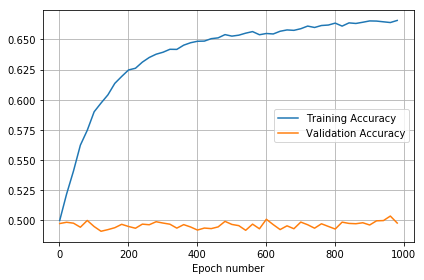

[[4245 4364]
 [5753 5638]]

Validation Avg: [ 0.49415]
Train Avg: [ 0.66585]


[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]    [0]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 

Epoch 26/2000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6899 - binary_crossentropy: 0.6899 - acc: 0.5276 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_acc: 0.4981
Epoch 27/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - acc: 0.5297 - val_loss: 0.6976 - val_binary_crossentropy: 0.6976 - val_acc: 0.4993
Epoch 28/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - acc: 0.5304 - val_loss: 0.6978 - val_binary_crossentropy: 0.6978 - val_acc: 0.4984
Epoch 29/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6890 - binary_crossentropy: 0.6890 - acc: 0.5312 - val_loss: 0.6988 - val_binary_crossentropy: 0.6988 - val_acc: 0.4969
Epoch 30/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - acc: 0.5351 - val_loss: 0.6982 - val_binary_crossentropy: 0.698

80000/80000 [==============================] - 2s 21us/step - loss: 0.6611 - binary_crossentropy: 0.6611 - acc: 0.5914 - val_loss: 0.7322 - val_binary_crossentropy: 0.7322 - val_acc: 0.4999
Epoch 107/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6604 - binary_crossentropy: 0.6604 - acc: 0.5930 - val_loss: 0.7349 - val_binary_crossentropy: 0.7349 - val_acc: 0.5007
Epoch 108/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6605 - binary_crossentropy: 0.6605 - acc: 0.5938 - val_loss: 0.7299 - val_binary_crossentropy: 0.7299 - val_acc: 0.4992
Epoch 109/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6603 - binary_crossentropy: 0.6603 - acc: 0.5925 - val_loss: 0.7332 - val_binary_crossentropy: 0.7332 - val_acc: 0.4984
Epoch 110/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6594 - binary_crossentropy: 0.6594 - acc: 0.5934 - val_loss: 0.7357 - val_binary_crossentropy: 0.7357 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6508 - binary_crossentropy: 0.6508 - acc: 0.6069 - val_loss: 0.7445 - val_binary_crossentropy: 0.7445 - val_acc: 0.5002
Epoch 147/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6506 - binary_crossentropy: 0.6506 - acc: 0.6044 - val_loss: 0.7426 - val_binary_crossentropy: 0.7426 - val_acc: 0.4969
Epoch 148/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6504 - binary_crossentropy: 0.6504 - acc: 0.6053 - val_loss: 0.7460 - val_binary_crossentropy: 0.7460 - val_acc: 0.4997
Epoch 149/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6504 - binary_crossentropy: 0.6504 - acc: 0.6065 - val_loss: 0.7467 - val_binary_crossentropy: 0.7467 - val_acc: 0.4988
Epoch 150/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6501 - binary_crossentropy: 0.6501 - acc: 0.6056 - val_loss: 0.7522 - val_binary_crossentropy: 0.7522 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6438 - binary_crossentropy: 0.6438 - acc: 0.6133 - val_loss: 0.7569 - val_binary_crossentropy: 0.7569 - val_acc: 0.5030
Epoch 187/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6432 - binary_crossentropy: 0.6432 - acc: 0.6154 - val_loss: 0.7627 - val_binary_crossentropy: 0.7627 - val_acc: 0.5018
Epoch 188/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6430 - binary_crossentropy: 0.6430 - acc: 0.6145 - val_loss: 0.7565 - val_binary_crossentropy: 0.7565 - val_acc: 0.5029
Epoch 189/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6434 - binary_crossentropy: 0.6434 - acc: 0.6126 - val_loss: 0.7595 - val_binary_crossentropy: 0.7595 - val_acc: 0.5003
Epoch 190/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6425 - binary_crossentropy: 0.6425 - acc: 0.6151 - val_loss: 0.7595 - val_binary_crossentropy: 0.7595 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6374 - binary_crossentropy: 0.6374 - acc: 0.6207 - val_loss: 0.7714 - val_binary_crossentropy: 0.7714 - val_acc: 0.4993
Epoch 227/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6378 - binary_crossentropy: 0.6378 - acc: 0.6207 - val_loss: 0.7690 - val_binary_crossentropy: 0.7690 - val_acc: 0.4984
Epoch 228/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6372 - binary_crossentropy: 0.6372 - acc: 0.6197 - val_loss: 0.7695 - val_binary_crossentropy: 0.7695 - val_acc: 0.4999
Epoch 229/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6370 - binary_crossentropy: 0.6370 - acc: 0.6205 - val_loss: 0.7674 - val_binary_crossentropy: 0.7674 - val_acc: 0.5009
Epoch 230/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6371 - binary_crossentropy: 0.6371 - acc: 0.6213 - val_loss: 0.7740 - val_binary_crossentropy: 0.7740 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6326 - binary_crossentropy: 0.6326 - acc: 0.6276 - val_loss: 0.7807 - val_binary_crossentropy: 0.7807 - val_acc: 0.4968
Epoch 267/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6328 - binary_crossentropy: 0.6328 - acc: 0.6264 - val_loss: 0.7916 - val_binary_crossentropy: 0.7916 - val_acc: 0.4962
Epoch 268/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6320 - binary_crossentropy: 0.6320 - acc: 0.6269 - val_loss: 0.7799 - val_binary_crossentropy: 0.7799 - val_acc: 0.4964
Epoch 269/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6326 - binary_crossentropy: 0.6326 - acc: 0.6257 - val_loss: 0.7889 - val_binary_crossentropy: 0.7889 - val_acc: 0.4990
Epoch 270/2000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6325 - binary_crossentropy: 0.6325 - acc: 0.6237 - val_loss: 0.7809 - val_binary_crossentropy: 0.7809 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6292 - binary_crossentropy: 0.6292 - acc: 0.6287 - val_loss: 0.8006 - val_binary_crossentropy: 0.8006 - val_acc: 0.4976
Epoch 307/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6289 - binary_crossentropy: 0.6289 - acc: 0.6291 - val_loss: 0.7917 - val_binary_crossentropy: 0.7917 - val_acc: 0.4983
Epoch 308/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6294 - binary_crossentropy: 0.6294 - acc: 0.6292 - val_loss: 0.7949 - val_binary_crossentropy: 0.7949 - val_acc: 0.5006
Epoch 309/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6288 - binary_crossentropy: 0.6288 - acc: 0.6305 - val_loss: 0.7918 - val_binary_crossentropy: 0.7918 - val_acc: 0.4994
Epoch 310/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6292 - binary_crossentropy: 0.6292 - acc: 0.6289 - val_loss: 0.7950 - val_binary_crossentropy: 0.7950 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6261 - binary_crossentropy: 0.6261 - acc: 0.6339 - val_loss: 0.8033 - val_binary_crossentropy: 0.8033 - val_acc: 0.5005
Epoch 347/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6265 - binary_crossentropy: 0.6265 - acc: 0.6325 - val_loss: 0.7961 - val_binary_crossentropy: 0.7961 - val_acc: 0.5013
Epoch 348/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6262 - binary_crossentropy: 0.6262 - acc: 0.6330 - val_loss: 0.7980 - val_binary_crossentropy: 0.7980 - val_acc: 0.4957
Epoch 349/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6260 - binary_crossentropy: 0.6260 - acc: 0.6328 - val_loss: 0.7951 - val_binary_crossentropy: 0.7951 - val_acc: 0.4978
Epoch 350/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6265 - binary_crossentropy: 0.6265 - acc: 0.6320 - val_loss: 0.8007 - val_binary_crossentropy: 0.8007 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6240 - binary_crossentropy: 0.6240 - acc: 0.6352 - val_loss: 0.8057 - val_binary_crossentropy: 0.8057 - val_acc: 0.4971
Epoch 387/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6235 - binary_crossentropy: 0.6235 - acc: 0.6360 - val_loss: 0.8031 - val_binary_crossentropy: 0.8031 - val_acc: 0.4988
Epoch 388/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6235 - binary_crossentropy: 0.6235 - acc: 0.6349 - val_loss: 0.8045 - val_binary_crossentropy: 0.8045 - val_acc: 0.5012
Epoch 389/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6372 - val_loss: 0.8072 - val_binary_crossentropy: 0.8072 - val_acc: 0.5000
Epoch 390/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6236 - binary_crossentropy: 0.6236 - acc: 0.6348 - val_loss: 0.8063 - val_binary_crossentropy: 0.8063 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6214 - binary_crossentropy: 0.6214 - acc: 0.6385 - val_loss: 0.8069 - val_binary_crossentropy: 0.8069 - val_acc: 0.4993
Epoch 427/2000
80000/80000 [==============================] - 2s 20us/step - loss: 0.6221 - binary_crossentropy: 0.6221 - acc: 0.6377 - val_loss: 0.8106 - val_binary_crossentropy: 0.8106 - val_acc: 0.4993
Epoch 428/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6213 - binary_crossentropy: 0.6213 - acc: 0.6383 - val_loss: 0.8017 - val_binary_crossentropy: 0.8017 - val_acc: 0.4972
Epoch 429/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6217 - binary_crossentropy: 0.6217 - acc: 0.6384 - val_loss: 0.8119 - val_binary_crossentropy: 0.8119 - val_acc: 0.4983
Epoch 430/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6215 - binary_crossentropy: 0.6215 - acc: 0.6392 - val_loss: 0.8109 - val_binary_crossentropy: 0.8109 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6199 - binary_crossentropy: 0.6199 - acc: 0.6389 - val_loss: 0.8186 - val_binary_crossentropy: 0.8186 - val_acc: 0.4993
Epoch 467/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6200 - binary_crossentropy: 0.6200 - acc: 0.6386 - val_loss: 0.8190 - val_binary_crossentropy: 0.8190 - val_acc: 0.4993
Epoch 468/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6194 - binary_crossentropy: 0.6194 - acc: 0.6393 - val_loss: 0.8114 - val_binary_crossentropy: 0.8114 - val_acc: 0.4965
Epoch 469/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6196 - binary_crossentropy: 0.6196 - acc: 0.6402 - val_loss: 0.8286 - val_binary_crossentropy: 0.8286 - val_acc: 0.4986
Epoch 470/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6195 - binary_crossentropy: 0.6195 - acc: 0.6402 - val_loss: 0.8075 - val_binary_crossentropy: 0.8075 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6184 - binary_crossentropy: 0.6184 - acc: 0.6403 - val_loss: 0.8132 - val_binary_crossentropy: 0.8132 - val_acc: 0.4995
Epoch 507/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6182 - binary_crossentropy: 0.6182 - acc: 0.6409 - val_loss: 0.8272 - val_binary_crossentropy: 0.8272 - val_acc: 0.4988
Epoch 508/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6184 - binary_crossentropy: 0.6184 - acc: 0.6412 - val_loss: 0.8142 - val_binary_crossentropy: 0.8142 - val_acc: 0.4964
Epoch 509/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6180 - binary_crossentropy: 0.6180 - acc: 0.6412 - val_loss: 0.8131 - val_binary_crossentropy: 0.8131 - val_acc: 0.4968
Epoch 510/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6182 - binary_crossentropy: 0.6182 - acc: 0.6411 - val_loss: 0.8153 - val_binary_crossentropy: 0.8153 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6164 - binary_crossentropy: 0.6164 - acc: 0.6422 - val_loss: 0.8155 - val_binary_crossentropy: 0.8155 - val_acc: 0.4960
Epoch 547/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6169 - binary_crossentropy: 0.6169 - acc: 0.6417 - val_loss: 0.8347 - val_binary_crossentropy: 0.8347 - val_acc: 0.4973
Epoch 548/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6166 - binary_crossentropy: 0.6166 - acc: 0.6422 - val_loss: 0.8306 - val_binary_crossentropy: 0.8306 - val_acc: 0.4962
Epoch 549/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6162 - binary_crossentropy: 0.6162 - acc: 0.6435 - val_loss: 0.8291 - val_binary_crossentropy: 0.8291 - val_acc: 0.4978
Epoch 550/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6164 - binary_crossentropy: 0.6164 - acc: 0.6436 - val_loss: 0.8289 - val_binary_crossentropy: 0.8289 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6441 - val_loss: 0.8456 - val_binary_crossentropy: 0.8456 - val_acc: 0.4989
Epoch 587/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6146 - binary_crossentropy: 0.6146 - acc: 0.6430 - val_loss: 0.8276 - val_binary_crossentropy: 0.8276 - val_acc: 0.4964
Epoch 588/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6148 - binary_crossentropy: 0.6148 - acc: 0.6436 - val_loss: 0.8291 - val_binary_crossentropy: 0.8291 - val_acc: 0.4968
Epoch 589/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6146 - binary_crossentropy: 0.6146 - acc: 0.6440 - val_loss: 0.8213 - val_binary_crossentropy: 0.8213 - val_acc: 0.5002
Epoch 590/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6144 - binary_crossentropy: 0.6144 - acc: 0.6440 - val_loss: 0.8323 - val_binary_crossentropy: 0.8323 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6128 - binary_crossentropy: 0.6128 - acc: 0.6461 - val_loss: 0.8316 - val_binary_crossentropy: 0.8316 - val_acc: 0.4983
Epoch 627/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6128 - binary_crossentropy: 0.6128 - acc: 0.6456 - val_loss: 0.8474 - val_binary_crossentropy: 0.8474 - val_acc: 0.4985
Epoch 628/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6129 - binary_crossentropy: 0.6129 - acc: 0.6444 - val_loss: 0.8303 - val_binary_crossentropy: 0.8303 - val_acc: 0.4996
Epoch 629/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6131 - binary_crossentropy: 0.6131 - acc: 0.6454 - val_loss: 0.8326 - val_binary_crossentropy: 0.8326 - val_acc: 0.4988
Epoch 630/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6128 - binary_crossentropy: 0.6128 - acc: 0.6457 - val_loss: 0.8430 - val_binary_crossentropy: 0.8430 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6113 - binary_crossentropy: 0.6113 - acc: 0.6469 - val_loss: 0.8470 - val_binary_crossentropy: 0.8470 - val_acc: 0.4972
Epoch 667/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6121 - binary_crossentropy: 0.6121 - acc: 0.6466 - val_loss: 0.8349 - val_binary_crossentropy: 0.8349 - val_acc: 0.4979
Epoch 668/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6111 - binary_crossentropy: 0.6111 - acc: 0.6467 - val_loss: 0.8515 - val_binary_crossentropy: 0.8515 - val_acc: 0.4983
Epoch 669/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6107 - binary_crossentropy: 0.6107 - acc: 0.6469 - val_loss: 0.8464 - val_binary_crossentropy: 0.8464 - val_acc: 0.4970
Epoch 670/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6113 - binary_crossentropy: 0.6113 - acc: 0.6466 - val_loss: 0.8405 - val_binary_crossentropy: 0.8405 - val_ac

Epoch 706/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6097 - binary_crossentropy: 0.6097 - acc: 0.6468 - val_loss: 0.8467 - val_binary_crossentropy: 0.8467 - val_acc: 0.4991
Epoch 707/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6100 - binary_crossentropy: 0.6100 - acc: 0.6476 - val_loss: 0.8430 - val_binary_crossentropy: 0.8430 - val_acc: 0.4982
Epoch 708/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6096 - binary_crossentropy: 0.6096 - acc: 0.6480 - val_loss: 0.8454 - val_binary_crossentropy: 0.8454 - val_acc: 0.4980
Epoch 709/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6092 - binary_crossentropy: 0.6092 - acc: 0.6474 - val_loss: 0.8436 - val_binary_crossentropy: 0.8436 - val_acc: 0.4985
Epoch 710/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6490 - val_loss: 0.8388 - val_binary_crossentropy: 

Epoch 746/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6081 - binary_crossentropy: 0.6081 - acc: 0.6504 - val_loss: 0.8488 - val_binary_crossentropy: 0.8488 - val_acc: 0.4985
Epoch 747/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6080 - binary_crossentropy: 0.6080 - acc: 0.6503 - val_loss: 0.8481 - val_binary_crossentropy: 0.8481 - val_acc: 0.4987
Epoch 748/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6082 - binary_crossentropy: 0.6082 - acc: 0.6503 - val_loss: 0.8444 - val_binary_crossentropy: 0.8444 - val_acc: 0.4964
Epoch 749/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6083 - binary_crossentropy: 0.6083 - acc: 0.6497 - val_loss: 0.8519 - val_binary_crossentropy: 0.8519 - val_acc: 0.4968
Epoch 750/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6079 - binary_crossentropy: 0.6079 - acc: 0.6505 - val_loss: 0.8532 - val_binary_crossentropy: 

Epoch 786/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6066 - binary_crossentropy: 0.6066 - acc: 0.6528 - val_loss: 0.8596 - val_binary_crossentropy: 0.8596 - val_acc: 0.4961
Epoch 787/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6066 - binary_crossentropy: 0.6066 - acc: 0.6507 - val_loss: 0.8567 - val_binary_crossentropy: 0.8567 - val_acc: 0.4987
Epoch 788/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6068 - binary_crossentropy: 0.6068 - acc: 0.6521 - val_loss: 0.8471 - val_binary_crossentropy: 0.8471 - val_acc: 0.4987
Epoch 789/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6067 - binary_crossentropy: 0.6067 - acc: 0.6502 - val_loss: 0.8586 - val_binary_crossentropy: 0.8586 - val_acc: 0.4988
Epoch 790/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6069 - binary_crossentropy: 0.6069 - acc: 0.6530 - val_loss: 0.8569 - val_binary_crossentropy: 

Epoch 826/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6059 - binary_crossentropy: 0.6059 - acc: 0.6503 - val_loss: 0.8556 - val_binary_crossentropy: 0.8556 - val_acc: 0.4973
Epoch 827/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6053 - binary_crossentropy: 0.6053 - acc: 0.6538 - val_loss: 0.8565 - val_binary_crossentropy: 0.8565 - val_acc: 0.4971
Epoch 828/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6054 - binary_crossentropy: 0.6054 - acc: 0.6523 - val_loss: 0.8575 - val_binary_crossentropy: 0.8575 - val_acc: 0.4988
Epoch 829/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6051 - binary_crossentropy: 0.6051 - acc: 0.6535 - val_loss: 0.8580 - val_binary_crossentropy: 0.8580 - val_acc: 0.4939
Epoch 830/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6058 - binary_crossentropy: 0.6058 - acc: 0.6523 - val_loss: 0.8572 - val_binary_crossentropy: 

Epoch 866/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6041 - binary_crossentropy: 0.6041 - acc: 0.6539 - val_loss: 0.8609 - val_binary_crossentropy: 0.8609 - val_acc: 0.4990
Epoch 867/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6047 - binary_crossentropy: 0.6047 - acc: 0.6534 - val_loss: 0.8665 - val_binary_crossentropy: 0.8665 - val_acc: 0.4987
Epoch 868/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6042 - binary_crossentropy: 0.6042 - acc: 0.6532 - val_loss: 0.8529 - val_binary_crossentropy: 0.8529 - val_acc: 0.4975
Epoch 869/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6046 - binary_crossentropy: 0.6046 - acc: 0.6531 - val_loss: 0.8612 - val_binary_crossentropy: 0.8612 - val_acc: 0.4992
Epoch 870/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6043 - binary_crossentropy: 0.6043 - acc: 0.6542 - val_loss: 0.8649 - val_binary_crossentropy: 

Epoch 906/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6040 - binary_crossentropy: 0.6040 - acc: 0.6548 - val_loss: 0.8699 - val_binary_crossentropy: 0.8699 - val_acc: 0.4988
Epoch 907/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6029 - binary_crossentropy: 0.6029 - acc: 0.6542 - val_loss: 0.8699 - val_binary_crossentropy: 0.8699 - val_acc: 0.4961
Epoch 908/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6036 - binary_crossentropy: 0.6036 - acc: 0.6550 - val_loss: 0.8726 - val_binary_crossentropy: 0.8726 - val_acc: 0.4991
Epoch 909/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6041 - binary_crossentropy: 0.6041 - acc: 0.6537 - val_loss: 0.8652 - val_binary_crossentropy: 0.8652 - val_acc: 0.4967
Epoch 910/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6032 - binary_crossentropy: 0.6032 - acc: 0.6538 - val_loss: 0.8583 - val_binary_crossentropy: 

Epoch 946/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6023 - binary_crossentropy: 0.6023 - acc: 0.6557 - val_loss: 0.8731 - val_binary_crossentropy: 0.8731 - val_acc: 0.5019
Epoch 947/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6016 - binary_crossentropy: 0.6016 - acc: 0.6549 - val_loss: 0.8643 - val_binary_crossentropy: 0.8643 - val_acc: 0.5023
Epoch 948/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6029 - binary_crossentropy: 0.6029 - acc: 0.6559 - val_loss: 0.8660 - val_binary_crossentropy: 0.8660 - val_acc: 0.4978
Epoch 949/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6025 - binary_crossentropy: 0.6025 - acc: 0.6543 - val_loss: 0.8597 - val_binary_crossentropy: 0.8597 - val_acc: 0.5001
Epoch 950/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6026 - binary_crossentropy: 0.6026 - acc: 0.6551 - val_loss: 0.8820 - val_binary_crossentropy: 

Epoch 986/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6014 - binary_crossentropy: 0.6014 - acc: 0.6579 - val_loss: 0.8597 - val_binary_crossentropy: 0.8597 - val_acc: 0.4972
Epoch 987/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6584 - val_loss: 0.8663 - val_binary_crossentropy: 0.8663 - val_acc: 0.4985
Epoch 988/2000
80000/80000 [==============================] - 2s 25us/step - loss: 0.6009 - binary_crossentropy: 0.6009 - acc: 0.6579 - val_loss: 0.8574 - val_binary_crossentropy: 0.8574 - val_acc: 0.4983
Epoch 989/2000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6014 - binary_crossentropy: 0.6014 - acc: 0.6580 - val_loss: 0.8753 - val_binary_crossentropy: 0.8753 - val_acc: 0.4978
Epoch 990/2000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6016 - binary_crossentropy: 0.6016 - acc: 0.6559 - val_loss: 0.8671 - val_binary_crossentropy: 

Epoch 1065/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6608 - val_loss: 0.8666 - val_binary_crossentropy: 0.8666 - val_acc: 0.4992
Epoch 1066/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5990 - binary_crossentropy: 0.5990 - acc: 0.6588 - val_loss: 0.8818 - val_binary_crossentropy: 0.8818 - val_acc: 0.4950
Epoch 1067/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6598 - val_loss: 0.8698 - val_binary_crossentropy: 0.8698 - val_acc: 0.4976
Epoch 1068/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6589 - val_loss: 0.8819 - val_binary_crossentropy: 0.8819 - val_acc: 0.4997
Epoch 1069/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5992 - binary_crossentropy: 0.5992 - acc: 0.6598 - val_loss: 0.8766 - val_binary_crossentr

Epoch 1105/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6610 - val_loss: 0.8816 - val_binary_crossentropy: 0.8816 - val_acc: 0.4967
Epoch 1106/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6599 - val_loss: 0.8711 - val_binary_crossentropy: 0.8711 - val_acc: 0.4959
Epoch 1107/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6606 - val_loss: 0.8738 - val_binary_crossentropy: 0.8738 - val_acc: 0.4976
Epoch 1108/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6601 - val_loss: 0.8808 - val_binary_crossentropy: 0.8808 - val_acc: 0.4989
Epoch 1109/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6602 - val_loss: 0.8673 - val_binary_crossentr

Epoch 1145/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6616 - val_loss: 0.8756 - val_binary_crossentropy: 0.8756 - val_acc: 0.4967
Epoch 1146/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6611 - val_loss: 0.8865 - val_binary_crossentropy: 0.8865 - val_acc: 0.4960
Epoch 1147/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6600 - val_loss: 0.8740 - val_binary_crossentropy: 0.8740 - val_acc: 0.5005
Epoch 1148/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5981 - binary_crossentropy: 0.5981 - acc: 0.6603 - val_loss: 0.8805 - val_binary_crossentropy: 0.8805 - val_acc: 0.4954
Epoch 1149/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6585 - val_loss: 0.8782 - val_binary_crossentr

Epoch 1185/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5971 - binary_crossentropy: 0.5971 - acc: 0.6614 - val_loss: 0.8647 - val_binary_crossentropy: 0.8647 - val_acc: 0.4964
Epoch 1186/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5975 - binary_crossentropy: 0.5975 - acc: 0.6621 - val_loss: 0.8668 - val_binary_crossentropy: 0.8668 - val_acc: 0.4963
Epoch 1187/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6598 - val_loss: 0.8977 - val_binary_crossentropy: 0.8977 - val_acc: 0.4959
Epoch 1188/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5971 - binary_crossentropy: 0.5971 - acc: 0.6602 - val_loss: 0.8733 - val_binary_crossentropy: 0.8733 - val_acc: 0.4950
Epoch 1189/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5969 - binary_crossentropy: 0.5969 - acc: 0.6605 - val_loss: 0.8806 - val_binary_crossentr

Epoch 1225/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5972 - binary_crossentropy: 0.5972 - acc: 0.6618 - val_loss: 0.8721 - val_binary_crossentropy: 0.8721 - val_acc: 0.4944
Epoch 1226/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5972 - binary_crossentropy: 0.5972 - acc: 0.6612 - val_loss: 0.8771 - val_binary_crossentropy: 0.8771 - val_acc: 0.4960
Epoch 1227/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5969 - binary_crossentropy: 0.5969 - acc: 0.6593 - val_loss: 0.8739 - val_binary_crossentropy: 0.8739 - val_acc: 0.4965
Epoch 1228/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5972 - binary_crossentropy: 0.5972 - acc: 0.6627 - val_loss: 0.8765 - val_binary_crossentropy: 0.8765 - val_acc: 0.4924
Epoch 1229/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5970 - binary_crossentropy: 0.5970 - acc: 0.6609 - val_loss: 0.8725 - val_binary_crossentr

Epoch 1265/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5965 - binary_crossentropy: 0.5965 - acc: 0.6618 - val_loss: 0.8906 - val_binary_crossentropy: 0.8906 - val_acc: 0.4943
Epoch 1266/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5972 - binary_crossentropy: 0.5972 - acc: 0.6623 - val_loss: 0.8857 - val_binary_crossentropy: 0.8857 - val_acc: 0.4962
Epoch 1267/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5967 - binary_crossentropy: 0.5967 - acc: 0.6624 - val_loss: 0.8770 - val_binary_crossentropy: 0.8770 - val_acc: 0.4953
Epoch 1268/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5974 - binary_crossentropy: 0.5974 - acc: 0.6610 - val_loss: 0.8827 - val_binary_crossentropy: 0.8827 - val_acc: 0.4917
Epoch 1269/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5964 - binary_crossentropy: 0.5964 - acc: 0.6625 - val_loss: 0.8837 - val_binary_crossentr

Epoch 1305/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5969 - binary_crossentropy: 0.5969 - acc: 0.6625 - val_loss: 0.8908 - val_binary_crossentropy: 0.8908 - val_acc: 0.4944
Epoch 1306/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5966 - binary_crossentropy: 0.5966 - acc: 0.6625 - val_loss: 0.8813 - val_binary_crossentropy: 0.8813 - val_acc: 0.4952
Epoch 1307/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5960 - binary_crossentropy: 0.5960 - acc: 0.6635 - val_loss: 0.8878 - val_binary_crossentropy: 0.8878 - val_acc: 0.4963
Epoch 1308/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5963 - binary_crossentropy: 0.5963 - acc: 0.6637 - val_loss: 0.8758 - val_binary_crossentropy: 0.8758 - val_acc: 0.4959
Epoch 1309/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5964 - binary_crossentropy: 0.5964 - acc: 0.6617 - val_loss: 0.8787 - val_binary_crossentr

Epoch 1345/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5954 - binary_crossentropy: 0.5954 - acc: 0.6646 - val_loss: 0.8858 - val_binary_crossentropy: 0.8858 - val_acc: 0.4961
Epoch 1346/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5959 - binary_crossentropy: 0.5959 - acc: 0.6630 - val_loss: 0.8828 - val_binary_crossentropy: 0.8828 - val_acc: 0.4950
Epoch 1347/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5953 - binary_crossentropy: 0.5953 - acc: 0.6641 - val_loss: 0.8781 - val_binary_crossentropy: 0.8781 - val_acc: 0.4941
Epoch 1348/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5958 - binary_crossentropy: 0.5958 - acc: 0.6638 - val_loss: 0.8913 - val_binary_crossentropy: 0.8913 - val_acc: 0.4966
Epoch 1349/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5962 - binary_crossentropy: 0.5962 - acc: 0.6616 - val_loss: 0.8904 - val_binary_crossentr

Epoch 1385/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5957 - binary_crossentropy: 0.5957 - acc: 0.6620 - val_loss: 0.8894 - val_binary_crossentropy: 0.8894 - val_acc: 0.4950
Epoch 1386/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5955 - binary_crossentropy: 0.5955 - acc: 0.6630 - val_loss: 0.8984 - val_binary_crossentropy: 0.8984 - val_acc: 0.4968
Epoch 1387/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5954 - binary_crossentropy: 0.5954 - acc: 0.6637 - val_loss: 0.8810 - val_binary_crossentropy: 0.8810 - val_acc: 0.4992
Epoch 1388/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5957 - binary_crossentropy: 0.5957 - acc: 0.6621 - val_loss: 0.8884 - val_binary_crossentropy: 0.8884 - val_acc: 0.4978
Epoch 1389/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.6626 - val_loss: 0.8926 - val_binary_crossentr

Epoch 1425/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5948 - binary_crossentropy: 0.5948 - acc: 0.6639 - val_loss: 0.8909 - val_binary_crossentropy: 0.8909 - val_acc: 0.4950
Epoch 1426/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5953 - binary_crossentropy: 0.5953 - acc: 0.6633 - val_loss: 0.8949 - val_binary_crossentropy: 0.8949 - val_acc: 0.4958
Epoch 1427/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5951 - binary_crossentropy: 0.5951 - acc: 0.6638 - val_loss: 0.8861 - val_binary_crossentropy: 0.8861 - val_acc: 0.4942
Epoch 1428/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5951 - binary_crossentropy: 0.5951 - acc: 0.6627 - val_loss: 0.8780 - val_binary_crossentropy: 0.8780 - val_acc: 0.4958
Epoch 1429/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5950 - binary_crossentropy: 0.5950 - acc: 0.6632 - val_loss: 0.8821 - val_binary_crossentr

Epoch 1465/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5948 - binary_crossentropy: 0.5948 - acc: 0.6645 - val_loss: 0.8923 - val_binary_crossentropy: 0.8923 - val_acc: 0.4958
Epoch 1466/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5946 - binary_crossentropy: 0.5946 - acc: 0.6648 - val_loss: 0.8841 - val_binary_crossentropy: 0.8841 - val_acc: 0.4923
Epoch 1467/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.6636 - val_loss: 0.8882 - val_binary_crossentropy: 0.8882 - val_acc: 0.4965
Epoch 1468/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5944 - binary_crossentropy: 0.5944 - acc: 0.6639 - val_loss: 0.8890 - val_binary_crossentropy: 0.8890 - val_acc: 0.4977
Epoch 1469/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5948 - binary_crossentropy: 0.5948 - acc: 0.6616 - val_loss: 0.8858 - val_binary_crossentr

Epoch 1505/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5947 - binary_crossentropy: 0.5947 - acc: 0.6636 - val_loss: 0.9075 - val_binary_crossentropy: 0.9075 - val_acc: 0.4960
Epoch 1506/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5947 - binary_crossentropy: 0.5947 - acc: 0.6630 - val_loss: 0.8957 - val_binary_crossentropy: 0.8957 - val_acc: 0.4942
Epoch 1507/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5946 - binary_crossentropy: 0.5946 - acc: 0.6627 - val_loss: 0.8816 - val_binary_crossentropy: 0.8816 - val_acc: 0.4957
Epoch 1508/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5942 - binary_crossentropy: 0.5942 - acc: 0.6648 - val_loss: 0.8867 - val_binary_crossentropy: 0.8867 - val_acc: 0.4945
Epoch 1509/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5946 - binary_crossentropy: 0.5946 - acc: 0.6651 - val_loss: 0.9020 - val_binary_crossentr

Epoch 1545/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5942 - binary_crossentropy: 0.5942 - acc: 0.6646 - val_loss: 0.8884 - val_binary_crossentropy: 0.8884 - val_acc: 0.4904
Epoch 1546/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5941 - binary_crossentropy: 0.5941 - acc: 0.6643 - val_loss: 0.8884 - val_binary_crossentropy: 0.8884 - val_acc: 0.4974
Epoch 1547/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5944 - binary_crossentropy: 0.5944 - acc: 0.6644 - val_loss: 0.8902 - val_binary_crossentropy: 0.8902 - val_acc: 0.4931
Epoch 1548/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5939 - binary_crossentropy: 0.5939 - acc: 0.6643 - val_loss: 0.8963 - val_binary_crossentropy: 0.8963 - val_acc: 0.4946
Epoch 1549/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6638 - val_loss: 0.8947 - val_binary_crossentr

Epoch 1585/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6654 - val_loss: 0.8961 - val_binary_crossentropy: 0.8961 - val_acc: 0.4941
Epoch 1586/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5941 - binary_crossentropy: 0.5941 - acc: 0.6645 - val_loss: 0.8929 - val_binary_crossentropy: 0.8929 - val_acc: 0.4931
Epoch 1587/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5943 - binary_crossentropy: 0.5943 - acc: 0.6651 - val_loss: 0.8927 - val_binary_crossentropy: 0.8927 - val_acc: 0.4962
Epoch 1588/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5939 - binary_crossentropy: 0.5939 - acc: 0.6643 - val_loss: 0.9045 - val_binary_crossentropy: 0.9045 - val_acc: 0.4950
Epoch 1589/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5940 - binary_crossentropy: 0.5940 - acc: 0.6654 - val_loss: 0.8992 - val_binary_crossentr

Epoch 1625/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5934 - binary_crossentropy: 0.5934 - acc: 0.6661 - val_loss: 0.9031 - val_binary_crossentropy: 0.9031 - val_acc: 0.4935
Epoch 1626/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6653 - val_loss: 0.8940 - val_binary_crossentropy: 0.8940 - val_acc: 0.4940
Epoch 1627/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5935 - binary_crossentropy: 0.5935 - acc: 0.6649 - val_loss: 0.8922 - val_binary_crossentropy: 0.8922 - val_acc: 0.4922
Epoch 1628/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5938 - binary_crossentropy: 0.5938 - acc: 0.6656 - val_loss: 0.8947 - val_binary_crossentropy: 0.8947 - val_acc: 0.4910
Epoch 1629/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6652 - val_loss: 0.8948 - val_binary_crossentr

Epoch 1665/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5931 - binary_crossentropy: 0.5931 - acc: 0.6649 - val_loss: 0.8988 - val_binary_crossentropy: 0.8988 - val_acc: 0.4931
Epoch 1666/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5926 - binary_crossentropy: 0.5926 - acc: 0.6666 - val_loss: 0.8930 - val_binary_crossentropy: 0.8930 - val_acc: 0.4930
Epoch 1667/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6646 - val_loss: 0.9113 - val_binary_crossentropy: 0.9113 - val_acc: 0.4917
Epoch 1668/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5935 - binary_crossentropy: 0.5935 - acc: 0.6665 - val_loss: 0.9027 - val_binary_crossentropy: 0.9027 - val_acc: 0.4905
Epoch 1669/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5938 - binary_crossentropy: 0.5938 - acc: 0.6648 - val_loss: 0.8907 - val_binary_crossentr

Epoch 1744/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5929 - binary_crossentropy: 0.5929 - acc: 0.6653 - val_loss: 0.9016 - val_binary_crossentropy: 0.9016 - val_acc: 0.4954
Epoch 1745/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5928 - binary_crossentropy: 0.5928 - acc: 0.6655 - val_loss: 0.9021 - val_binary_crossentropy: 0.9021 - val_acc: 0.4901
Epoch 1746/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5932 - binary_crossentropy: 0.5932 - acc: 0.6647 - val_loss: 0.8999 - val_binary_crossentropy: 0.8999 - val_acc: 0.4931
Epoch 1747/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5925 - binary_crossentropy: 0.5925 - acc: 0.6660 - val_loss: 0.9006 - val_binary_crossentropy: 0.9006 - val_acc: 0.4967
Epoch 1748/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5933 - binary_crossentropy: 0.5933 - acc: 0.6650 - val_loss: 0.8942 - val_binary_crossentr

Epoch 1784/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5931 - binary_crossentropy: 0.5931 - acc: 0.6659 - val_loss: 0.8957 - val_binary_crossentropy: 0.8957 - val_acc: 0.4926
Epoch 1785/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5927 - binary_crossentropy: 0.5927 - acc: 0.6650 - val_loss: 0.9072 - val_binary_crossentropy: 0.9072 - val_acc: 0.4942
Epoch 1786/2000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5928 - binary_crossentropy: 0.5928 - acc: 0.6649 - val_loss: 0.9148 - val_binary_crossentropy: 0.9148 - val_acc: 0.4956
Epoch 1787/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5929 - binary_crossentropy: 0.5929 - acc: 0.6636 - val_loss: 0.9110 - val_binary_crossentropy: 0.9110 - val_acc: 0.4947
Epoch 1788/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5934 - binary_crossentropy: 0.5934 - acc: 0.6646 - val_loss: 0.8905 - val_binary_crossentr

Epoch 1824/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5919 - binary_crossentropy: 0.5919 - acc: 0.6663 - val_loss: 0.9019 - val_binary_crossentropy: 0.9019 - val_acc: 0.4951
Epoch 1825/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5924 - binary_crossentropy: 0.5924 - acc: 0.6659 - val_loss: 0.8962 - val_binary_crossentropy: 0.8962 - val_acc: 0.4957
Epoch 1826/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5929 - binary_crossentropy: 0.5929 - acc: 0.6663 - val_loss: 0.8922 - val_binary_crossentropy: 0.8922 - val_acc: 0.4961
Epoch 1827/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5926 - binary_crossentropy: 0.5926 - acc: 0.6641 - val_loss: 0.9065 - val_binary_crossentropy: 0.9065 - val_acc: 0.4946
Epoch 1828/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5927 - binary_crossentropy: 0.5927 - acc: 0.6656 - val_loss: 0.9084 - val_binary_crossentr

Epoch 1864/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5926 - binary_crossentropy: 0.5926 - acc: 0.6659 - val_loss: 0.8904 - val_binary_crossentropy: 0.8904 - val_acc: 0.4954
Epoch 1865/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5917 - binary_crossentropy: 0.5917 - acc: 0.6664 - val_loss: 0.8994 - val_binary_crossentropy: 0.8994 - val_acc: 0.4986
Epoch 1866/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5927 - binary_crossentropy: 0.5927 - acc: 0.6666 - val_loss: 0.9158 - val_binary_crossentropy: 0.9158 - val_acc: 0.4964
Epoch 1867/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5925 - binary_crossentropy: 0.5925 - acc: 0.6660 - val_loss: 0.9099 - val_binary_crossentropy: 0.9099 - val_acc: 0.4952
Epoch 1868/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5919 - binary_crossentropy: 0.5919 - acc: 0.6663 - val_loss: 0.9010 - val_binary_crossentr

Epoch 1904/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5923 - binary_crossentropy: 0.5923 - acc: 0.6669 - val_loss: 0.8879 - val_binary_crossentropy: 0.8879 - val_acc: 0.4961
Epoch 1905/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5917 - binary_crossentropy: 0.5917 - acc: 0.6667 - val_loss: 0.9097 - val_binary_crossentropy: 0.9097 - val_acc: 0.4951
Epoch 1906/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5922 - binary_crossentropy: 0.5922 - acc: 0.6642 - val_loss: 0.9040 - val_binary_crossentropy: 0.9040 - val_acc: 0.4929
Epoch 1907/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5920 - binary_crossentropy: 0.5920 - acc: 0.6667 - val_loss: 0.8983 - val_binary_crossentropy: 0.8983 - val_acc: 0.4925
Epoch 1908/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5923 - binary_crossentropy: 0.5923 - acc: 0.6660 - val_loss: 0.9047 - val_binary_crossentr

Epoch 1944/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5920 - binary_crossentropy: 0.5920 - acc: 0.6664 - val_loss: 0.9160 - val_binary_crossentropy: 0.9160 - val_acc: 0.4938
Epoch 1945/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5922 - binary_crossentropy: 0.5922 - acc: 0.6658 - val_loss: 0.8991 - val_binary_crossentropy: 0.8991 - val_acc: 0.4949
Epoch 1946/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5915 - binary_crossentropy: 0.5915 - acc: 0.6651 - val_loss: 0.9191 - val_binary_crossentropy: 0.9191 - val_acc: 0.4986
Epoch 1947/2000
80000/80000 [==============================] - 2s 29us/step - loss: 0.5923 - binary_crossentropy: 0.5923 - acc: 0.6659 - val_loss: 0.9179 - val_binary_crossentropy: 0.9179 - val_acc: 0.4977
Epoch 1948/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5920 - binary_crossentropy: 0.5920 - acc: 0.6667 - val_loss: 0.8950 - val_binary_crossentr

Epoch 1984/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5915 - binary_crossentropy: 0.5915 - acc: 0.6674 - val_loss: 0.9067 - val_binary_crossentropy: 0.9067 - val_acc: 0.4963
Epoch 1985/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5920 - binary_crossentropy: 0.5920 - acc: 0.6662 - val_loss: 0.9034 - val_binary_crossentropy: 0.9034 - val_acc: 0.4966
Epoch 1986/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5925 - binary_crossentropy: 0.5925 - acc: 0.6660 - val_loss: 0.8903 - val_binary_crossentropy: 0.8903 - val_acc: 0.4956
Epoch 1987/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5918 - binary_crossentropy: 0.5918 - acc: 0.6665 - val_loss: 0.9152 - val_binary_crossentropy: 0.9152 - val_acc: 0.4978
Epoch 1988/2000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5921 - binary_crossentropy: 0.5921 - acc: 0.6663 - val_loss: 0.9031 - val_binary_crossentr

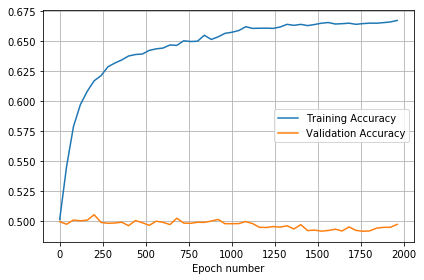

[[5148 5163]
 [4850 4839]]

Validation Avg: [ 0.49935]
Train Avg: [ 0.6662875]


[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]    [1]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]

Epoch 26/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - acc: 0.5221 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_acc: 0.4941
Epoch 27/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6913 - binary_crossentropy: 0.6913 - acc: 0.5250 - val_loss: 0.6977 - val_binary_crossentropy: 0.6977 - val_acc: 0.4953
Epoch 28/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6915 - binary_crossentropy: 0.6915 - acc: 0.5233 - val_loss: 0.6965 - val_binary_crossentropy: 0.6965 - val_acc: 0.4914
Epoch 29/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - acc: 0.5237 - val_loss: 0.6968 - val_binary_crossentropy: 0.6968 - val_acc: 0.4921
Epoch 30/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6910 - binary_crossentropy: 0.6910 - acc: 0.5254 - val_loss: 0.6958 - val_binary_crossentropy: 0.695

80000/80000 [==============================] - 2s 21us/step - loss: 0.6669 - binary_crossentropy: 0.6669 - acc: 0.5916 - val_loss: 0.7242 - val_binary_crossentropy: 0.7242 - val_acc: 0.5017
Epoch 107/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6662 - binary_crossentropy: 0.6662 - acc: 0.5927 - val_loss: 0.7234 - val_binary_crossentropy: 0.7234 - val_acc: 0.4983
Epoch 108/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6662 - binary_crossentropy: 0.6662 - acc: 0.5934 - val_loss: 0.7276 - val_binary_crossentropy: 0.7276 - val_acc: 0.4981
Epoch 109/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6663 - binary_crossentropy: 0.6663 - acc: 0.5923 - val_loss: 0.7272 - val_binary_crossentropy: 0.7272 - val_acc: 0.4946
Epoch 110/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - acc: 0.5919 - val_loss: 0.7249 - val_binary_crossentropy: 0.7249 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6559 - binary_crossentropy: 0.6559 - acc: 0.6091 - val_loss: 0.7347 - val_binary_crossentropy: 0.7347 - val_acc: 0.5024
Epoch 147/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6553 - binary_crossentropy: 0.6553 - acc: 0.6097 - val_loss: 0.7339 - val_binary_crossentropy: 0.7339 - val_acc: 0.5021
Epoch 148/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6554 - binary_crossentropy: 0.6554 - acc: 0.6111 - val_loss: 0.7359 - val_binary_crossentropy: 0.7359 - val_acc: 0.5054
Epoch 149/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6548 - binary_crossentropy: 0.6548 - acc: 0.6116 - val_loss: 0.7383 - val_binary_crossentropy: 0.7383 - val_acc: 0.5014
Epoch 150/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6549 - binary_crossentropy: 0.6549 - acc: 0.6113 - val_loss: 0.7359 - val_binary_crossentropy: 0.7359 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6467 - binary_crossentropy: 0.6467 - acc: 0.6217 - val_loss: 0.7451 - val_binary_crossentropy: 0.7451 - val_acc: 0.5016
Epoch 187/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6465 - binary_crossentropy: 0.6465 - acc: 0.6217 - val_loss: 0.7482 - val_binary_crossentropy: 0.7482 - val_acc: 0.5024
Epoch 188/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6465 - binary_crossentropy: 0.6465 - acc: 0.6211 - val_loss: 0.7464 - val_binary_crossentropy: 0.7464 - val_acc: 0.5007
Epoch 189/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6457 - binary_crossentropy: 0.6457 - acc: 0.6220 - val_loss: 0.7460 - val_binary_crossentropy: 0.7460 - val_acc: 0.5025
Epoch 190/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6464 - binary_crossentropy: 0.6464 - acc: 0.6246 - val_loss: 0.7522 - val_binary_crossentropy: 0.7522 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6392 - binary_crossentropy: 0.6392 - acc: 0.6307 - val_loss: 0.7549 - val_binary_crossentropy: 0.7549 - val_acc: 0.5029
Epoch 227/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6393 - binary_crossentropy: 0.6393 - acc: 0.6306 - val_loss: 0.7634 - val_binary_crossentropy: 0.7634 - val_acc: 0.5048
Epoch 228/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6392 - binary_crossentropy: 0.6392 - acc: 0.6307 - val_loss: 0.7535 - val_binary_crossentropy: 0.7535 - val_acc: 0.5071
Epoch 229/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6393 - binary_crossentropy: 0.6393 - acc: 0.6314 - val_loss: 0.7573 - val_binary_crossentropy: 0.7573 - val_acc: 0.5064
Epoch 230/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6388 - binary_crossentropy: 0.6388 - acc: 0.6333 - val_loss: 0.7555 - val_binary_crossentropy: 0.7555 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6338 - binary_crossentropy: 0.6338 - acc: 0.6375 - val_loss: 0.7601 - val_binary_crossentropy: 0.7601 - val_acc: 0.5023
Epoch 267/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6332 - binary_crossentropy: 0.6332 - acc: 0.6397 - val_loss: 0.7602 - val_binary_crossentropy: 0.7602 - val_acc: 0.5016
Epoch 268/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6332 - binary_crossentropy: 0.6332 - acc: 0.6381 - val_loss: 0.7629 - val_binary_crossentropy: 0.7629 - val_acc: 0.5052
Epoch 269/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6330 - binary_crossentropy: 0.6330 - acc: 0.6382 - val_loss: 0.7642 - val_binary_crossentropy: 0.7642 - val_acc: 0.4993
Epoch 270/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6330 - binary_crossentropy: 0.6330 - acc: 0.6385 - val_loss: 0.7672 - val_binary_crossentropy: 0.7672 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6291 - binary_crossentropy: 0.6291 - acc: 0.6433 - val_loss: 0.7690 - val_binary_crossentropy: 0.7690 - val_acc: 0.5056
Epoch 307/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6285 - binary_crossentropy: 0.6285 - acc: 0.6433 - val_loss: 0.7717 - val_binary_crossentropy: 0.7717 - val_acc: 0.5021
Epoch 308/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6289 - binary_crossentropy: 0.6289 - acc: 0.6433 - val_loss: 0.7688 - val_binary_crossentropy: 0.7688 - val_acc: 0.5049
Epoch 309/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6285 - binary_crossentropy: 0.6285 - acc: 0.6443 - val_loss: 0.7694 - val_binary_crossentropy: 0.7694 - val_acc: 0.5045
Epoch 310/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6286 - binary_crossentropy: 0.6286 - acc: 0.6418 - val_loss: 0.7696 - val_binary_crossentropy: 0.7696 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6254 - binary_crossentropy: 0.6254 - acc: 0.6478 - val_loss: 0.7771 - val_binary_crossentropy: 0.7771 - val_acc: 0.5038
Epoch 347/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6259 - binary_crossentropy: 0.6259 - acc: 0.6453 - val_loss: 0.7681 - val_binary_crossentropy: 0.7681 - val_acc: 0.5053
Epoch 348/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6251 - binary_crossentropy: 0.6251 - acc: 0.6472 - val_loss: 0.7756 - val_binary_crossentropy: 0.7756 - val_acc: 0.5052
Epoch 349/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6256 - binary_crossentropy: 0.6256 - acc: 0.6462 - val_loss: 0.7754 - val_binary_crossentropy: 0.7754 - val_acc: 0.5059
Epoch 350/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6246 - binary_crossentropy: 0.6246 - acc: 0.6482 - val_loss: 0.7747 - val_binary_crossentropy: 0.7747 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6223 - binary_crossentropy: 0.6223 - acc: 0.6492 - val_loss: 0.7776 - val_binary_crossentropy: 0.7776 - val_acc: 0.5053
Epoch 387/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6222 - binary_crossentropy: 0.6222 - acc: 0.6503 - val_loss: 0.7764 - val_binary_crossentropy: 0.7764 - val_acc: 0.5055
Epoch 388/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6225 - binary_crossentropy: 0.6225 - acc: 0.6492 - val_loss: 0.7802 - val_binary_crossentropy: 0.7802 - val_acc: 0.5058
Epoch 389/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6227 - binary_crossentropy: 0.6227 - acc: 0.6509 - val_loss: 0.7763 - val_binary_crossentropy: 0.7763 - val_acc: 0.5058
Epoch 390/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.6222 - binary_crossentropy: 0.6222 - acc: 0.6500 - val_loss: 0.7738 - val_binary_crossentropy: 0.7738 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6210 - binary_crossentropy: 0.6210 - acc: 0.6519 - val_loss: 0.7798 - val_binary_crossentropy: 0.7798 - val_acc: 0.5048
Epoch 427/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6202 - binary_crossentropy: 0.6202 - acc: 0.6521 - val_loss: 0.7787 - val_binary_crossentropy: 0.7787 - val_acc: 0.5043
Epoch 428/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6210 - binary_crossentropy: 0.6210 - acc: 0.6522 - val_loss: 0.7795 - val_binary_crossentropy: 0.7795 - val_acc: 0.5081
Epoch 429/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6202 - binary_crossentropy: 0.6202 - acc: 0.6504 - val_loss: 0.7792 - val_binary_crossentropy: 0.7792 - val_acc: 0.5064
Epoch 430/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6207 - binary_crossentropy: 0.6207 - acc: 0.6525 - val_loss: 0.7810 - val_binary_crossentropy: 0.7810 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6195 - binary_crossentropy: 0.6195 - acc: 0.6534 - val_loss: 0.7831 - val_binary_crossentropy: 0.7831 - val_acc: 0.5075
Epoch 467/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6188 - binary_crossentropy: 0.6188 - acc: 0.6551 - val_loss: 0.7838 - val_binary_crossentropy: 0.7838 - val_acc: 0.5040
Epoch 468/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6189 - binary_crossentropy: 0.6189 - acc: 0.6528 - val_loss: 0.7823 - val_binary_crossentropy: 0.7823 - val_acc: 0.5015
Epoch 469/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6182 - binary_crossentropy: 0.6182 - acc: 0.6562 - val_loss: 0.7805 - val_binary_crossentropy: 0.7805 - val_acc: 0.5045
Epoch 470/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6183 - binary_crossentropy: 0.6183 - acc: 0.6565 - val_loss: 0.7840 - val_binary_crossentropy: 0.7840 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6168 - binary_crossentropy: 0.6168 - acc: 0.6575 - val_loss: 0.7856 - val_binary_crossentropy: 0.7856 - val_acc: 0.5071
Epoch 507/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6170 - binary_crossentropy: 0.6170 - acc: 0.6563 - val_loss: 0.7851 - val_binary_crossentropy: 0.7851 - val_acc: 0.5049
Epoch 508/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6172 - binary_crossentropy: 0.6172 - acc: 0.6560 - val_loss: 0.7907 - val_binary_crossentropy: 0.7907 - val_acc: 0.5036
Epoch 509/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6168 - binary_crossentropy: 0.6168 - acc: 0.6562 - val_loss: 0.7936 - val_binary_crossentropy: 0.7936 - val_acc: 0.5031
Epoch 510/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6167 - binary_crossentropy: 0.6167 - acc: 0.6565 - val_loss: 0.7866 - val_binary_crossentropy: 0.7866 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6152 - binary_crossentropy: 0.6152 - acc: 0.6571 - val_loss: 0.7914 - val_binary_crossentropy: 0.7914 - val_acc: 0.5009
Epoch 547/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6156 - binary_crossentropy: 0.6156 - acc: 0.6594 - val_loss: 0.7965 - val_binary_crossentropy: 0.7965 - val_acc: 0.5056
Epoch 548/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6156 - binary_crossentropy: 0.6156 - acc: 0.6583 - val_loss: 0.7903 - val_binary_crossentropy: 0.7903 - val_acc: 0.5008
Epoch 549/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6156 - binary_crossentropy: 0.6156 - acc: 0.6568 - val_loss: 0.7940 - val_binary_crossentropy: 0.7940 - val_acc: 0.5040
Epoch 550/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6156 - binary_crossentropy: 0.6156 - acc: 0.6572 - val_loss: 0.7909 - val_binary_crossentropy: 0.7909 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6147 - binary_crossentropy: 0.6147 - acc: 0.6596 - val_loss: 0.7946 - val_binary_crossentropy: 0.7946 - val_acc: 0.4985
Epoch 587/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6141 - binary_crossentropy: 0.6141 - acc: 0.6600 - val_loss: 0.7934 - val_binary_crossentropy: 0.7934 - val_acc: 0.4998
Epoch 588/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6141 - binary_crossentropy: 0.6141 - acc: 0.6602 - val_loss: 0.8034 - val_binary_crossentropy: 0.8034 - val_acc: 0.5002
Epoch 589/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6144 - binary_crossentropy: 0.6144 - acc: 0.6604 - val_loss: 0.7996 - val_binary_crossentropy: 0.7996 - val_acc: 0.4978
Epoch 590/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6141 - binary_crossentropy: 0.6141 - acc: 0.6594 - val_loss: 0.7958 - val_binary_crossentropy: 0.7958 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6135 - binary_crossentropy: 0.6135 - acc: 0.6598 - val_loss: 0.7975 - val_binary_crossentropy: 0.7975 - val_acc: 0.4989
Epoch 627/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6133 - binary_crossentropy: 0.6133 - acc: 0.6600 - val_loss: 0.7964 - val_binary_crossentropy: 0.7964 - val_acc: 0.4990
Epoch 628/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6127 - binary_crossentropy: 0.6127 - acc: 0.6600 - val_loss: 0.7951 - val_binary_crossentropy: 0.7951 - val_acc: 0.5017
Epoch 629/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6129 - binary_crossentropy: 0.6129 - acc: 0.6615 - val_loss: 0.7933 - val_binary_crossentropy: 0.7933 - val_acc: 0.5007
Epoch 630/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6128 - binary_crossentropy: 0.6128 - acc: 0.6614 - val_loss: 0.7968 - val_binary_crossentropy: 0.7968 - val_ac

80000/80000 [==============================] - 2s 21us/step - loss: 0.6112 - binary_crossentropy: 0.6112 - acc: 0.6619 - val_loss: 0.8013 - val_binary_crossentropy: 0.8013 - val_acc: 0.5025
Epoch 706/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6110 - binary_crossentropy: 0.6110 - acc: 0.6639 - val_loss: 0.8019 - val_binary_crossentropy: 0.8019 - val_acc: 0.5014
Epoch 707/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6108 - binary_crossentropy: 0.6108 - acc: 0.6640 - val_loss: 0.7987 - val_binary_crossentropy: 0.7987 - val_acc: 0.5039
Epoch 708/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6112 - binary_crossentropy: 0.6112 - acc: 0.6621 - val_loss: 0.8006 - val_binary_crossentropy: 0.8006 - val_acc: 0.4998
Epoch 709/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6113 - binary_crossentropy: 0.6113 - acc: 0.6637 - val_loss: 0.7970 - val_binary_crossentropy: 0.7970 - val_ac

Epoch 745/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6648 - val_loss: 0.8083 - val_binary_crossentropy: 0.8083 - val_acc: 0.5014
Epoch 746/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6097 - binary_crossentropy: 0.6097 - acc: 0.6646 - val_loss: 0.8051 - val_binary_crossentropy: 0.8051 - val_acc: 0.5009
Epoch 747/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6101 - binary_crossentropy: 0.6101 - acc: 0.6645 - val_loss: 0.8047 - val_binary_crossentropy: 0.8047 - val_acc: 0.5000
Epoch 748/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6647 - val_loss: 0.8045 - val_binary_crossentropy: 0.8045 - val_acc: 0.5021
Epoch 749/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6099 - binary_crossentropy: 0.6099 - acc: 0.6654 - val_loss: 0.8038 - val_binary_crossentropy: 

Epoch 785/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6643 - val_loss: 0.8062 - val_binary_crossentropy: 0.8062 - val_acc: 0.5007
Epoch 786/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6091 - binary_crossentropy: 0.6091 - acc: 0.6672 - val_loss: 0.8067 - val_binary_crossentropy: 0.8067 - val_acc: 0.5014
Epoch 787/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6095 - binary_crossentropy: 0.6095 - acc: 0.6648 - val_loss: 0.8050 - val_binary_crossentropy: 0.8050 - val_acc: 0.4999
Epoch 788/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6096 - binary_crossentropy: 0.6096 - acc: 0.6652 - val_loss: 0.8086 - val_binary_crossentropy: 0.8086 - val_acc: 0.5032
Epoch 789/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6093 - binary_crossentropy: 0.6093 - acc: 0.6639 - val_loss: 0.8073 - val_binary_crossentropy: 

Epoch 825/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6092 - binary_crossentropy: 0.6092 - acc: 0.6658 - val_loss: 0.8020 - val_binary_crossentropy: 0.8020 - val_acc: 0.5024
Epoch 826/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6085 - binary_crossentropy: 0.6085 - acc: 0.6654 - val_loss: 0.8125 - val_binary_crossentropy: 0.8125 - val_acc: 0.5025
Epoch 827/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6084 - binary_crossentropy: 0.6084 - acc: 0.6657 - val_loss: 0.8043 - val_binary_crossentropy: 0.8043 - val_acc: 0.5032
Epoch 828/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6084 - binary_crossentropy: 0.6084 - acc: 0.6662 - val_loss: 0.8082 - val_binary_crossentropy: 0.8082 - val_acc: 0.4995
Epoch 829/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6090 - binary_crossentropy: 0.6090 - acc: 0.6647 - val_loss: 0.8041 - val_binary_crossentropy: 

Epoch 865/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6076 - binary_crossentropy: 0.6076 - acc: 0.6652 - val_loss: 0.8095 - val_binary_crossentropy: 0.8095 - val_acc: 0.5030
Epoch 866/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6084 - binary_crossentropy: 0.6084 - acc: 0.6669 - val_loss: 0.8048 - val_binary_crossentropy: 0.8048 - val_acc: 0.5051
Epoch 867/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6085 - binary_crossentropy: 0.6085 - acc: 0.6647 - val_loss: 0.8092 - val_binary_crossentropy: 0.8092 - val_acc: 0.5032
Epoch 868/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6080 - binary_crossentropy: 0.6080 - acc: 0.6663 - val_loss: 0.8067 - val_binary_crossentropy: 0.8067 - val_acc: 0.5040
Epoch 869/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6086 - binary_crossentropy: 0.6086 - acc: 0.6670 - val_loss: 0.8039 - val_binary_crossentropy: 

Epoch 905/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6080 - binary_crossentropy: 0.6080 - acc: 0.6657 - val_loss: 0.8084 - val_binary_crossentropy: 0.8084 - val_acc: 0.5053
Epoch 906/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6074 - binary_crossentropy: 0.6074 - acc: 0.6664 - val_loss: 0.8079 - val_binary_crossentropy: 0.8079 - val_acc: 0.5009
Epoch 907/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6079 - binary_crossentropy: 0.6079 - acc: 0.6666 - val_loss: 0.8058 - val_binary_crossentropy: 0.8058 - val_acc: 0.5022
Epoch 908/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6076 - binary_crossentropy: 0.6076 - acc: 0.6660 - val_loss: 0.8140 - val_binary_crossentropy: 0.8140 - val_acc: 0.5037
Epoch 909/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6078 - binary_crossentropy: 0.6078 - acc: 0.6664 - val_loss: 0.8122 - val_binary_crossentropy: 

Epoch 945/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6072 - binary_crossentropy: 0.6072 - acc: 0.6671 - val_loss: 0.8100 - val_binary_crossentropy: 0.8100 - val_acc: 0.5035
Epoch 946/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6072 - binary_crossentropy: 0.6072 - acc: 0.6666 - val_loss: 0.8054 - val_binary_crossentropy: 0.8054 - val_acc: 0.5022
Epoch 947/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6068 - binary_crossentropy: 0.6068 - acc: 0.6666 - val_loss: 0.8103 - val_binary_crossentropy: 0.8103 - val_acc: 0.5039
Epoch 948/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6077 - binary_crossentropy: 0.6077 - acc: 0.6659 - val_loss: 0.8075 - val_binary_crossentropy: 0.8075 - val_acc: 0.4997
Epoch 949/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6072 - binary_crossentropy: 0.6072 - acc: 0.6658 - val_loss: 0.8173 - val_binary_crossentropy: 

Epoch 985/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6061 - binary_crossentropy: 0.6061 - acc: 0.6670 - val_loss: 0.8055 - val_binary_crossentropy: 0.8055 - val_acc: 0.5037
Epoch 986/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6073 - binary_crossentropy: 0.6073 - acc: 0.6664 - val_loss: 0.8133 - val_binary_crossentropy: 0.8133 - val_acc: 0.5019
Epoch 987/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.6686 - val_loss: 0.8086 - val_binary_crossentropy: 0.8086 - val_acc: 0.5021
Epoch 988/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6071 - binary_crossentropy: 0.6071 - acc: 0.6678 - val_loss: 0.8045 - val_binary_crossentropy: 0.8045 - val_acc: 0.5062
Epoch 989/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.6679 - val_loss: 0.8093 - val_binary_crossentropy: 

Epoch 1025/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6061 - binary_crossentropy: 0.6061 - acc: 0.6681 - val_loss: 0.8079 - val_binary_crossentropy: 0.8079 - val_acc: 0.5031
Epoch 1026/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6066 - binary_crossentropy: 0.6066 - acc: 0.6670 - val_loss: 0.8112 - val_binary_crossentropy: 0.8112 - val_acc: 0.5040
Epoch 1027/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6059 - binary_crossentropy: 0.6059 - acc: 0.6689 - val_loss: 0.8074 - val_binary_crossentropy: 0.8074 - val_acc: 0.5043
Epoch 1028/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.6657 - val_loss: 0.8072 - val_binary_crossentropy: 0.8072 - val_acc: 0.5002
Epoch 1029/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6063 - binary_crossentropy: 0.6063 - acc: 0.6681 - val_loss: 0.8083 - val_binary_crossentr

Epoch 1065/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6061 - binary_crossentropy: 0.6061 - acc: 0.6672 - val_loss: 0.8122 - val_binary_crossentropy: 0.8122 - val_acc: 0.5029
Epoch 1066/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6062 - binary_crossentropy: 0.6062 - acc: 0.6688 - val_loss: 0.8188 - val_binary_crossentropy: 0.8188 - val_acc: 0.5052
Epoch 1067/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6058 - binary_crossentropy: 0.6058 - acc: 0.6675 - val_loss: 0.8129 - val_binary_crossentropy: 0.8129 - val_acc: 0.5003
Epoch 1068/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6058 - binary_crossentropy: 0.6058 - acc: 0.6677 - val_loss: 0.8114 - val_binary_crossentropy: 0.8114 - val_acc: 0.4990
Epoch 1069/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6063 - binary_crossentropy: 0.6063 - acc: 0.6692 - val_loss: 0.8087 - val_binary_crossentr

Epoch 1105/3000
80000/80000 [==============================] - 2s 24us/step - loss: 0.6054 - binary_crossentropy: 0.6054 - acc: 0.6669 - val_loss: 0.8077 - val_binary_crossentropy: 0.8077 - val_acc: 0.4997
Epoch 1106/3000
80000/80000 [==============================] - 2s 24us/step - loss: 0.6063 - binary_crossentropy: 0.6063 - acc: 0.6668 - val_loss: 0.8104 - val_binary_crossentropy: 0.8104 - val_acc: 0.5026
Epoch 1107/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6057 - binary_crossentropy: 0.6057 - acc: 0.6681 - val_loss: 0.8185 - val_binary_crossentropy: 0.8185 - val_acc: 0.5013
Epoch 1108/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6058 - binary_crossentropy: 0.6058 - acc: 0.6676 - val_loss: 0.8089 - val_binary_crossentropy: 0.8089 - val_acc: 0.5041
Epoch 1109/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6055 - binary_crossentropy: 0.6055 - acc: 0.6675 - val_loss: 0.8115 - val_binary_crossentr

Epoch 1145/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6052 - binary_crossentropy: 0.6052 - acc: 0.6682 - val_loss: 0.8168 - val_binary_crossentropy: 0.8168 - val_acc: 0.5058
Epoch 1146/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6054 - binary_crossentropy: 0.6054 - acc: 0.6679 - val_loss: 0.8092 - val_binary_crossentropy: 0.8092 - val_acc: 0.5041
Epoch 1147/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6047 - binary_crossentropy: 0.6047 - acc: 0.6684 - val_loss: 0.8152 - val_binary_crossentropy: 0.8152 - val_acc: 0.5042
Epoch 1148/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6051 - binary_crossentropy: 0.6051 - acc: 0.6687 - val_loss: 0.8102 - val_binary_crossentropy: 0.8102 - val_acc: 0.5061
Epoch 1149/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6051 - binary_crossentropy: 0.6051 - acc: 0.6687 - val_loss: 0.8105 - val_binary_crossentr

Epoch 1185/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6049 - binary_crossentropy: 0.6049 - acc: 0.6683 - val_loss: 0.8111 - val_binary_crossentropy: 0.8111 - val_acc: 0.5020
Epoch 1186/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6045 - binary_crossentropy: 0.6045 - acc: 0.6697 - val_loss: 0.8160 - val_binary_crossentropy: 0.8160 - val_acc: 0.5048
Epoch 1187/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6052 - binary_crossentropy: 0.6052 - acc: 0.6685 - val_loss: 0.8146 - val_binary_crossentropy: 0.8146 - val_acc: 0.5051
Epoch 1188/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6049 - binary_crossentropy: 0.6049 - acc: 0.6695 - val_loss: 0.8115 - val_binary_crossentropy: 0.8115 - val_acc: 0.5029
Epoch 1189/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6047 - binary_crossentropy: 0.6047 - acc: 0.6686 - val_loss: 0.8138 - val_binary_crossentr

Epoch 1225/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6044 - binary_crossentropy: 0.6044 - acc: 0.6701 - val_loss: 0.8121 - val_binary_crossentropy: 0.8121 - val_acc: 0.5011
Epoch 1226/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6041 - binary_crossentropy: 0.6041 - acc: 0.6710 - val_loss: 0.8151 - val_binary_crossentropy: 0.8151 - val_acc: 0.5045
Epoch 1227/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6049 - binary_crossentropy: 0.6049 - acc: 0.6688 - val_loss: 0.8121 - val_binary_crossentropy: 0.8121 - val_acc: 0.5032
Epoch 1228/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6045 - binary_crossentropy: 0.6045 - acc: 0.6706 - val_loss: 0.8116 - val_binary_crossentropy: 0.8116 - val_acc: 0.5046
Epoch 1229/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6045 - binary_crossentropy: 0.6045 - acc: 0.6705 - val_loss: 0.8146 - val_binary_crossentr

Epoch 1265/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6039 - binary_crossentropy: 0.6039 - acc: 0.6667 - val_loss: 0.8166 - val_binary_crossentropy: 0.8166 - val_acc: 0.5038
Epoch 1266/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6045 - binary_crossentropy: 0.6045 - acc: 0.6686 - val_loss: 0.8110 - val_binary_crossentropy: 0.8110 - val_acc: 0.5047
Epoch 1267/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6038 - binary_crossentropy: 0.6038 - acc: 0.6694 - val_loss: 0.8154 - val_binary_crossentropy: 0.8154 - val_acc: 0.5030
Epoch 1268/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6041 - binary_crossentropy: 0.6041 - acc: 0.6691 - val_loss: 0.8179 - val_binary_crossentropy: 0.8179 - val_acc: 0.5025
Epoch 1269/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6037 - binary_crossentropy: 0.6037 - acc: 0.6707 - val_loss: 0.8151 - val_binary_crossentr

Epoch 1305/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6032 - binary_crossentropy: 0.6032 - acc: 0.6715 - val_loss: 0.8116 - val_binary_crossentropy: 0.8116 - val_acc: 0.5039
Epoch 1306/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6036 - binary_crossentropy: 0.6036 - acc: 0.6711 - val_loss: 0.8108 - val_binary_crossentropy: 0.8108 - val_acc: 0.5050
Epoch 1307/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6048 - binary_crossentropy: 0.6048 - acc: 0.6686 - val_loss: 0.8211 - val_binary_crossentropy: 0.8211 - val_acc: 0.5031
Epoch 1308/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6040 - binary_crossentropy: 0.6040 - acc: 0.6691 - val_loss: 0.8151 - val_binary_crossentropy: 0.8151 - val_acc: 0.5016
Epoch 1309/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6039 - binary_crossentropy: 0.6039 - acc: 0.6711 - val_loss: 0.8135 - val_binary_crossentr

Epoch 1345/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6037 - binary_crossentropy: 0.6037 - acc: 0.6710 - val_loss: 0.8165 - val_binary_crossentropy: 0.8165 - val_acc: 0.5045
Epoch 1346/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6036 - binary_crossentropy: 0.6036 - acc: 0.6709 - val_loss: 0.8136 - val_binary_crossentropy: 0.8136 - val_acc: 0.5092
Epoch 1347/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6035 - binary_crossentropy: 0.6035 - acc: 0.6701 - val_loss: 0.8115 - val_binary_crossentropy: 0.8115 - val_acc: 0.5064
Epoch 1348/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6041 - binary_crossentropy: 0.6041 - acc: 0.6713 - val_loss: 0.8127 - val_binary_crossentropy: 0.8127 - val_acc: 0.5069
Epoch 1349/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6033 - binary_crossentropy: 0.6033 - acc: 0.6710 - val_loss: 0.8114 - val_binary_crossentr

Epoch 1385/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6037 - binary_crossentropy: 0.6037 - acc: 0.6689 - val_loss: 0.8136 - val_binary_crossentropy: 0.8136 - val_acc: 0.5029
Epoch 1386/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6029 - binary_crossentropy: 0.6029 - acc: 0.6704 - val_loss: 0.8229 - val_binary_crossentropy: 0.8229 - val_acc: 0.5045
Epoch 1387/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6030 - binary_crossentropy: 0.6030 - acc: 0.6704 - val_loss: 0.8163 - val_binary_crossentropy: 0.8163 - val_acc: 0.5045
Epoch 1388/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6032 - binary_crossentropy: 0.6032 - acc: 0.6711 - val_loss: 0.8154 - val_binary_crossentropy: 0.8154 - val_acc: 0.5059
Epoch 1389/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6038 - binary_crossentropy: 0.6038 - acc: 0.6698 - val_loss: 0.8200 - val_binary_crossentr

Epoch 1425/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6031 - binary_crossentropy: 0.6031 - acc: 0.6707 - val_loss: 0.8144 - val_binary_crossentropy: 0.8144 - val_acc: 0.5068
Epoch 1426/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6032 - binary_crossentropy: 0.6032 - acc: 0.6702 - val_loss: 0.8143 - val_binary_crossentropy: 0.8143 - val_acc: 0.5019
Epoch 1427/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6031 - binary_crossentropy: 0.6031 - acc: 0.6710 - val_loss: 0.8174 - val_binary_crossentropy: 0.8174 - val_acc: 0.5055
Epoch 1428/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6028 - binary_crossentropy: 0.6028 - acc: 0.6702 - val_loss: 0.8201 - val_binary_crossentropy: 0.8201 - val_acc: 0.5060
Epoch 1429/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6032 - binary_crossentropy: 0.6032 - acc: 0.6707 - val_loss: 0.8167 - val_binary_crossentr

80000/80000 [==============================] - 2s 21us/step - loss: 0.6031 - binary_crossentropy: 0.6031 - acc: 0.6722 - val_loss: 0.8121 - val_binary_crossentropy: 0.8121 - val_acc: 0.5074
Epoch 1504/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6024 - binary_crossentropy: 0.6024 - acc: 0.6706 - val_loss: 0.8147 - val_binary_crossentropy: 0.8147 - val_acc: 0.5033
Epoch 1505/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6025 - binary_crossentropy: 0.6025 - acc: 0.6699 - val_loss: 0.8273 - val_binary_crossentropy: 0.8273 - val_acc: 0.5080
Epoch 1506/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6028 - binary_crossentropy: 0.6028 - acc: 0.6717 - val_loss: 0.8258 - val_binary_crossentropy: 0.8258 - val_acc: 0.5039
Epoch 1507/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6031 - binary_crossentropy: 0.6031 - acc: 0.6703 - val_loss: 0.8175 - val_binary_crossentropy: 0.8175 - va

Epoch 1582/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6027 - binary_crossentropy: 0.6027 - acc: 0.6701 - val_loss: 0.8161 - val_binary_crossentropy: 0.8161 - val_acc: 0.5048
Epoch 1583/3000
80000/80000 [==============================] - 2s 24us/step - loss: 0.6022 - binary_crossentropy: 0.6022 - acc: 0.6716 - val_loss: 0.8367 - val_binary_crossentropy: 0.8367 - val_acc: 0.5037
Epoch 1584/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6018 - binary_crossentropy: 0.6018 - acc: 0.6712 - val_loss: 0.8190 - val_binary_crossentropy: 0.8190 - val_acc: 0.5069
Epoch 1585/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6025 - binary_crossentropy: 0.6025 - acc: 0.6701 - val_loss: 0.8134 - val_binary_crossentropy: 0.8134 - val_acc: 0.5009
Epoch 1586/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6022 - binary_crossentropy: 0.6022 - acc: 0.6704 - val_loss: 0.8152 - val_binary_crossentr

Epoch 1622/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6021 - binary_crossentropy: 0.6021 - acc: 0.6704 - val_loss: 0.8128 - val_binary_crossentropy: 0.8128 - val_acc: 0.5034
Epoch 1623/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6023 - binary_crossentropy: 0.6023 - acc: 0.6706 - val_loss: 0.8179 - val_binary_crossentropy: 0.8179 - val_acc: 0.4994
Epoch 1624/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6025 - binary_crossentropy: 0.6025 - acc: 0.6726 - val_loss: 0.8191 - val_binary_crossentropy: 0.8191 - val_acc: 0.5021
Epoch 1625/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6019 - binary_crossentropy: 0.6019 - acc: 0.6717 - val_loss: 0.8153 - val_binary_crossentropy: 0.8153 - val_acc: 0.5039
Epoch 1626/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6022 - binary_crossentropy: 0.6022 - acc: 0.6722 - val_loss: 0.8195 - val_binary_crossentr

Epoch 1701/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6016 - binary_crossentropy: 0.6016 - acc: 0.6729 - val_loss: 0.8267 - val_binary_crossentropy: 0.8267 - val_acc: 0.5069
Epoch 1702/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6017 - binary_crossentropy: 0.6017 - acc: 0.6729 - val_loss: 0.8147 - val_binary_crossentropy: 0.8147 - val_acc: 0.5064
Epoch 1703/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6017 - binary_crossentropy: 0.6017 - acc: 0.6722 - val_loss: 0.8152 - val_binary_crossentropy: 0.8152 - val_acc: 0.5017
Epoch 1704/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6017 - binary_crossentropy: 0.6017 - acc: 0.6733 - val_loss: 0.8156 - val_binary_crossentropy: 0.8156 - val_acc: 0.4998
Epoch 1705/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6019 - binary_crossentropy: 0.6019 - acc: 0.6718 - val_loss: 0.8183 - val_binary_crossentr

Epoch 1741/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6010 - binary_crossentropy: 0.6010 - acc: 0.6725 - val_loss: 0.8221 - val_binary_crossentropy: 0.8221 - val_acc: 0.5006
Epoch 1742/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6013 - binary_crossentropy: 0.6013 - acc: 0.6722 - val_loss: 0.8261 - val_binary_crossentropy: 0.8261 - val_acc: 0.5050
Epoch 1743/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6011 - binary_crossentropy: 0.6011 - acc: 0.6715 - val_loss: 0.8176 - val_binary_crossentropy: 0.8176 - val_acc: 0.5052
Epoch 1744/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6014 - binary_crossentropy: 0.6014 - acc: 0.6731 - val_loss: 0.8283 - val_binary_crossentropy: 0.8283 - val_acc: 0.5052
Epoch 1745/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6014 - binary_crossentropy: 0.6014 - acc: 0.6712 - val_loss: 0.8199 - val_binary_crossentr

Epoch 1781/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6012 - binary_crossentropy: 0.6012 - acc: 0.6708 - val_loss: 0.8282 - val_binary_crossentropy: 0.8282 - val_acc: 0.5011
Epoch 1782/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6007 - binary_crossentropy: 0.6007 - acc: 0.6715 - val_loss: 0.8224 - val_binary_crossentropy: 0.8224 - val_acc: 0.5065
Epoch 1783/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6012 - binary_crossentropy: 0.6012 - acc: 0.6718 - val_loss: 0.8178 - val_binary_crossentropy: 0.8178 - val_acc: 0.5031
Epoch 1784/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6013 - binary_crossentropy: 0.6013 - acc: 0.6721 - val_loss: 0.8204 - val_binary_crossentropy: 0.8204 - val_acc: 0.5027
Epoch 1785/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6009 - binary_crossentropy: 0.6009 - acc: 0.6725 - val_loss: 0.8221 - val_binary_crossentr

Epoch 1821/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.6739 - val_loss: 0.8274 - val_binary_crossentropy: 0.8274 - val_acc: 0.5020
Epoch 1822/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.6733 - val_loss: 0.8243 - val_binary_crossentropy: 0.8243 - val_acc: 0.5031
Epoch 1823/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6010 - binary_crossentropy: 0.6010 - acc: 0.6709 - val_loss: 0.8197 - val_binary_crossentropy: 0.8197 - val_acc: 0.5045
Epoch 1824/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6013 - binary_crossentropy: 0.6013 - acc: 0.6707 - val_loss: 0.8228 - val_binary_crossentropy: 0.8228 - val_acc: 0.5054
Epoch 1825/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6009 - binary_crossentropy: 0.6009 - acc: 0.6729 - val_loss: 0.8210 - val_binary_crossentr

Epoch 1861/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6011 - binary_crossentropy: 0.6011 - acc: 0.6721 - val_loss: 0.8162 - val_binary_crossentropy: 0.8162 - val_acc: 0.5011
Epoch 1862/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6003 - binary_crossentropy: 0.6003 - acc: 0.6724 - val_loss: 0.8256 - val_binary_crossentropy: 0.8256 - val_acc: 0.4990
Epoch 1863/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6009 - binary_crossentropy: 0.6009 - acc: 0.6719 - val_loss: 0.8269 - val_binary_crossentropy: 0.8269 - val_acc: 0.5025
Epoch 1864/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.6715 - val_loss: 0.8178 - val_binary_crossentropy: 0.8178 - val_acc: 0.5054
Epoch 1865/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6007 - binary_crossentropy: 0.6007 - acc: 0.6718 - val_loss: 0.8265 - val_binary_crossentr

Epoch 1940/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6004 - binary_crossentropy: 0.6004 - acc: 0.6719 - val_loss: 0.8218 - val_binary_crossentropy: 0.8218 - val_acc: 0.5066
Epoch 1941/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6723 - val_loss: 0.8193 - val_binary_crossentropy: 0.8193 - val_acc: 0.5039
Epoch 1942/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6001 - binary_crossentropy: 0.6001 - acc: 0.6740 - val_loss: 0.8171 - val_binary_crossentropy: 0.8171 - val_acc: 0.5009
Epoch 1943/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6007 - binary_crossentropy: 0.6007 - acc: 0.6718 - val_loss: 0.8207 - val_binary_crossentropy: 0.8207 - val_acc: 0.5005
Epoch 1944/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6002 - binary_crossentropy: 0.6002 - acc: 0.6735 - val_loss: 0.8243 - val_binary_crossentr

Epoch 1980/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5999 - binary_crossentropy: 0.5999 - acc: 0.6739 - val_loss: 0.8196 - val_binary_crossentropy: 0.8196 - val_acc: 0.5052
Epoch 1981/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6724 - val_loss: 0.8190 - val_binary_crossentropy: 0.8190 - val_acc: 0.5018
Epoch 1982/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6726 - val_loss: 0.8231 - val_binary_crossentropy: 0.8231 - val_acc: 0.5043
Epoch 1983/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5999 - binary_crossentropy: 0.5999 - acc: 0.6723 - val_loss: 0.8172 - val_binary_crossentropy: 0.8172 - val_acc: 0.5050
Epoch 1984/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6004 - binary_crossentropy: 0.6004 - acc: 0.6734 - val_loss: 0.8193 - val_binary_crossentr

Epoch 2020/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5998 - binary_crossentropy: 0.5998 - acc: 0.6732 - val_loss: 0.8232 - val_binary_crossentropy: 0.8232 - val_acc: 0.5046
Epoch 2021/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5998 - binary_crossentropy: 0.5998 - acc: 0.6735 - val_loss: 0.8249 - val_binary_crossentropy: 0.8249 - val_acc: 0.5030
Epoch 2022/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5998 - binary_crossentropy: 0.5998 - acc: 0.6719 - val_loss: 0.8136 - val_binary_crossentropy: 0.8136 - val_acc: 0.5047
Epoch 2023/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5996 - binary_crossentropy: 0.5996 - acc: 0.6732 - val_loss: 0.8166 - val_binary_crossentropy: 0.8166 - val_acc: 0.5082
Epoch 2024/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6002 - binary_crossentropy: 0.6002 - acc: 0.6731 - val_loss: 0.8175 - val_binary_crossentr

Epoch 2060/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5993 - binary_crossentropy: 0.5993 - acc: 0.6733 - val_loss: 0.8182 - val_binary_crossentropy: 0.8182 - val_acc: 0.5044
Epoch 2061/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6000 - binary_crossentropy: 0.6000 - acc: 0.6738 - val_loss: 0.8214 - val_binary_crossentropy: 0.8214 - val_acc: 0.5044
Epoch 2062/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6002 - binary_crossentropy: 0.6002 - acc: 0.6723 - val_loss: 0.8165 - val_binary_crossentropy: 0.8165 - val_acc: 0.5092
Epoch 2063/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.6003 - binary_crossentropy: 0.6003 - acc: 0.6743 - val_loss: 0.8169 - val_binary_crossentropy: 0.8169 - val_acc: 0.5055
Epoch 2064/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5999 - binary_crossentropy: 0.5999 - acc: 0.6722 - val_loss: 0.8329 - val_binary_crossentr

Epoch 2100/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6002 - binary_crossentropy: 0.6002 - acc: 0.6728 - val_loss: 0.8195 - val_binary_crossentropy: 0.8195 - val_acc: 0.5049
Epoch 2101/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5997 - binary_crossentropy: 0.5997 - acc: 0.6733 - val_loss: 0.8187 - val_binary_crossentropy: 0.8187 - val_acc: 0.5035
Epoch 2102/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5995 - binary_crossentropy: 0.5995 - acc: 0.6733 - val_loss: 0.8193 - val_binary_crossentropy: 0.8193 - val_acc: 0.5032
Epoch 2103/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.6000 - binary_crossentropy: 0.6000 - acc: 0.6731 - val_loss: 0.8224 - val_binary_crossentropy: 0.8224 - val_acc: 0.5025
Epoch 2104/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5997 - binary_crossentropy: 0.5997 - acc: 0.6739 - val_loss: 0.8189 - val_binary_crossentr

Epoch 2140/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5997 - binary_crossentropy: 0.5997 - acc: 0.6739 - val_loss: 0.8180 - val_binary_crossentropy: 0.8180 - val_acc: 0.5027
Epoch 2141/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5996 - binary_crossentropy: 0.5996 - acc: 0.6738 - val_loss: 0.8267 - val_binary_crossentropy: 0.8267 - val_acc: 0.5026
Epoch 2142/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5999 - binary_crossentropy: 0.5999 - acc: 0.6748 - val_loss: 0.8281 - val_binary_crossentropy: 0.8281 - val_acc: 0.5056
Epoch 2143/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5998 - binary_crossentropy: 0.5998 - acc: 0.6715 - val_loss: 0.8185 - val_binary_crossentropy: 0.8185 - val_acc: 0.5056
Epoch 2144/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5995 - binary_crossentropy: 0.5995 - acc: 0.6751 - val_loss: 0.8249 - val_binary_crossentr

Epoch 2180/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5998 - binary_crossentropy: 0.5998 - acc: 0.6718 - val_loss: 0.8256 - val_binary_crossentropy: 0.8256 - val_acc: 0.5017
Epoch 2181/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6756 - val_loss: 0.8246 - val_binary_crossentropy: 0.8246 - val_acc: 0.5035
Epoch 2182/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5993 - binary_crossentropy: 0.5993 - acc: 0.6742 - val_loss: 0.8219 - val_binary_crossentropy: 0.8219 - val_acc: 0.5027
Epoch 2183/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6738 - val_loss: 0.8241 - val_binary_crossentropy: 0.8241 - val_acc: 0.5036
Epoch 2184/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5996 - binary_crossentropy: 0.5996 - acc: 0.6726 - val_loss: 0.8186 - val_binary_crossentr

Epoch 2220/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6740 - val_loss: 0.8254 - val_binary_crossentropy: 0.8254 - val_acc: 0.5019
Epoch 2221/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5995 - binary_crossentropy: 0.5995 - acc: 0.6749 - val_loss: 0.8236 - val_binary_crossentropy: 0.8236 - val_acc: 0.5010
Epoch 2222/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5994 - binary_crossentropy: 0.5994 - acc: 0.6745 - val_loss: 0.8225 - val_binary_crossentropy: 0.8225 - val_acc: 0.5053
Epoch 2223/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6740 - val_loss: 0.8195 - val_binary_crossentropy: 0.8195 - val_acc: 0.5034
Epoch 2224/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5995 - binary_crossentropy: 0.5995 - acc: 0.6740 - val_loss: 0.8158 - val_binary_crossentr

Epoch 2260/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5990 - binary_crossentropy: 0.5990 - acc: 0.6741 - val_loss: 0.8258 - val_binary_crossentropy: 0.8258 - val_acc: 0.5062
Epoch 2261/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5992 - binary_crossentropy: 0.5992 - acc: 0.6732 - val_loss: 0.8210 - val_binary_crossentropy: 0.8210 - val_acc: 0.4990
Epoch 2262/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.5994 - binary_crossentropy: 0.5994 - acc: 0.6735 - val_loss: 0.8318 - val_binary_crossentropy: 0.8318 - val_acc: 0.5048
Epoch 2263/3000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5994 - binary_crossentropy: 0.5994 - acc: 0.6721 - val_loss: 0.8234 - val_binary_crossentropy: 0.8234 - val_acc: 0.5031
Epoch 2264/3000
80000/80000 [==============================] - 2s 23us/step - loss: 0.5996 - binary_crossentropy: 0.5996 - acc: 0.6726 - val_loss: 0.8242 - val_binary_crossentr

Epoch 2300/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6744 - val_loss: 0.8238 - val_binary_crossentropy: 0.8238 - val_acc: 0.5061
Epoch 2301/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5990 - binary_crossentropy: 0.5990 - acc: 0.6733 - val_loss: 0.8298 - val_binary_crossentropy: 0.8298 - val_acc: 0.4994
Epoch 2302/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5992 - binary_crossentropy: 0.5992 - acc: 0.6734 - val_loss: 0.8196 - val_binary_crossentropy: 0.8196 - val_acc: 0.5019
Epoch 2303/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5990 - binary_crossentropy: 0.5990 - acc: 0.6755 - val_loss: 0.8259 - val_binary_crossentropy: 0.8259 - val_acc: 0.5043
Epoch 2304/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6744 - val_loss: 0.8167 - val_binary_crossentr

Epoch 2340/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5993 - binary_crossentropy: 0.5993 - acc: 0.6734 - val_loss: 0.8244 - val_binary_crossentropy: 0.8244 - val_acc: 0.5054
Epoch 2341/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5992 - binary_crossentropy: 0.5992 - acc: 0.6733 - val_loss: 0.8311 - val_binary_crossentropy: 0.8311 - val_acc: 0.5064
Epoch 2342/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6730 - val_loss: 0.8261 - val_binary_crossentropy: 0.8261 - val_acc: 0.5030
Epoch 2343/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6742 - val_loss: 0.8233 - val_binary_crossentropy: 0.8233 - val_acc: 0.5042
Epoch 2344/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5984 - binary_crossentropy: 0.5984 - acc: 0.6739 - val_loss: 0.8243 - val_binary_crossentr

Epoch 2380/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6722 - val_loss: 0.8221 - val_binary_crossentropy: 0.8221 - val_acc: 0.5020
Epoch 2381/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6736 - val_loss: 0.8226 - val_binary_crossentropy: 0.8226 - val_acc: 0.5072
Epoch 2382/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5986 - binary_crossentropy: 0.5986 - acc: 0.6752 - val_loss: 0.8260 - val_binary_crossentropy: 0.8260 - val_acc: 0.5057
Epoch 2383/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5993 - binary_crossentropy: 0.5993 - acc: 0.6723 - val_loss: 0.8185 - val_binary_crossentropy: 0.8185 - val_acc: 0.5038
Epoch 2384/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5990 - binary_crossentropy: 0.5990 - acc: 0.6741 - val_loss: 0.8249 - val_binary_crossentr

Epoch 2459/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6741 - val_loss: 0.8223 - val_binary_crossentropy: 0.8223 - val_acc: 0.5071
Epoch 2460/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6756 - val_loss: 0.8224 - val_binary_crossentropy: 0.8224 - val_acc: 0.5035
Epoch 2461/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5986 - binary_crossentropy: 0.5986 - acc: 0.6734 - val_loss: 0.8206 - val_binary_crossentropy: 0.8206 - val_acc: 0.5022
Epoch 2462/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6729 - val_loss: 0.8216 - val_binary_crossentropy: 0.8216 - val_acc: 0.5061
Epoch 2463/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6721 - val_loss: 0.8285 - val_binary_crossentr

Epoch 2499/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6737 - val_loss: 0.8205 - val_binary_crossentropy: 0.8205 - val_acc: 0.5082
Epoch 2500/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6738 - val_loss: 0.8175 - val_binary_crossentropy: 0.8175 - val_acc: 0.5070
Epoch 2501/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6741 - val_loss: 0.8281 - val_binary_crossentropy: 0.8281 - val_acc: 0.5064
Epoch 2502/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6740 - val_loss: 0.8305 - val_binary_crossentropy: 0.8305 - val_acc: 0.5038
Epoch 2503/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6756 - val_loss: 0.8193 - val_binary_crossentr

Epoch 2539/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6735 - val_loss: 0.8265 - val_binary_crossentropy: 0.8265 - val_acc: 0.5061
Epoch 2540/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6735 - val_loss: 0.8216 - val_binary_crossentropy: 0.8216 - val_acc: 0.4998
Epoch 2541/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6743 - val_loss: 0.8200 - val_binary_crossentropy: 0.8200 - val_acc: 0.5068
Epoch 2542/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5981 - binary_crossentropy: 0.5981 - acc: 0.6750 - val_loss: 0.8267 - val_binary_crossentropy: 0.8267 - val_acc: 0.5028
Epoch 2543/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6752 - val_loss: 0.8297 - val_binary_crossentr

Epoch 2579/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5986 - binary_crossentropy: 0.5986 - acc: 0.6746 - val_loss: 0.8328 - val_binary_crossentropy: 0.8328 - val_acc: 0.5001
Epoch 2580/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5984 - binary_crossentropy: 0.5984 - acc: 0.6738 - val_loss: 0.8266 - val_binary_crossentropy: 0.8266 - val_acc: 0.5029
Epoch 2581/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6727 - val_loss: 0.8186 - val_binary_crossentropy: 0.8186 - val_acc: 0.5032
Epoch 2582/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5981 - binary_crossentropy: 0.5981 - acc: 0.6744 - val_loss: 0.8227 - val_binary_crossentropy: 0.8227 - val_acc: 0.5055
Epoch 2583/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6744 - val_loss: 0.8216 - val_binary_crossentr

Epoch 2619/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6748 - val_loss: 0.8250 - val_binary_crossentropy: 0.8250 - val_acc: 0.5028
Epoch 2620/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6749 - val_loss: 0.8328 - val_binary_crossentropy: 0.8328 - val_acc: 0.5052
Epoch 2621/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5992 - binary_crossentropy: 0.5992 - acc: 0.6752 - val_loss: 0.8241 - val_binary_crossentropy: 0.8241 - val_acc: 0.5043
Epoch 2622/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5979 - binary_crossentropy: 0.5979 - acc: 0.6751 - val_loss: 0.8275 - val_binary_crossentropy: 0.8275 - val_acc: 0.5017
Epoch 2623/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6749 - val_loss: 0.8312 - val_binary_crossentr

Epoch 2698/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6746 - val_loss: 0.8254 - val_binary_crossentropy: 0.8254 - val_acc: 0.5058
Epoch 2699/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6734 - val_loss: 0.8180 - val_binary_crossentropy: 0.8180 - val_acc: 0.5072
Epoch 2700/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6756 - val_loss: 0.8253 - val_binary_crossentropy: 0.8253 - val_acc: 0.5019
Epoch 2701/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6729 - val_loss: 0.8241 - val_binary_crossentropy: 0.8241 - val_acc: 0.5040
Epoch 2702/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6748 - val_loss: 0.8296 - val_binary_crossentr

Epoch 2738/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5984 - binary_crossentropy: 0.5984 - acc: 0.6743 - val_loss: 0.8326 - val_binary_crossentropy: 0.8326 - val_acc: 0.5039
Epoch 2739/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6750 - val_loss: 0.8267 - val_binary_crossentropy: 0.8267 - val_acc: 0.5064
Epoch 2740/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5979 - binary_crossentropy: 0.5979 - acc: 0.6744 - val_loss: 0.8258 - val_binary_crossentropy: 0.8258 - val_acc: 0.5017
Epoch 2741/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6745 - val_loss: 0.8259 - val_binary_crossentropy: 0.8259 - val_acc: 0.5050
Epoch 2742/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5979 - binary_crossentropy: 0.5979 - acc: 0.6735 - val_loss: 0.8273 - val_binary_crossentr

Epoch 2817/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5979 - binary_crossentropy: 0.5979 - acc: 0.6756 - val_loss: 0.8198 - val_binary_crossentropy: 0.8198 - val_acc: 0.5039
Epoch 2818/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5972 - binary_crossentropy: 0.5972 - acc: 0.6741 - val_loss: 0.8253 - val_binary_crossentropy: 0.8253 - val_acc: 0.5029
Epoch 2819/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6739 - val_loss: 0.8240 - val_binary_crossentropy: 0.8240 - val_acc: 0.5069
Epoch 2820/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6739 - val_loss: 0.8249 - val_binary_crossentropy: 0.8249 - val_acc: 0.5029
Epoch 2821/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6735 - val_loss: 0.8218 - val_binary_crossentr

Epoch 2857/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6746 - val_loss: 0.8266 - val_binary_crossentropy: 0.8266 - val_acc: 0.5017
Epoch 2858/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5974 - binary_crossentropy: 0.5974 - acc: 0.6748 - val_loss: 0.8280 - val_binary_crossentropy: 0.8280 - val_acc: 0.5047
Epoch 2859/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5975 - binary_crossentropy: 0.5975 - acc: 0.6742 - val_loss: 0.8231 - val_binary_crossentropy: 0.8231 - val_acc: 0.5035
Epoch 2860/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5978 - binary_crossentropy: 0.5978 - acc: 0.6754 - val_loss: 0.8200 - val_binary_crossentropy: 0.8200 - val_acc: 0.5016
Epoch 2861/3000
80000/80000 [==============================] - 2s 22us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6739 - val_loss: 0.8384 - val_binary_crossentr

Epoch 2936/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5975 - binary_crossentropy: 0.5975 - acc: 0.6748 - val_loss: 0.8259 - val_binary_crossentropy: 0.8259 - val_acc: 0.5046
Epoch 2937/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6745 - val_loss: 0.8361 - val_binary_crossentropy: 0.8361 - val_acc: 0.5047
Epoch 2938/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5975 - binary_crossentropy: 0.5975 - acc: 0.6744 - val_loss: 0.8255 - val_binary_crossentropy: 0.8255 - val_acc: 0.5076
Epoch 2939/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5975 - binary_crossentropy: 0.5975 - acc: 0.6737 - val_loss: 0.8235 - val_binary_crossentropy: 0.8235 - val_acc: 0.5064
Epoch 2940/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5973 - binary_crossentropy: 0.5973 - acc: 0.6741 - val_loss: 0.8225 - val_binary_crossentr

Epoch 2976/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6743 - val_loss: 0.8308 - val_binary_crossentropy: 0.8308 - val_acc: 0.5055
Epoch 2977/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5976 - binary_crossentropy: 0.5976 - acc: 0.6743 - val_loss: 0.8328 - val_binary_crossentropy: 0.8328 - val_acc: 0.4979
Epoch 2978/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5974 - binary_crossentropy: 0.5974 - acc: 0.6743 - val_loss: 0.8269 - val_binary_crossentropy: 0.8269 - val_acc: 0.5048
Epoch 2979/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6730 - val_loss: 0.8357 - val_binary_crossentropy: 0.8357 - val_acc: 0.5012
Epoch 2980/3000
80000/80000 [==============================] - 2s 21us/step - loss: 0.5974 - binary_crossentropy: 0.5974 - acc: 0.6740 - val_loss: 0.8236 - val_binary_crossentr

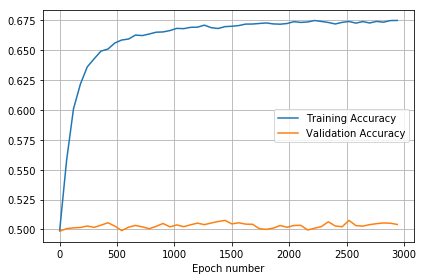

[[4854 4806]
 [5144 5196]]

Validation Avg: [ 0.5025]
Train Avg: [ 0.673775]


[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]    [0]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]    [1]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 

Epoch 26/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5358 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_acc: 0.4959
Epoch 27/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6880 - binary_crossentropy: 0.6880 - acc: 0.5353 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_acc: 0.4963
Epoch 28/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - acc: 0.5377 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_acc: 0.4958
Epoch 29/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6872 - binary_crossentropy: 0.6872 - acc: 0.5379 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_acc: 0.4917
Epoch 30/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - acc: 0.5419 - val_loss: 0.7007 - val_binary_crossentropy: 0.700

80000/80000 [==============================] - 2s 26us/step - loss: 0.6473 - binary_crossentropy: 0.6473 - acc: 0.6122 - val_loss: 0.7470 - val_binary_crossentropy: 0.7470 - val_acc: 0.5062
Epoch 107/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6471 - binary_crossentropy: 0.6471 - acc: 0.6119 - val_loss: 0.7560 - val_binary_crossentropy: 0.7560 - val_acc: 0.5010
Epoch 108/1000
80000/80000 [==============================] - 2s 30us/step - loss: 0.6459 - binary_crossentropy: 0.6459 - acc: 0.6150 - val_loss: 0.7446 - val_binary_crossentropy: 0.7446 - val_acc: 0.5018
Epoch 109/1000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6458 - binary_crossentropy: 0.6458 - acc: 0.6137 - val_loss: 0.7492 - val_binary_crossentropy: 0.7492 - val_acc: 0.5015
Epoch 110/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6448 - binary_crossentropy: 0.6448 - acc: 0.6149 - val_loss: 0.7555 - val_binary_crossentropy: 0.7555 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6255 - binary_crossentropy: 0.6255 - acc: 0.6375 - val_loss: 0.7877 - val_binary_crossentropy: 0.7877 - val_acc: 0.5038
Epoch 147/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6250 - binary_crossentropy: 0.6250 - acc: 0.6381 - val_loss: 0.7872 - val_binary_crossentropy: 0.7872 - val_acc: 0.4998
Epoch 148/1000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6246 - binary_crossentropy: 0.6246 - acc: 0.6388 - val_loss: 0.7894 - val_binary_crossentropy: 0.7894 - val_acc: 0.5026
Epoch 149/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6236 - binary_crossentropy: 0.6236 - acc: 0.6387 - val_loss: 0.7976 - val_binary_crossentropy: 0.7976 - val_acc: 0.5014
Epoch 150/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6238 - binary_crossentropy: 0.6238 - acc: 0.6394 - val_loss: 0.7912 - val_binary_crossentropy: 0.7912 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6076 - binary_crossentropy: 0.6076 - acc: 0.6531 - val_loss: 0.8189 - val_binary_crossentropy: 0.8189 - val_acc: 0.5029
Epoch 187/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6072 - binary_crossentropy: 0.6072 - acc: 0.6550 - val_loss: 0.8269 - val_binary_crossentropy: 0.8269 - val_acc: 0.4993
Epoch 188/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6063 - binary_crossentropy: 0.6063 - acc: 0.6561 - val_loss: 0.8296 - val_binary_crossentropy: 0.8296 - val_acc: 0.5003
Epoch 189/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6064 - binary_crossentropy: 0.6064 - acc: 0.6561 - val_loss: 0.8223 - val_binary_crossentropy: 0.8223 - val_acc: 0.4986
Epoch 190/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.6548 - val_loss: 0.8215 - val_binary_crossentropy: 0.8215 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5935 - binary_crossentropy: 0.5935 - acc: 0.6666 - val_loss: 0.8431 - val_binary_crossentropy: 0.8431 - val_acc: 0.4999
Epoch 227/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.6665 - val_loss: 0.8410 - val_binary_crossentropy: 0.8410 - val_acc: 0.5006
Epoch 228/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5934 - binary_crossentropy: 0.5934 - acc: 0.6669 - val_loss: 0.8528 - val_binary_crossentropy: 0.8528 - val_acc: 0.4986
Epoch 229/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5931 - binary_crossentropy: 0.5931 - acc: 0.6667 - val_loss: 0.8554 - val_binary_crossentropy: 0.8554 - val_acc: 0.5024
Epoch 230/1000
80000/80000 [==============================] - 3s 34us/step - loss: 0.5929 - binary_crossentropy: 0.5929 - acc: 0.6663 - val_loss: 0.8597 - val_binary_crossentropy: 0.8597 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5823 - binary_crossentropy: 0.5823 - acc: 0.6774 - val_loss: 0.8808 - val_binary_crossentropy: 0.8808 - val_acc: 0.4981
Epoch 267/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5822 - binary_crossentropy: 0.5822 - acc: 0.6751 - val_loss: 0.8647 - val_binary_crossentropy: 0.8647 - val_acc: 0.5005
Epoch 268/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5815 - binary_crossentropy: 0.5815 - acc: 0.6766 - val_loss: 0.8760 - val_binary_crossentropy: 0.8760 - val_acc: 0.4988
Epoch 269/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5810 - binary_crossentropy: 0.5810 - acc: 0.6777 - val_loss: 0.8683 - val_binary_crossentropy: 0.8683 - val_acc: 0.5014
Epoch 270/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5814 - binary_crossentropy: 0.5814 - acc: 0.6777 - val_loss: 0.8831 - val_binary_crossentropy: 0.8831 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5724 - binary_crossentropy: 0.5724 - acc: 0.6852 - val_loss: 0.9268 - val_binary_crossentropy: 0.9268 - val_acc: 0.4987
Epoch 307/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5720 - binary_crossentropy: 0.5720 - acc: 0.6847 - val_loss: 0.9127 - val_binary_crossentropy: 0.9127 - val_acc: 0.4982
Epoch 308/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5724 - binary_crossentropy: 0.5724 - acc: 0.6845 - val_loss: 0.9097 - val_binary_crossentropy: 0.9097 - val_acc: 0.5022
Epoch 309/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5721 - binary_crossentropy: 0.5721 - acc: 0.6837 - val_loss: 0.9097 - val_binary_crossentropy: 0.9097 - val_acc: 0.5006
Epoch 310/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5720 - binary_crossentropy: 0.5720 - acc: 0.6855 - val_loss: 0.9089 - val_binary_crossentropy: 0.9089 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5649 - binary_crossentropy: 0.5649 - acc: 0.6908 - val_loss: 0.9312 - val_binary_crossentropy: 0.9312 - val_acc: 0.4984
Epoch 347/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5644 - binary_crossentropy: 0.5644 - acc: 0.6909 - val_loss: 0.9483 - val_binary_crossentropy: 0.9483 - val_acc: 0.4961
Epoch 348/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5647 - binary_crossentropy: 0.5647 - acc: 0.6907 - val_loss: 0.9498 - val_binary_crossentropy: 0.9498 - val_acc: 0.4961
Epoch 349/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5643 - binary_crossentropy: 0.5643 - acc: 0.6922 - val_loss: 0.9216 - val_binary_crossentropy: 0.9216 - val_acc: 0.4997
Epoch 350/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5638 - binary_crossentropy: 0.5638 - acc: 0.6901 - val_loss: 0.9415 - val_binary_crossentropy: 0.9415 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5582 - binary_crossentropy: 0.5582 - acc: 0.6970 - val_loss: 0.9695 - val_binary_crossentropy: 0.9695 - val_acc: 0.4980
Epoch 387/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5590 - binary_crossentropy: 0.5590 - acc: 0.6959 - val_loss: 0.9571 - val_binary_crossentropy: 0.9571 - val_acc: 0.4980
Epoch 388/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5573 - binary_crossentropy: 0.5573 - acc: 0.6965 - val_loss: 0.9520 - val_binary_crossentropy: 0.9520 - val_acc: 0.4958
Epoch 389/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5573 - binary_crossentropy: 0.5573 - acc: 0.6977 - val_loss: 0.9476 - val_binary_crossentropy: 0.9476 - val_acc: 0.4978
Epoch 390/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5575 - binary_crossentropy: 0.5575 - acc: 0.6950 - val_loss: 0.9695 - val_binary_crossentropy: 0.9695 - val_ac

80000/80000 [==============================] - 2s 27us/step - loss: 0.5516 - binary_crossentropy: 0.5516 - acc: 0.6989 - val_loss: 0.9782 - val_binary_crossentropy: 0.9782 - val_acc: 0.5003
Epoch 427/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5517 - binary_crossentropy: 0.5517 - acc: 0.7018 - val_loss: 0.9649 - val_binary_crossentropy: 0.9649 - val_acc: 0.4977
Epoch 428/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5520 - binary_crossentropy: 0.5520 - acc: 0.7022 - val_loss: 0.9888 - val_binary_crossentropy: 0.9888 - val_acc: 0.4981
Epoch 429/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5512 - binary_crossentropy: 0.5512 - acc: 0.7012 - val_loss: 0.9807 - val_binary_crossentropy: 0.9807 - val_acc: 0.4991
Epoch 430/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5512 - binary_crossentropy: 0.5512 - acc: 0.7010 - val_loss: 0.9834 - val_binary_crossentropy: 0.9834 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5466 - binary_crossentropy: 0.5466 - acc: 0.7058 - val_loss: 1.0041 - val_binary_crossentropy: 1.0041 - val_acc: 0.5022
Epoch 467/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5464 - binary_crossentropy: 0.5464 - acc: 0.7050 - val_loss: 1.0015 - val_binary_crossentropy: 1.0015 - val_acc: 0.5021
Epoch 468/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5453 - binary_crossentropy: 0.5453 - acc: 0.7050 - val_loss: 0.9934 - val_binary_crossentropy: 0.9934 - val_acc: 0.4987
Epoch 469/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5455 - binary_crossentropy: 0.5455 - acc: 0.7074 - val_loss: 0.9959 - val_binary_crossentropy: 0.9959 - val_acc: 0.4990
Epoch 470/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5460 - binary_crossentropy: 0.5460 - acc: 0.7043 - val_loss: 0.9834 - val_binary_crossentropy: 0.9834 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5411 - binary_crossentropy: 0.5411 - acc: 0.7084 - val_loss: 1.0236 - val_binary_crossentropy: 1.0236 - val_acc: 0.4970
Epoch 507/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5408 - binary_crossentropy: 0.5408 - acc: 0.7098 - val_loss: 1.0187 - val_binary_crossentropy: 1.0187 - val_acc: 0.4994
Epoch 508/1000
80000/80000 [==============================] - 3s 32us/step - loss: 0.5398 - binary_crossentropy: 0.5398 - acc: 0.7106 - val_loss: 1.0213 - val_binary_crossentropy: 1.0213 - val_acc: 0.5019
Epoch 509/1000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5409 - binary_crossentropy: 0.5409 - acc: 0.7087 - val_loss: 1.0113 - val_binary_crossentropy: 1.0113 - val_acc: 0.4947
Epoch 510/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5407 - binary_crossentropy: 0.5407 - acc: 0.7105 - val_loss: 1.0266 - val_binary_crossentropy: 1.0266 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5371 - binary_crossentropy: 0.5371 - acc: 0.7113 - val_loss: 1.0397 - val_binary_crossentropy: 1.0397 - val_acc: 0.5004
Epoch 547/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5360 - binary_crossentropy: 0.5360 - acc: 0.7133 - val_loss: 1.0456 - val_binary_crossentropy: 1.0456 - val_acc: 0.4974
Epoch 548/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5367 - binary_crossentropy: 0.5367 - acc: 0.7118 - val_loss: 1.0508 - val_binary_crossentropy: 1.0508 - val_acc: 0.4960
Epoch 549/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5360 - binary_crossentropy: 0.5360 - acc: 0.7136 - val_loss: 1.0400 - val_binary_crossentropy: 1.0400 - val_acc: 0.4993
Epoch 550/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5362 - binary_crossentropy: 0.5362 - acc: 0.7120 - val_loss: 1.0308 - val_binary_crossentropy: 1.0308 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5329 - binary_crossentropy: 0.5329 - acc: 0.7151 - val_loss: 1.0550 - val_binary_crossentropy: 1.0550 - val_acc: 0.5010
Epoch 587/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5331 - binary_crossentropy: 0.5331 - acc: 0.7144 - val_loss: 1.0513 - val_binary_crossentropy: 1.0513 - val_acc: 0.4985
Epoch 588/1000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5323 - binary_crossentropy: 0.5323 - acc: 0.7140 - val_loss: 1.0514 - val_binary_crossentropy: 1.0514 - val_acc: 0.5002
Epoch 589/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5319 - binary_crossentropy: 0.5319 - acc: 0.7147 - val_loss: 1.0491 - val_binary_crossentropy: 1.0491 - val_acc: 0.4989
Epoch 590/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5327 - binary_crossentropy: 0.5327 - acc: 0.7149 - val_loss: 1.0536 - val_binary_crossentropy: 1.0536 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5297 - binary_crossentropy: 0.5297 - acc: 0.7167 - val_loss: 1.0740 - val_binary_crossentropy: 1.0740 - val_acc: 0.5011
Epoch 627/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5292 - binary_crossentropy: 0.5292 - acc: 0.7182 - val_loss: 1.0590 - val_binary_crossentropy: 1.0590 - val_acc: 0.5002
Epoch 628/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5291 - binary_crossentropy: 0.5291 - acc: 0.7183 - val_loss: 1.0733 - val_binary_crossentropy: 1.0733 - val_acc: 0.4974
Epoch 629/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5295 - binary_crossentropy: 0.5295 - acc: 0.7176 - val_loss: 1.0598 - val_binary_crossentropy: 1.0598 - val_acc: 0.4970
Epoch 630/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5291 - binary_crossentropy: 0.5291 - acc: 0.7173 - val_loss: 1.0714 - val_binary_crossentropy: 1.0714 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5264 - binary_crossentropy: 0.5264 - acc: 0.7197 - val_loss: 1.0771 - val_binary_crossentropy: 1.0771 - val_acc: 0.4975
Epoch 667/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5262 - binary_crossentropy: 0.5262 - acc: 0.7198 - val_loss: 1.0660 - val_binary_crossentropy: 1.0660 - val_acc: 0.5008
Epoch 668/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5258 - binary_crossentropy: 0.5258 - acc: 0.7198 - val_loss: 1.0806 - val_binary_crossentropy: 1.0806 - val_acc: 0.4962
Epoch 669/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5261 - binary_crossentropy: 0.5261 - acc: 0.7196 - val_loss: 1.0567 - val_binary_crossentropy: 1.0567 - val_acc: 0.5006
Epoch 670/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5245 - binary_crossentropy: 0.5245 - acc: 0.7214 - val_loss: 1.0760 - val_binary_crossentropy: 1.0760 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5235 - binary_crossentropy: 0.5235 - acc: 0.7230 - val_loss: 1.0795 - val_binary_crossentropy: 1.0795 - val_acc: 0.4985
Epoch 707/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5232 - binary_crossentropy: 0.5232 - acc: 0.7226 - val_loss: 1.1300 - val_binary_crossentropy: 1.1300 - val_acc: 0.5015
Epoch 708/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5228 - binary_crossentropy: 0.5228 - acc: 0.7225 - val_loss: 1.1115 - val_binary_crossentropy: 1.1115 - val_acc: 0.4997
Epoch 709/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5226 - binary_crossentropy: 0.5226 - acc: 0.7220 - val_loss: 1.0841 - val_binary_crossentropy: 1.0841 - val_acc: 0.5002
Epoch 710/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5226 - binary_crossentropy: 0.5226 - acc: 0.7219 - val_loss: 1.0888 - val_binary_crossentropy: 1.0888 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7247 - val_loss: 1.0943 - val_binary_crossentropy: 1.0943 - val_acc: 0.5000
Epoch 747/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5209 - binary_crossentropy: 0.5209 - acc: 0.7244 - val_loss: 1.0993 - val_binary_crossentropy: 1.0993 - val_acc: 0.4985
Epoch 748/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5202 - binary_crossentropy: 0.5202 - acc: 0.7246 - val_loss: 1.1080 - val_binary_crossentropy: 1.1080 - val_acc: 0.4998
Epoch 749/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5213 - binary_crossentropy: 0.5213 - acc: 0.7241 - val_loss: 1.0954 - val_binary_crossentropy: 1.0954 - val_acc: 0.4985
Epoch 750/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5206 - binary_crossentropy: 0.5206 - acc: 0.7243 - val_loss: 1.0892 - val_binary_crossentropy: 1.0892 - val_ac

80000/80000 [==============================] - 2s 30us/step - loss: 0.5184 - binary_crossentropy: 0.5184 - acc: 0.7266 - val_loss: 1.1237 - val_binary_crossentropy: 1.1237 - val_acc: 0.4983
Epoch 787/1000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5187 - binary_crossentropy: 0.5187 - acc: 0.7250 - val_loss: 1.1189 - val_binary_crossentropy: 1.1189 - val_acc: 0.4984
Epoch 788/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5195 - binary_crossentropy: 0.5195 - acc: 0.7253 - val_loss: 1.1184 - val_binary_crossentropy: 1.1184 - val_acc: 0.4985
Epoch 789/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5190 - binary_crossentropy: 0.5190 - acc: 0.7254 - val_loss: 1.0949 - val_binary_crossentropy: 1.0949 - val_acc: 0.4976
Epoch 790/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5179 - binary_crossentropy: 0.5179 - acc: 0.7250 - val_loss: 1.1267 - val_binary_crossentropy: 1.1267 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5173 - binary_crossentropy: 0.5173 - acc: 0.7264 - val_loss: 1.1116 - val_binary_crossentropy: 1.1116 - val_acc: 0.4949
Epoch 827/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5165 - binary_crossentropy: 0.5165 - acc: 0.7256 - val_loss: 1.1266 - val_binary_crossentropy: 1.1266 - val_acc: 0.4988
Epoch 828/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5176 - binary_crossentropy: 0.5176 - acc: 0.7276 - val_loss: 1.1086 - val_binary_crossentropy: 1.1086 - val_acc: 0.4976
Epoch 829/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5169 - binary_crossentropy: 0.5169 - acc: 0.7261 - val_loss: 1.1223 - val_binary_crossentropy: 1.1223 - val_acc: 0.4962
Epoch 830/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5167 - binary_crossentropy: 0.5167 - acc: 0.7265 - val_loss: 1.1239 - val_binary_crossentropy: 1.1239 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5148 - binary_crossentropy: 0.5148 - acc: 0.7289 - val_loss: 1.1482 - val_binary_crossentropy: 1.1482 - val_acc: 0.4947
Epoch 867/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5151 - binary_crossentropy: 0.5151 - acc: 0.7266 - val_loss: 1.1294 - val_binary_crossentropy: 1.1294 - val_acc: 0.5001
Epoch 868/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5152 - binary_crossentropy: 0.5152 - acc: 0.7286 - val_loss: 1.1340 - val_binary_crossentropy: 1.1340 - val_acc: 0.4980
Epoch 869/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5152 - binary_crossentropy: 0.5152 - acc: 0.7267 - val_loss: 1.1309 - val_binary_crossentropy: 1.1309 - val_acc: 0.4968
Epoch 870/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5153 - binary_crossentropy: 0.5153 - acc: 0.7275 - val_loss: 1.1235 - val_binary_crossentropy: 1.1235 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5130 - binary_crossentropy: 0.5130 - acc: 0.7288 - val_loss: 1.1373 - val_binary_crossentropy: 1.1373 - val_acc: 0.4970
Epoch 907/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5137 - binary_crossentropy: 0.5137 - acc: 0.7293 - val_loss: 1.1303 - val_binary_crossentropy: 1.1303 - val_acc: 0.4942
Epoch 908/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5140 - binary_crossentropy: 0.5140 - acc: 0.7286 - val_loss: 1.1372 - val_binary_crossentropy: 1.1372 - val_acc: 0.4966
Epoch 909/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5128 - binary_crossentropy: 0.5128 - acc: 0.7301 - val_loss: 1.1344 - val_binary_crossentropy: 1.1344 - val_acc: 0.4964
Epoch 910/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5142 - binary_crossentropy: 0.5142 - acc: 0.7270 - val_loss: 1.1238 - val_binary_crossentropy: 1.1238 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5121 - binary_crossentropy: 0.5121 - acc: 0.7290 - val_loss: 1.1677 - val_binary_crossentropy: 1.1677 - val_acc: 0.4972
Epoch 947/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5122 - binary_crossentropy: 0.5122 - acc: 0.7291 - val_loss: 1.1589 - val_binary_crossentropy: 1.1589 - val_acc: 0.4969
Epoch 948/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5123 - binary_crossentropy: 0.5123 - acc: 0.7313 - val_loss: 1.1503 - val_binary_crossentropy: 1.1503 - val_acc: 0.4979
Epoch 949/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5125 - binary_crossentropy: 0.5125 - acc: 0.7290 - val_loss: 1.1521 - val_binary_crossentropy: 1.1521 - val_acc: 0.4957
Epoch 950/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5121 - binary_crossentropy: 0.5121 - acc: 0.7294 - val_loss: 1.1263 - val_binary_crossentropy: 1.1263 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5113 - binary_crossentropy: 0.5113 - acc: 0.7319 - val_loss: 1.1476 - val_binary_crossentropy: 1.1476 - val_acc: 0.4970
Epoch 987/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5112 - binary_crossentropy: 0.5112 - acc: 0.7302 - val_loss: 1.1590 - val_binary_crossentropy: 1.1590 - val_acc: 0.4954
Epoch 988/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5112 - binary_crossentropy: 0.5112 - acc: 0.7298 - val_loss: 1.1702 - val_binary_crossentropy: 1.1702 - val_acc: 0.4954
Epoch 989/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5105 - binary_crossentropy: 0.5105 - acc: 0.7307 - val_loss: 1.1404 - val_binary_crossentropy: 1.1404 - val_acc: 0.4944
Epoch 990/1000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5116 - binary_crossentropy: 0.5116 - acc: 0.7302 - val_loss: 1.1472 - val_binary_crossentropy: 1.1472 - val_ac

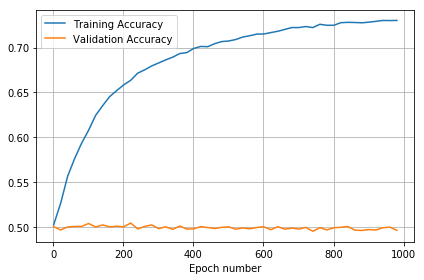

[[5255 5338]
 [4743 4664]]

Validation Avg: [ 0.49595]
Train Avg: [ 0.7312375]


[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]    [0]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]

Epoch 26/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - acc: 0.5413 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_acc: 0.4977
Epoch 27/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6860 - binary_crossentropy: 0.6860 - acc: 0.5427 - val_loss: 0.7034 - val_binary_crossentropy: 0.7034 - val_acc: 0.4999
Epoch 28/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - acc: 0.5445 - val_loss: 0.7036 - val_binary_crossentropy: 0.7036 - val_acc: 0.4986
Epoch 29/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6851 - binary_crossentropy: 0.6851 - acc: 0.5470 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_acc: 0.4978
Epoch 30/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6848 - binary_crossentropy: 0.6848 - acc: 0.5471 - val_loss: 0.7026 - val_binary_crossentropy: 0.702

80000/80000 [==============================] - 2s 26us/step - loss: 0.6469 - binary_crossentropy: 0.6469 - acc: 0.6110 - val_loss: 0.7543 - val_binary_crossentropy: 0.7543 - val_acc: 0.4985
Epoch 107/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - acc: 0.6135 - val_loss: 0.7550 - val_binary_crossentropy: 0.7550 - val_acc: 0.4995
Epoch 108/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6459 - binary_crossentropy: 0.6459 - acc: 0.6136 - val_loss: 0.7589 - val_binary_crossentropy: 0.7589 - val_acc: 0.4991
Epoch 109/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6455 - binary_crossentropy: 0.6455 - acc: 0.6133 - val_loss: 0.7621 - val_binary_crossentropy: 0.7621 - val_acc: 0.5015
Epoch 110/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6447 - binary_crossentropy: 0.6447 - acc: 0.6128 - val_loss: 0.7590 - val_binary_crossentropy: 0.7590 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6254 - binary_crossentropy: 0.6254 - acc: 0.6353 - val_loss: 0.7949 - val_binary_crossentropy: 0.7949 - val_acc: 0.4991
Epoch 147/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6253 - binary_crossentropy: 0.6253 - acc: 0.6376 - val_loss: 0.7869 - val_binary_crossentropy: 0.7869 - val_acc: 0.5002
Epoch 148/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6250 - binary_crossentropy: 0.6250 - acc: 0.6365 - val_loss: 0.7822 - val_binary_crossentropy: 0.7822 - val_acc: 0.5008
Epoch 149/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6372 - val_loss: 0.7944 - val_binary_crossentropy: 0.7944 - val_acc: 0.4986
Epoch 150/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6238 - binary_crossentropy: 0.6238 - acc: 0.6385 - val_loss: 0.7987 - val_binary_crossentropy: 0.7987 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6086 - binary_crossentropy: 0.6086 - acc: 0.6532 - val_loss: 0.8249 - val_binary_crossentropy: 0.8249 - val_acc: 0.5007
Epoch 187/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6079 - binary_crossentropy: 0.6079 - acc: 0.6552 - val_loss: 0.8162 - val_binary_crossentropy: 0.8162 - val_acc: 0.5005
Epoch 188/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6078 - binary_crossentropy: 0.6078 - acc: 0.6544 - val_loss: 0.8442 - val_binary_crossentropy: 0.8442 - val_acc: 0.5007
Epoch 189/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6073 - binary_crossentropy: 0.6073 - acc: 0.6546 - val_loss: 0.8213 - val_binary_crossentropy: 0.8213 - val_acc: 0.5013
Epoch 190/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6071 - binary_crossentropy: 0.6071 - acc: 0.6548 - val_loss: 0.8175 - val_binary_crossentropy: 0.8175 - val_ac

80000/80000 [==============================] - 2s 28us/step - loss: 0.5948 - binary_crossentropy: 0.5948 - acc: 0.6683 - val_loss: 0.8551 - val_binary_crossentropy: 0.8551 - val_acc: 0.4979
Epoch 227/2000
80000/80000 [==============================] - 3s 33us/step - loss: 0.5946 - binary_crossentropy: 0.5946 - acc: 0.6668 - val_loss: 0.8539 - val_binary_crossentropy: 0.8539 - val_acc: 0.4998
Epoch 228/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5935 - binary_crossentropy: 0.5935 - acc: 0.6662 - val_loss: 0.8565 - val_binary_crossentropy: 0.8565 - val_acc: 0.4989
Epoch 229/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5937 - binary_crossentropy: 0.5937 - acc: 0.6682 - val_loss: 0.8611 - val_binary_crossentropy: 0.8611 - val_acc: 0.4989
Epoch 230/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5936 - binary_crossentropy: 0.5936 - acc: 0.6679 - val_loss: 0.8635 - val_binary_crossentropy: 0.8635 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5826 - binary_crossentropy: 0.5826 - acc: 0.6768 - val_loss: 0.8828 - val_binary_crossentropy: 0.8828 - val_acc: 0.4961
Epoch 267/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5817 - binary_crossentropy: 0.5817 - acc: 0.6799 - val_loss: 0.8822 - val_binary_crossentropy: 0.8822 - val_acc: 0.4998
Epoch 268/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5814 - binary_crossentropy: 0.5814 - acc: 0.6773 - val_loss: 0.8729 - val_binary_crossentropy: 0.8729 - val_acc: 0.4989
Epoch 269/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5816 - binary_crossentropy: 0.5816 - acc: 0.6778 - val_loss: 0.8785 - val_binary_crossentropy: 0.8785 - val_acc: 0.5002
Epoch 270/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5815 - binary_crossentropy: 0.5815 - acc: 0.6791 - val_loss: 0.8971 - val_binary_crossentropy: 0.8971 - val_ac

80000/80000 [==============================] - 2s 27us/step - loss: 0.5735 - binary_crossentropy: 0.5735 - acc: 0.6847 - val_loss: 0.9213 - val_binary_crossentropy: 0.9213 - val_acc: 0.4996
Epoch 307/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5733 - binary_crossentropy: 0.5733 - acc: 0.6836 - val_loss: 0.9114 - val_binary_crossentropy: 0.9114 - val_acc: 0.4983
Epoch 308/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5721 - binary_crossentropy: 0.5721 - acc: 0.6868 - val_loss: 0.9004 - val_binary_crossentropy: 0.9004 - val_acc: 0.4991
Epoch 309/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5724 - binary_crossentropy: 0.5724 - acc: 0.6860 - val_loss: 0.9140 - val_binary_crossentropy: 0.9140 - val_acc: 0.5015
Epoch 310/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5721 - binary_crossentropy: 0.5721 - acc: 0.6856 - val_loss: 0.9303 - val_binary_crossentropy: 0.9303 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5648 - binary_crossentropy: 0.5648 - acc: 0.6910 - val_loss: 0.9275 - val_binary_crossentropy: 0.9275 - val_acc: 0.5014
Epoch 347/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5648 - binary_crossentropy: 0.5648 - acc: 0.6930 - val_loss: 0.9418 - val_binary_crossentropy: 0.9418 - val_acc: 0.5018
Epoch 348/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5645 - binary_crossentropy: 0.5645 - acc: 0.6918 - val_loss: 0.9474 - val_binary_crossentropy: 0.9474 - val_acc: 0.5034
Epoch 349/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5644 - binary_crossentropy: 0.5644 - acc: 0.6913 - val_loss: 0.9323 - val_binary_crossentropy: 0.9323 - val_acc: 0.5036
Epoch 350/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5645 - binary_crossentropy: 0.5645 - acc: 0.6915 - val_loss: 0.9326 - val_binary_crossentropy: 0.9326 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5586 - binary_crossentropy: 0.5586 - acc: 0.6965 - val_loss: 0.9520 - val_binary_crossentropy: 0.9520 - val_acc: 0.5046
Epoch 387/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5578 - binary_crossentropy: 0.5578 - acc: 0.6974 - val_loss: 0.9622 - val_binary_crossentropy: 0.9622 - val_acc: 0.5000
Epoch 388/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5574 - binary_crossentropy: 0.5574 - acc: 0.6976 - val_loss: 0.9624 - val_binary_crossentropy: 0.9624 - val_acc: 0.5007
Epoch 389/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5577 - binary_crossentropy: 0.5577 - acc: 0.6981 - val_loss: 0.9540 - val_binary_crossentropy: 0.9540 - val_acc: 0.5001
Epoch 390/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5571 - binary_crossentropy: 0.5571 - acc: 0.6996 - val_loss: 0.9491 - val_binary_crossentropy: 0.9491 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5521 - binary_crossentropy: 0.5521 - acc: 0.7022 - val_loss: 0.9831 - val_binary_crossentropy: 0.9831 - val_acc: 0.4994
Epoch 427/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5519 - binary_crossentropy: 0.5519 - acc: 0.6998 - val_loss: 0.9760 - val_binary_crossentropy: 0.9760 - val_acc: 0.5041
Epoch 428/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5519 - binary_crossentropy: 0.5519 - acc: 0.7024 - val_loss: 0.9864 - val_binary_crossentropy: 0.9864 - val_acc: 0.5014
Epoch 429/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5526 - binary_crossentropy: 0.5526 - acc: 0.7007 - val_loss: 0.9853 - val_binary_crossentropy: 0.9853 - val_acc: 0.5020
Epoch 430/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5511 - binary_crossentropy: 0.5511 - acc: 0.7005 - val_loss: 0.9720 - val_binary_crossentropy: 0.9720 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5464 - binary_crossentropy: 0.5464 - acc: 0.7037 - val_loss: 0.9969 - val_binary_crossentropy: 0.9969 - val_acc: 0.4999
Epoch 467/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5457 - binary_crossentropy: 0.5457 - acc: 0.7054 - val_loss: 1.0051 - val_binary_crossentropy: 1.0051 - val_acc: 0.5043
Epoch 468/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5453 - binary_crossentropy: 0.5453 - acc: 0.7055 - val_loss: 0.9989 - val_binary_crossentropy: 0.9989 - val_acc: 0.5025
Epoch 469/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5456 - binary_crossentropy: 0.5456 - acc: 0.7066 - val_loss: 0.9939 - val_binary_crossentropy: 0.9939 - val_acc: 0.5058
Epoch 470/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5453 - binary_crossentropy: 0.5453 - acc: 0.7067 - val_loss: 1.0058 - val_binary_crossentropy: 1.0058 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5413 - binary_crossentropy: 0.5413 - acc: 0.7084 - val_loss: 1.0127 - val_binary_crossentropy: 1.0127 - val_acc: 0.5032
Epoch 507/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5408 - binary_crossentropy: 0.5408 - acc: 0.7112 - val_loss: 1.0329 - val_binary_crossentropy: 1.0329 - val_acc: 0.5028
Epoch 508/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5400 - binary_crossentropy: 0.5400 - acc: 0.7091 - val_loss: 1.0378 - val_binary_crossentropy: 1.0378 - val_acc: 0.5013
Epoch 509/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5404 - binary_crossentropy: 0.5404 - acc: 0.7101 - val_loss: 1.0234 - val_binary_crossentropy: 1.0234 - val_acc: 0.4969
Epoch 510/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5404 - binary_crossentropy: 0.5404 - acc: 0.7103 - val_loss: 1.0153 - val_binary_crossentropy: 1.0153 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5360 - binary_crossentropy: 0.5360 - acc: 0.7151 - val_loss: 1.0378 - val_binary_crossentropy: 1.0378 - val_acc: 0.5036
Epoch 547/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5358 - binary_crossentropy: 0.5358 - acc: 0.7140 - val_loss: 1.0329 - val_binary_crossentropy: 1.0329 - val_acc: 0.5008
Epoch 548/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5363 - binary_crossentropy: 0.5363 - acc: 0.7129 - val_loss: 1.0457 - val_binary_crossentropy: 1.0457 - val_acc: 0.5007
Epoch 549/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5348 - binary_crossentropy: 0.5348 - acc: 0.7150 - val_loss: 1.0401 - val_binary_crossentropy: 1.0401 - val_acc: 0.5023
Epoch 550/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5355 - binary_crossentropy: 0.5355 - acc: 0.7125 - val_loss: 1.0321 - val_binary_crossentropy: 1.0321 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5321 - binary_crossentropy: 0.5321 - acc: 0.7148 - val_loss: 1.0445 - val_binary_crossentropy: 1.0445 - val_acc: 0.5020
Epoch 587/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5323 - binary_crossentropy: 0.5323 - acc: 0.7158 - val_loss: 1.0461 - val_binary_crossentropy: 1.0461 - val_acc: 0.5017
Epoch 588/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5326 - binary_crossentropy: 0.5326 - acc: 0.7148 - val_loss: 1.0499 - val_binary_crossentropy: 1.0499 - val_acc: 0.5009
Epoch 589/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5326 - binary_crossentropy: 0.5326 - acc: 0.7160 - val_loss: 1.0593 - val_binary_crossentropy: 1.0593 - val_acc: 0.4993
Epoch 590/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5329 - binary_crossentropy: 0.5329 - acc: 0.7161 - val_loss: 1.0616 - val_binary_crossentropy: 1.0616 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5296 - binary_crossentropy: 0.5296 - acc: 0.7173 - val_loss: 1.0613 - val_binary_crossentropy: 1.0613 - val_acc: 0.5028
Epoch 627/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5291 - binary_crossentropy: 0.5291 - acc: 0.7168 - val_loss: 1.0603 - val_binary_crossentropy: 1.0603 - val_acc: 0.4994
Epoch 628/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5288 - binary_crossentropy: 0.5288 - acc: 0.7212 - val_loss: 1.0742 - val_binary_crossentropy: 1.0742 - val_acc: 0.5011
Epoch 629/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5288 - binary_crossentropy: 0.5288 - acc: 0.7190 - val_loss: 1.0642 - val_binary_crossentropy: 1.0642 - val_acc: 0.5034
Epoch 630/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5296 - binary_crossentropy: 0.5296 - acc: 0.7193 - val_loss: 1.0605 - val_binary_crossentropy: 1.0605 - val_ac

80000/80000 [==============================] - 2s 30us/step - loss: 0.5257 - binary_crossentropy: 0.5257 - acc: 0.7190 - val_loss: 1.0956 - val_binary_crossentropy: 1.0956 - val_acc: 0.4973
Epoch 667/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5264 - binary_crossentropy: 0.5264 - acc: 0.7218 - val_loss: 1.0646 - val_binary_crossentropy: 1.0646 - val_acc: 0.5011
Epoch 668/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5263 - binary_crossentropy: 0.5263 - acc: 0.7192 - val_loss: 1.0647 - val_binary_crossentropy: 1.0647 - val_acc: 0.5033
Epoch 669/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5259 - binary_crossentropy: 0.5259 - acc: 0.7204 - val_loss: 1.0948 - val_binary_crossentropy: 1.0948 - val_acc: 0.5008
Epoch 670/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5258 - binary_crossentropy: 0.5258 - acc: 0.7206 - val_loss: 1.0941 - val_binary_crossentropy: 1.0941 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5245 - binary_crossentropy: 0.5245 - acc: 0.7222 - val_loss: 1.0838 - val_binary_crossentropy: 1.0838 - val_acc: 0.5000
Epoch 707/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5233 - binary_crossentropy: 0.5233 - acc: 0.7235 - val_loss: 1.0793 - val_binary_crossentropy: 1.0793 - val_acc: 0.5042
Epoch 708/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5235 - binary_crossentropy: 0.5235 - acc: 0.7215 - val_loss: 1.0822 - val_binary_crossentropy: 1.0822 - val_acc: 0.5028
Epoch 709/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5240 - binary_crossentropy: 0.5240 - acc: 0.7219 - val_loss: 1.1038 - val_binary_crossentropy: 1.1038 - val_acc: 0.5023
Epoch 710/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5233 - binary_crossentropy: 0.5233 - acc: 0.7225 - val_loss: 1.0995 - val_binary_crossentropy: 1.0995 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5223 - binary_crossentropy: 0.5223 - acc: 0.7241 - val_loss: 1.0922 - val_binary_crossentropy: 1.0922 - val_acc: 0.4997
Epoch 747/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7240 - val_loss: 1.0979 - val_binary_crossentropy: 1.0979 - val_acc: 0.5025
Epoch 748/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7242 - val_loss: 1.1077 - val_binary_crossentropy: 1.1077 - val_acc: 0.4986
Epoch 749/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5213 - binary_crossentropy: 0.5213 - acc: 0.7252 - val_loss: 1.1008 - val_binary_crossentropy: 1.1008 - val_acc: 0.5015
Epoch 750/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7241 - val_loss: 1.0982 - val_binary_crossentropy: 1.0982 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5198 - binary_crossentropy: 0.5198 - acc: 0.7244 - val_loss: 1.1287 - val_binary_crossentropy: 1.1287 - val_acc: 0.4988
Epoch 787/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5196 - binary_crossentropy: 0.5196 - acc: 0.7263 - val_loss: 1.0959 - val_binary_crossentropy: 1.0959 - val_acc: 0.5034
Epoch 788/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5195 - binary_crossentropy: 0.5195 - acc: 0.7242 - val_loss: 1.1114 - val_binary_crossentropy: 1.1114 - val_acc: 0.5029
Epoch 789/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5196 - binary_crossentropy: 0.5196 - acc: 0.7263 - val_loss: 1.1142 - val_binary_crossentropy: 1.1142 - val_acc: 0.5024
Epoch 790/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5194 - binary_crossentropy: 0.5194 - acc: 0.7265 - val_loss: 1.1166 - val_binary_crossentropy: 1.1166 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5180 - binary_crossentropy: 0.5180 - acc: 0.7256 - val_loss: 1.1300 - val_binary_crossentropy: 1.1300 - val_acc: 0.4990
Epoch 827/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5182 - binary_crossentropy: 0.5182 - acc: 0.7256 - val_loss: 1.1132 - val_binary_crossentropy: 1.1132 - val_acc: 0.5023
Epoch 828/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5180 - binary_crossentropy: 0.5180 - acc: 0.7245 - val_loss: 1.1252 - val_binary_crossentropy: 1.1252 - val_acc: 0.5015
Epoch 829/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5185 - binary_crossentropy: 0.5185 - acc: 0.7251 - val_loss: 1.1226 - val_binary_crossentropy: 1.1226 - val_acc: 0.5004
Epoch 830/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5183 - binary_crossentropy: 0.5183 - acc: 0.7264 - val_loss: 1.1392 - val_binary_crossentropy: 1.1392 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5166 - binary_crossentropy: 0.5166 - acc: 0.7269 - val_loss: 1.1285 - val_binary_crossentropy: 1.1285 - val_acc: 0.4999
Epoch 867/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5170 - binary_crossentropy: 0.5170 - acc: 0.7249 - val_loss: 1.1385 - val_binary_crossentropy: 1.1385 - val_acc: 0.5041
Epoch 868/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5176 - binary_crossentropy: 0.5176 - acc: 0.7254 - val_loss: 1.1181 - val_binary_crossentropy: 1.1181 - val_acc: 0.5009
Epoch 869/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5166 - binary_crossentropy: 0.5166 - acc: 0.7263 - val_loss: 1.1154 - val_binary_crossentropy: 1.1154 - val_acc: 0.5044
Epoch 870/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5160 - binary_crossentropy: 0.5160 - acc: 0.7272 - val_loss: 1.1612 - val_binary_crossentropy: 1.1612 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5158 - binary_crossentropy: 0.5158 - acc: 0.7278 - val_loss: 1.1662 - val_binary_crossentropy: 1.1662 - val_acc: 0.5052
Epoch 907/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5158 - binary_crossentropy: 0.5158 - acc: 0.7272 - val_loss: 1.1303 - val_binary_crossentropy: 1.1303 - val_acc: 0.5033
Epoch 908/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5141 - binary_crossentropy: 0.5141 - acc: 0.7273 - val_loss: 1.1611 - val_binary_crossentropy: 1.1611 - val_acc: 0.5028
Epoch 909/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5152 - binary_crossentropy: 0.5152 - acc: 0.7279 - val_loss: 1.1517 - val_binary_crossentropy: 1.1517 - val_acc: 0.4986
Epoch 910/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5143 - binary_crossentropy: 0.5143 - acc: 0.7288 - val_loss: 1.1363 - val_binary_crossentropy: 1.1363 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5144 - binary_crossentropy: 0.5144 - acc: 0.7293 - val_loss: 1.1589 - val_binary_crossentropy: 1.1589 - val_acc: 0.5024
Epoch 947/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5150 - binary_crossentropy: 0.5150 - acc: 0.7285 - val_loss: 1.1402 - val_binary_crossentropy: 1.1402 - val_acc: 0.5030
Epoch 948/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5136 - binary_crossentropy: 0.5136 - acc: 0.7290 - val_loss: 1.1602 - val_binary_crossentropy: 1.1602 - val_acc: 0.5030
Epoch 949/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5131 - binary_crossentropy: 0.5131 - acc: 0.7315 - val_loss: 1.1569 - val_binary_crossentropy: 1.1569 - val_acc: 0.5040
Epoch 950/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5134 - binary_crossentropy: 0.5134 - acc: 0.7286 - val_loss: 1.1481 - val_binary_crossentropy: 1.1481 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5115 - binary_crossentropy: 0.5115 - acc: 0.7306 - val_loss: 1.1521 - val_binary_crossentropy: 1.1521 - val_acc: 0.5023
Epoch 987/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5115 - binary_crossentropy: 0.5115 - acc: 0.7287 - val_loss: 1.1671 - val_binary_crossentropy: 1.1671 - val_acc: 0.5032
Epoch 988/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5127 - binary_crossentropy: 0.5127 - acc: 0.7297 - val_loss: 1.1594 - val_binary_crossentropy: 1.1594 - val_acc: 0.5023
Epoch 989/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5119 - binary_crossentropy: 0.5119 - acc: 0.7307 - val_loss: 1.1432 - val_binary_crossentropy: 1.1432 - val_acc: 0.5040
Epoch 990/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5118 - binary_crossentropy: 0.5118 - acc: 0.7293 - val_loss: 1.1662 - val_binary_crossentropy: 1.1662 - val_ac

Epoch 1026/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5113 - binary_crossentropy: 0.5113 - acc: 0.7309 - val_loss: 1.1698 - val_binary_crossentropy: 1.1698 - val_acc: 0.5036
Epoch 1027/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5105 - binary_crossentropy: 0.5105 - acc: 0.7314 - val_loss: 1.1671 - val_binary_crossentropy: 1.1671 - val_acc: 0.5019
Epoch 1028/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5109 - binary_crossentropy: 0.5109 - acc: 0.7314 - val_loss: 1.1654 - val_binary_crossentropy: 1.1654 - val_acc: 0.5044
Epoch 1029/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5114 - binary_crossentropy: 0.5114 - acc: 0.7308 - val_loss: 1.1596 - val_binary_crossentropy: 1.1596 - val_acc: 0.4987
Epoch 1030/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5114 - binary_crossentropy: 0.5114 - acc: 0.7318 - val_loss: 1.1545 - val_binary_crossentr

Epoch 1066/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5098 - binary_crossentropy: 0.5098 - acc: 0.7318 - val_loss: 1.1729 - val_binary_crossentropy: 1.1729 - val_acc: 0.5008
Epoch 1067/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5095 - binary_crossentropy: 0.5095 - acc: 0.7322 - val_loss: 1.1601 - val_binary_crossentropy: 1.1601 - val_acc: 0.5023
Epoch 1068/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5098 - binary_crossentropy: 0.5098 - acc: 0.7312 - val_loss: 1.1688 - val_binary_crossentropy: 1.1688 - val_acc: 0.5007
Epoch 1069/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5099 - binary_crossentropy: 0.5099 - acc: 0.7317 - val_loss: 1.1727 - val_binary_crossentropy: 1.1727 - val_acc: 0.5037
Epoch 1070/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5102 - binary_crossentropy: 0.5102 - acc: 0.7299 - val_loss: 1.1521 - val_binary_crossentr

Epoch 1106/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5090 - binary_crossentropy: 0.5090 - acc: 0.7318 - val_loss: 1.1589 - val_binary_crossentropy: 1.1589 - val_acc: 0.5054
Epoch 1107/2000
80000/80000 [==============================] - 3s 32us/step - loss: 0.5089 - binary_crossentropy: 0.5089 - acc: 0.7321 - val_loss: 1.1825 - val_binary_crossentropy: 1.1825 - val_acc: 0.5038
Epoch 1108/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5080 - binary_crossentropy: 0.5080 - acc: 0.7327 - val_loss: 1.1703 - val_binary_crossentropy: 1.1703 - val_acc: 0.5022
Epoch 1109/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5093 - binary_crossentropy: 0.5093 - acc: 0.7311 - val_loss: 1.1783 - val_binary_crossentropy: 1.1783 - val_acc: 0.5022
Epoch 1110/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5087 - binary_crossentropy: 0.5087 - acc: 0.7329 - val_loss: 1.1739 - val_binary_crossentr

Epoch 1146/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5070 - binary_crossentropy: 0.5070 - acc: 0.7336 - val_loss: 1.1831 - val_binary_crossentropy: 1.1831 - val_acc: 0.4998
Epoch 1147/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5069 - binary_crossentropy: 0.5069 - acc: 0.7332 - val_loss: 1.1732 - val_binary_crossentropy: 1.1732 - val_acc: 0.5015
Epoch 1148/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5066 - binary_crossentropy: 0.5066 - acc: 0.7342 - val_loss: 1.1963 - val_binary_crossentropy: 1.1963 - val_acc: 0.5005
Epoch 1149/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5078 - binary_crossentropy: 0.5078 - acc: 0.7317 - val_loss: 1.1963 - val_binary_crossentropy: 1.1963 - val_acc: 0.5021
Epoch 1150/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5074 - binary_crossentropy: 0.5074 - acc: 0.7338 - val_loss: 1.1996 - val_binary_crossentr

Epoch 1186/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5072 - binary_crossentropy: 0.5072 - acc: 0.7335 - val_loss: 1.1764 - val_binary_crossentropy: 1.1764 - val_acc: 0.5039
Epoch 1187/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5063 - binary_crossentropy: 0.5063 - acc: 0.7343 - val_loss: 1.1998 - val_binary_crossentropy: 1.1998 - val_acc: 0.5029
Epoch 1188/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5063 - binary_crossentropy: 0.5063 - acc: 0.7341 - val_loss: 1.1942 - val_binary_crossentropy: 1.1942 - val_acc: 0.5016
Epoch 1189/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5064 - binary_crossentropy: 0.5064 - acc: 0.7333 - val_loss: 1.1948 - val_binary_crossentropy: 1.1948 - val_acc: 0.5031
Epoch 1190/2000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5054 - binary_crossentropy: 0.5054 - acc: 0.7341 - val_loss: 1.2094 - val_binary_crossentr

Epoch 1226/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5056 - binary_crossentropy: 0.5056 - acc: 0.7339 - val_loss: 1.1723 - val_binary_crossentropy: 1.1723 - val_acc: 0.5023
Epoch 1227/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5060 - binary_crossentropy: 0.5060 - acc: 0.7332 - val_loss: 1.2076 - val_binary_crossentropy: 1.2076 - val_acc: 0.4993
Epoch 1228/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5058 - binary_crossentropy: 0.5058 - acc: 0.7347 - val_loss: 1.1784 - val_binary_crossentropy: 1.1784 - val_acc: 0.5011
Epoch 1229/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5051 - binary_crossentropy: 0.5051 - acc: 0.7342 - val_loss: 1.1923 - val_binary_crossentropy: 1.1923 - val_acc: 0.5020
Epoch 1230/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5053 - binary_crossentropy: 0.5053 - acc: 0.7342 - val_loss: 1.1617 - val_binary_crossentr

Epoch 1266/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5038 - binary_crossentropy: 0.5038 - acc: 0.7360 - val_loss: 1.2119 - val_binary_crossentropy: 1.2119 - val_acc: 0.5004
Epoch 1267/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5059 - binary_crossentropy: 0.5059 - acc: 0.7315 - val_loss: 1.1927 - val_binary_crossentropy: 1.1927 - val_acc: 0.5017
Epoch 1268/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5033 - binary_crossentropy: 0.5033 - acc: 0.7348 - val_loss: 1.2032 - val_binary_crossentropy: 1.2032 - val_acc: 0.5017
Epoch 1269/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5043 - binary_crossentropy: 0.5043 - acc: 0.7354 - val_loss: 1.2166 - val_binary_crossentropy: 1.2166 - val_acc: 0.5021
Epoch 1270/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5048 - binary_crossentropy: 0.5048 - acc: 0.7341 - val_loss: 1.2008 - val_binary_crossentr

Epoch 1306/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5037 - binary_crossentropy: 0.5037 - acc: 0.7352 - val_loss: 1.2113 - val_binary_crossentropy: 1.2113 - val_acc: 0.5004
Epoch 1307/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5032 - binary_crossentropy: 0.5032 - acc: 0.7366 - val_loss: 1.1972 - val_binary_crossentropy: 1.1972 - val_acc: 0.5027
Epoch 1308/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5037 - binary_crossentropy: 0.5037 - acc: 0.7346 - val_loss: 1.2015 - val_binary_crossentropy: 1.2015 - val_acc: 0.4995
Epoch 1309/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5039 - binary_crossentropy: 0.5039 - acc: 0.7351 - val_loss: 1.2095 - val_binary_crossentropy: 1.2095 - val_acc: 0.5019
Epoch 1310/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5027 - binary_crossentropy: 0.5027 - acc: 0.7348 - val_loss: 1.2200 - val_binary_crossentr

Epoch 1346/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5034 - binary_crossentropy: 0.5034 - acc: 0.7351 - val_loss: 1.2329 - val_binary_crossentropy: 1.2329 - val_acc: 0.5000
Epoch 1347/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5029 - binary_crossentropy: 0.5029 - acc: 0.7361 - val_loss: 1.2113 - val_binary_crossentropy: 1.2113 - val_acc: 0.5005
Epoch 1348/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5021 - binary_crossentropy: 0.5021 - acc: 0.7373 - val_loss: 1.2133 - val_binary_crossentropy: 1.2133 - val_acc: 0.5009
Epoch 1349/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5028 - binary_crossentropy: 0.5028 - acc: 0.7348 - val_loss: 1.2174 - val_binary_crossentropy: 1.2174 - val_acc: 0.4998
Epoch 1350/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5029 - binary_crossentropy: 0.5029 - acc: 0.7363 - val_loss: 1.2349 - val_binary_crossentr

Epoch 1386/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5016 - binary_crossentropy: 0.5016 - acc: 0.7374 - val_loss: 1.2509 - val_binary_crossentropy: 1.2509 - val_acc: 0.5041
Epoch 1387/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5012 - binary_crossentropy: 0.5012 - acc: 0.7379 - val_loss: 1.2184 - val_binary_crossentropy: 1.2184 - val_acc: 0.5030
Epoch 1388/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5007 - binary_crossentropy: 0.5007 - acc: 0.7389 - val_loss: 1.2276 - val_binary_crossentropy: 1.2276 - val_acc: 0.5012
Epoch 1389/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5013 - binary_crossentropy: 0.5013 - acc: 0.7384 - val_loss: 1.2188 - val_binary_crossentropy: 1.2188 - val_acc: 0.4981
Epoch 1390/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5021 - binary_crossentropy: 0.5021 - acc: 0.7372 - val_loss: 1.2248 - val_binary_crossentr

Epoch 1426/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5028 - binary_crossentropy: 0.5028 - acc: 0.7363 - val_loss: 1.2304 - val_binary_crossentropy: 1.2304 - val_acc: 0.5006
Epoch 1427/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5003 - binary_crossentropy: 0.5003 - acc: 0.7369 - val_loss: 1.2479 - val_binary_crossentropy: 1.2479 - val_acc: 0.5020
Epoch 1428/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5017 - binary_crossentropy: 0.5017 - acc: 0.7361 - val_loss: 1.2429 - val_binary_crossentropy: 1.2429 - val_acc: 0.5016
Epoch 1429/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5009 - binary_crossentropy: 0.5009 - acc: 0.7361 - val_loss: 1.2349 - val_binary_crossentropy: 1.2349 - val_acc: 0.5057
Epoch 1430/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5011 - binary_crossentropy: 0.5011 - acc: 0.7389 - val_loss: 1.2253 - val_binary_crossentr

Epoch 1466/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4994 - binary_crossentropy: 0.4994 - acc: 0.7387 - val_loss: 1.2260 - val_binary_crossentropy: 1.2260 - val_acc: 0.5008
Epoch 1467/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4999 - binary_crossentropy: 0.4999 - acc: 0.7393 - val_loss: 1.2454 - val_binary_crossentropy: 1.2454 - val_acc: 0.5033
Epoch 1468/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5003 - binary_crossentropy: 0.5003 - acc: 0.7376 - val_loss: 1.2616 - val_binary_crossentropy: 1.2616 - val_acc: 0.4985
Epoch 1469/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5005 - binary_crossentropy: 0.5005 - acc: 0.7375 - val_loss: 1.2475 - val_binary_crossentropy: 1.2475 - val_acc: 0.5008
Epoch 1470/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4999 - binary_crossentropy: 0.4999 - acc: 0.7392 - val_loss: 1.2450 - val_binary_crossentr

Epoch 1506/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4989 - binary_crossentropy: 0.4989 - acc: 0.7378 - val_loss: 1.2318 - val_binary_crossentropy: 1.2318 - val_acc: 0.5014
Epoch 1507/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4994 - binary_crossentropy: 0.4994 - acc: 0.7370 - val_loss: 1.2578 - val_binary_crossentropy: 1.2578 - val_acc: 0.5005
Epoch 1508/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4991 - binary_crossentropy: 0.4991 - acc: 0.7380 - val_loss: 1.2470 - val_binary_crossentropy: 1.2470 - val_acc: 0.5001
Epoch 1509/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4985 - binary_crossentropy: 0.4985 - acc: 0.7383 - val_loss: 1.2812 - val_binary_crossentropy: 1.2812 - val_acc: 0.5000
Epoch 1510/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5000 - binary_crossentropy: 0.5000 - acc: 0.7383 - val_loss: 1.2450 - val_binary_crossentr

Epoch 1546/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4987 - binary_crossentropy: 0.4987 - acc: 0.7393 - val_loss: 1.2473 - val_binary_crossentropy: 1.2473 - val_acc: 0.5032
Epoch 1547/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4992 - binary_crossentropy: 0.4992 - acc: 0.7378 - val_loss: 1.2815 - val_binary_crossentropy: 1.2815 - val_acc: 0.5029
Epoch 1548/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4981 - binary_crossentropy: 0.4981 - acc: 0.7381 - val_loss: 1.2767 - val_binary_crossentropy: 1.2767 - val_acc: 0.4964
Epoch 1549/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4999 - binary_crossentropy: 0.4999 - acc: 0.7382 - val_loss: 1.2279 - val_binary_crossentropy: 1.2279 - val_acc: 0.5040
Epoch 1550/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4994 - binary_crossentropy: 0.4994 - acc: 0.7391 - val_loss: 1.2451 - val_binary_crossentr

Epoch 1586/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4977 - binary_crossentropy: 0.4977 - acc: 0.7387 - val_loss: 1.2370 - val_binary_crossentropy: 1.2370 - val_acc: 0.5044
Epoch 1587/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4981 - binary_crossentropy: 0.4981 - acc: 0.7402 - val_loss: 1.2334 - val_binary_crossentropy: 1.2334 - val_acc: 0.5025
Epoch 1588/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4986 - binary_crossentropy: 0.4986 - acc: 0.7373 - val_loss: 1.2539 - val_binary_crossentropy: 1.2539 - val_acc: 0.5022
Epoch 1589/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4979 - binary_crossentropy: 0.4979 - acc: 0.7395 - val_loss: 1.2555 - val_binary_crossentropy: 1.2555 - val_acc: 0.5002
Epoch 1590/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4989 - binary_crossentropy: 0.4989 - acc: 0.7382 - val_loss: 1.2636 - val_binary_crossentr

Epoch 1626/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4979 - binary_crossentropy: 0.4979 - acc: 0.7397 - val_loss: 1.2781 - val_binary_crossentropy: 1.2781 - val_acc: 0.5061
Epoch 1627/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4969 - binary_crossentropy: 0.4969 - acc: 0.7399 - val_loss: 1.2522 - val_binary_crossentropy: 1.2522 - val_acc: 0.5027
Epoch 1628/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4962 - binary_crossentropy: 0.4962 - acc: 0.7398 - val_loss: 1.2621 - val_binary_crossentropy: 1.2621 - val_acc: 0.5021
Epoch 1629/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4971 - binary_crossentropy: 0.4971 - acc: 0.7397 - val_loss: 1.2402 - val_binary_crossentropy: 1.2402 - val_acc: 0.4985
Epoch 1630/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4967 - binary_crossentropy: 0.4967 - acc: 0.7387 - val_loss: 1.2531 - val_binary_crossentr

Epoch 1666/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4969 - binary_crossentropy: 0.4969 - acc: 0.7416 - val_loss: 1.2696 - val_binary_crossentropy: 1.2696 - val_acc: 0.5008
Epoch 1667/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4966 - binary_crossentropy: 0.4966 - acc: 0.7420 - val_loss: 1.2369 - val_binary_crossentropy: 1.2369 - val_acc: 0.5025
Epoch 1668/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4971 - binary_crossentropy: 0.4971 - acc: 0.7384 - val_loss: 1.2681 - val_binary_crossentropy: 1.2681 - val_acc: 0.5007
Epoch 1669/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4961 - binary_crossentropy: 0.4961 - acc: 0.7396 - val_loss: 1.2762 - val_binary_crossentropy: 1.2762 - val_acc: 0.5027
Epoch 1670/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4969 - binary_crossentropy: 0.4969 - acc: 0.7396 - val_loss: 1.3254 - val_binary_crossentr

Epoch 1706/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4956 - binary_crossentropy: 0.4956 - acc: 0.7411 - val_loss: 1.2706 - val_binary_crossentropy: 1.2706 - val_acc: 0.5025
Epoch 1707/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4950 - binary_crossentropy: 0.4950 - acc: 0.7416 - val_loss: 1.2696 - val_binary_crossentropy: 1.2696 - val_acc: 0.5039
Epoch 1708/2000
80000/80000 [==============================] - 3s 35us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7410 - val_loss: 1.2590 - val_binary_crossentropy: 1.2590 - val_acc: 0.5025
Epoch 1709/2000
80000/80000 [==============================] - 2s 30us/step - loss: 0.4961 - binary_crossentropy: 0.4961 - acc: 0.7391 - val_loss: 1.2651 - val_binary_crossentropy: 1.2651 - val_acc: 0.5029
Epoch 1710/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4955 - binary_crossentropy: 0.4955 - acc: 0.7414 - val_loss: 1.2520 - val_binary_crossentr

Epoch 1746/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4959 - binary_crossentropy: 0.4959 - acc: 0.7420 - val_loss: 1.2773 - val_binary_crossentropy: 1.2773 - val_acc: 0.5024
Epoch 1747/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4940 - binary_crossentropy: 0.4940 - acc: 0.7412 - val_loss: 1.2709 - val_binary_crossentropy: 1.2709 - val_acc: 0.5015
Epoch 1748/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4954 - binary_crossentropy: 0.4954 - acc: 0.7410 - val_loss: 1.2621 - val_binary_crossentropy: 1.2621 - val_acc: 0.5006
Epoch 1749/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4954 - binary_crossentropy: 0.4954 - acc: 0.7422 - val_loss: 1.2906 - val_binary_crossentropy: 1.2906 - val_acc: 0.5035
Epoch 1750/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4956 - binary_crossentropy: 0.4956 - acc: 0.7409 - val_loss: 1.2431 - val_binary_crossentr

Epoch 1786/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4952 - binary_crossentropy: 0.4952 - acc: 0.7413 - val_loss: 1.2626 - val_binary_crossentropy: 1.2626 - val_acc: 0.5022
Epoch 1787/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4943 - binary_crossentropy: 0.4943 - acc: 0.7418 - val_loss: 1.2558 - val_binary_crossentropy: 1.2558 - val_acc: 0.4987
Epoch 1788/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4951 - binary_crossentropy: 0.4951 - acc: 0.7419 - val_loss: 1.2640 - val_binary_crossentropy: 1.2640 - val_acc: 0.5004
Epoch 1789/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4946 - binary_crossentropy: 0.4946 - acc: 0.7426 - val_loss: 1.2611 - val_binary_crossentropy: 1.2611 - val_acc: 0.5027
Epoch 1790/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4951 - binary_crossentropy: 0.4951 - acc: 0.7415 - val_loss: 1.2906 - val_binary_crossentr

Epoch 1826/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4948 - binary_crossentropy: 0.4948 - acc: 0.7395 - val_loss: 1.2629 - val_binary_crossentropy: 1.2629 - val_acc: 0.5006
Epoch 1827/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4946 - binary_crossentropy: 0.4946 - acc: 0.7435 - val_loss: 1.2630 - val_binary_crossentropy: 1.2630 - val_acc: 0.5049
Epoch 1828/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4929 - binary_crossentropy: 0.4929 - acc: 0.7429 - val_loss: 1.2739 - val_binary_crossentropy: 1.2739 - val_acc: 0.5030
Epoch 1829/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4944 - binary_crossentropy: 0.4944 - acc: 0.7429 - val_loss: 1.2968 - val_binary_crossentropy: 1.2968 - val_acc: 0.5030
Epoch 1830/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4944 - binary_crossentropy: 0.4944 - acc: 0.7410 - val_loss: 1.2912 - val_binary_crossentr

Epoch 1866/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4942 - binary_crossentropy: 0.4942 - acc: 0.7421 - val_loss: 1.3040 - val_binary_crossentropy: 1.3040 - val_acc: 0.5057
Epoch 1867/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4932 - binary_crossentropy: 0.4932 - acc: 0.7403 - val_loss: 1.2924 - val_binary_crossentropy: 1.2924 - val_acc: 0.5027
Epoch 1868/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4936 - binary_crossentropy: 0.4936 - acc: 0.7413 - val_loss: 1.2955 - val_binary_crossentropy: 1.2955 - val_acc: 0.5030
Epoch 1869/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4927 - binary_crossentropy: 0.4927 - acc: 0.7435 - val_loss: 1.2793 - val_binary_crossentropy: 1.2793 - val_acc: 0.5016
Epoch 1870/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4933 - binary_crossentropy: 0.4933 - acc: 0.7423 - val_loss: 1.2798 - val_binary_crossentr

Epoch 1906/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4942 - binary_crossentropy: 0.4942 - acc: 0.7408 - val_loss: 1.2889 - val_binary_crossentropy: 1.2889 - val_acc: 0.4997
Epoch 1907/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4925 - binary_crossentropy: 0.4925 - acc: 0.7427 - val_loss: 1.2922 - val_binary_crossentropy: 1.2922 - val_acc: 0.5031
Epoch 1908/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4923 - binary_crossentropy: 0.4923 - acc: 0.7443 - val_loss: 1.2883 - val_binary_crossentropy: 1.2883 - val_acc: 0.5032
Epoch 1909/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4934 - binary_crossentropy: 0.4934 - acc: 0.7418 - val_loss: 1.2822 - val_binary_crossentropy: 1.2822 - val_acc: 0.5016
Epoch 1910/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4932 - binary_crossentropy: 0.4932 - acc: 0.7438 - val_loss: 1.2856 - val_binary_crossentr

Epoch 1946/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4924 - binary_crossentropy: 0.4924 - acc: 0.7446 - val_loss: 1.2932 - val_binary_crossentropy: 1.2932 - val_acc: 0.5043
Epoch 1947/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4938 - binary_crossentropy: 0.4938 - acc: 0.7427 - val_loss: 1.2777 - val_binary_crossentropy: 1.2777 - val_acc: 0.5021
Epoch 1948/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4927 - binary_crossentropy: 0.4927 - acc: 0.7424 - val_loss: 1.3127 - val_binary_crossentropy: 1.3127 - val_acc: 0.5036
Epoch 1949/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4938 - binary_crossentropy: 0.4938 - acc: 0.7418 - val_loss: 1.2650 - val_binary_crossentropy: 1.2650 - val_acc: 0.5052
Epoch 1950/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4936 - binary_crossentropy: 0.4936 - acc: 0.7434 - val_loss: 1.2890 - val_binary_crossentr

Epoch 1986/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4917 - binary_crossentropy: 0.4917 - acc: 0.7437 - val_loss: 1.2854 - val_binary_crossentropy: 1.2854 - val_acc: 0.5019
Epoch 1987/2000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4915 - binary_crossentropy: 0.4915 - acc: 0.7431 - val_loss: 1.2971 - val_binary_crossentropy: 1.2971 - val_acc: 0.5021
Epoch 1988/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4923 - binary_crossentropy: 0.4923 - acc: 0.7429 - val_loss: 1.3112 - val_binary_crossentropy: 1.3112 - val_acc: 0.5018
Epoch 1989/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4923 - binary_crossentropy: 0.4923 - acc: 0.7424 - val_loss: 1.2929 - val_binary_crossentropy: 1.2929 - val_acc: 0.5030
Epoch 1990/2000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4932 - binary_crossentropy: 0.4932 - acc: 0.7429 - val_loss: 1.2834 - val_binary_crossentr

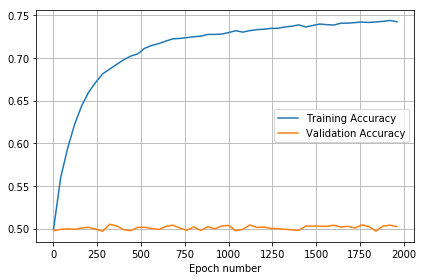

[[4783 4699]
 [5215 5303]]

Validation Avg: [ 0.5043]
Train Avg: [ 0.742925]


[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]    [0]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]    [0]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]    [1]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]    [0]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 

Epoch 26/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6888 - binary_crossentropy: 0.6888 - acc: 0.5327 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.5010
Epoch 27/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6881 - binary_crossentropy: 0.6881 - acc: 0.5383 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_acc: 0.5030
Epoch 28/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - acc: 0.5402 - val_loss: 0.6999 - val_binary_crossentropy: 0.6999 - val_acc: 0.4971
Epoch 29/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6873 - binary_crossentropy: 0.6873 - acc: 0.5416 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_acc: 0.4985
Epoch 30/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - acc: 0.5429 - val_loss: 0.7009 - val_binary_crossentropy: 0.700

80000/80000 [==============================] - 2s 27us/step - loss: 0.6518 - binary_crossentropy: 0.6518 - acc: 0.6099 - val_loss: 0.7458 - val_binary_crossentropy: 0.7458 - val_acc: 0.4972
Epoch 107/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6517 - binary_crossentropy: 0.6517 - acc: 0.6101 - val_loss: 0.7383 - val_binary_crossentropy: 0.7383 - val_acc: 0.4982
Epoch 108/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6508 - binary_crossentropy: 0.6508 - acc: 0.6113 - val_loss: 0.7467 - val_binary_crossentropy: 0.7467 - val_acc: 0.5004
Epoch 109/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6503 - binary_crossentropy: 0.6503 - acc: 0.6138 - val_loss: 0.7437 - val_binary_crossentropy: 0.7437 - val_acc: 0.4956
Epoch 110/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6500 - binary_crossentropy: 0.6500 - acc: 0.6144 - val_loss: 0.7467 - val_binary_crossentropy: 0.7467 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6322 - binary_crossentropy: 0.6322 - acc: 0.6339 - val_loss: 0.7717 - val_binary_crossentropy: 0.7717 - val_acc: 0.4929
Epoch 147/3000
80000/80000 [==============================] - 3s 33us/step - loss: 0.6309 - binary_crossentropy: 0.6309 - acc: 0.6362 - val_loss: 0.7788 - val_binary_crossentropy: 0.7788 - val_acc: 0.4946
Epoch 148/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6305 - binary_crossentropy: 0.6305 - acc: 0.6354 - val_loss: 0.7724 - val_binary_crossentropy: 0.7724 - val_acc: 0.4988
Epoch 149/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6309 - binary_crossentropy: 0.6309 - acc: 0.6368 - val_loss: 0.7745 - val_binary_crossentropy: 0.7745 - val_acc: 0.4963
Epoch 150/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6294 - binary_crossentropy: 0.6294 - acc: 0.6386 - val_loss: 0.7758 - val_binary_crossentropy: 0.7758 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.6132 - binary_crossentropy: 0.6132 - acc: 0.6550 - val_loss: 0.8093 - val_binary_crossentropy: 0.8093 - val_acc: 0.4949
Epoch 187/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6136 - binary_crossentropy: 0.6136 - acc: 0.6549 - val_loss: 0.8092 - val_binary_crossentropy: 0.8092 - val_acc: 0.4947
Epoch 188/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6131 - binary_crossentropy: 0.6131 - acc: 0.6560 - val_loss: 0.7970 - val_binary_crossentropy: 0.7970 - val_acc: 0.4990
Epoch 189/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.6129 - binary_crossentropy: 0.6129 - acc: 0.6545 - val_loss: 0.8028 - val_binary_crossentropy: 0.8028 - val_acc: 0.4957
Epoch 190/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.6120 - binary_crossentropy: 0.6120 - acc: 0.6553 - val_loss: 0.7982 - val_binary_crossentropy: 0.7982 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5996 - binary_crossentropy: 0.5996 - acc: 0.6692 - val_loss: 0.8236 - val_binary_crossentropy: 0.8236 - val_acc: 0.5000
Epoch 227/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5988 - binary_crossentropy: 0.5988 - acc: 0.6683 - val_loss: 0.8281 - val_binary_crossentropy: 0.8281 - val_acc: 0.4974
Epoch 228/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5991 - binary_crossentropy: 0.5991 - acc: 0.6693 - val_loss: 0.8238 - val_binary_crossentropy: 0.8238 - val_acc: 0.4984
Epoch 229/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6690 - val_loss: 0.8283 - val_binary_crossentropy: 0.8283 - val_acc: 0.4969
Epoch 230/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6692 - val_loss: 0.8280 - val_binary_crossentropy: 0.8280 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5880 - binary_crossentropy: 0.5880 - acc: 0.6784 - val_loss: 0.8465 - val_binary_crossentropy: 0.8465 - val_acc: 0.4986
Epoch 267/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5874 - binary_crossentropy: 0.5874 - acc: 0.6794 - val_loss: 0.8458 - val_binary_crossentropy: 0.8458 - val_acc: 0.4971
Epoch 268/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5873 - binary_crossentropy: 0.5873 - acc: 0.6794 - val_loss: 0.8495 - val_binary_crossentropy: 0.8495 - val_acc: 0.4981
Epoch 269/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5871 - binary_crossentropy: 0.5871 - acc: 0.6778 - val_loss: 0.8566 - val_binary_crossentropy: 0.8566 - val_acc: 0.5000
Epoch 270/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5870 - binary_crossentropy: 0.5870 - acc: 0.6781 - val_loss: 0.8413 - val_binary_crossentropy: 0.8413 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5780 - binary_crossentropy: 0.5780 - acc: 0.6864 - val_loss: 0.8595 - val_binary_crossentropy: 0.8595 - val_acc: 0.4998
Epoch 307/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5787 - binary_crossentropy: 0.5787 - acc: 0.6849 - val_loss: 0.8682 - val_binary_crossentropy: 0.8682 - val_acc: 0.4995
Epoch 308/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5780 - binary_crossentropy: 0.5780 - acc: 0.6873 - val_loss: 0.8687 - val_binary_crossentropy: 0.8687 - val_acc: 0.5008
Epoch 309/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5782 - binary_crossentropy: 0.5782 - acc: 0.6880 - val_loss: 0.8615 - val_binary_crossentropy: 0.8615 - val_acc: 0.5012
Epoch 310/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5777 - binary_crossentropy: 0.5777 - acc: 0.6868 - val_loss: 0.8672 - val_binary_crossentropy: 0.8672 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5707 - binary_crossentropy: 0.5707 - acc: 0.6938 - val_loss: 0.8907 - val_binary_crossentropy: 0.8907 - val_acc: 0.4989
Epoch 347/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5705 - binary_crossentropy: 0.5705 - acc: 0.6944 - val_loss: 0.8959 - val_binary_crossentropy: 0.8959 - val_acc: 0.5022
Epoch 348/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5695 - binary_crossentropy: 0.5695 - acc: 0.6933 - val_loss: 0.8901 - val_binary_crossentropy: 0.8901 - val_acc: 0.5009
Epoch 349/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5706 - binary_crossentropy: 0.5706 - acc: 0.6921 - val_loss: 0.8830 - val_binary_crossentropy: 0.8830 - val_acc: 0.5000
Epoch 350/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5697 - binary_crossentropy: 0.5697 - acc: 0.6948 - val_loss: 0.8901 - val_binary_crossentropy: 0.8901 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5637 - binary_crossentropy: 0.5637 - acc: 0.6987 - val_loss: 0.8962 - val_binary_crossentropy: 0.8962 - val_acc: 0.5012
Epoch 387/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5629 - binary_crossentropy: 0.5629 - acc: 0.6991 - val_loss: 0.9059 - val_binary_crossentropy: 0.9059 - val_acc: 0.5021
Epoch 388/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5629 - binary_crossentropy: 0.5629 - acc: 0.6981 - val_loss: 0.9038 - val_binary_crossentropy: 0.9038 - val_acc: 0.5009
Epoch 389/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5631 - binary_crossentropy: 0.5631 - acc: 0.6982 - val_loss: 0.8917 - val_binary_crossentropy: 0.8917 - val_acc: 0.4962
Epoch 390/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5627 - binary_crossentropy: 0.5627 - acc: 0.6982 - val_loss: 0.9047 - val_binary_crossentropy: 0.9047 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5581 - binary_crossentropy: 0.5581 - acc: 0.7013 - val_loss: 0.9123 - val_binary_crossentropy: 0.9123 - val_acc: 0.5044
Epoch 427/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5579 - binary_crossentropy: 0.5579 - acc: 0.7032 - val_loss: 0.9097 - val_binary_crossentropy: 0.9097 - val_acc: 0.5018
Epoch 428/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5588 - binary_crossentropy: 0.5588 - acc: 0.7021 - val_loss: 0.9076 - val_binary_crossentropy: 0.9076 - val_acc: 0.5035
Epoch 429/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5581 - binary_crossentropy: 0.5581 - acc: 0.7032 - val_loss: 0.9146 - val_binary_crossentropy: 0.9146 - val_acc: 0.5028
Epoch 430/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5576 - binary_crossentropy: 0.5576 - acc: 0.7027 - val_loss: 0.9076 - val_binary_crossentropy: 0.9076 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5526 - binary_crossentropy: 0.5526 - acc: 0.7068 - val_loss: 0.9337 - val_binary_crossentropy: 0.9337 - val_acc: 0.5015
Epoch 467/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5532 - binary_crossentropy: 0.5532 - acc: 0.7057 - val_loss: 0.9418 - val_binary_crossentropy: 0.9418 - val_acc: 0.5041
Epoch 468/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5525 - binary_crossentropy: 0.5525 - acc: 0.7052 - val_loss: 0.9288 - val_binary_crossentropy: 0.9288 - val_acc: 0.5056
Epoch 469/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5523 - binary_crossentropy: 0.5523 - acc: 0.7064 - val_loss: 0.9299 - val_binary_crossentropy: 0.9299 - val_acc: 0.5009
Epoch 470/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5524 - binary_crossentropy: 0.5524 - acc: 0.7062 - val_loss: 0.9335 - val_binary_crossentropy: 0.9335 - val_ac

80000/80000 [==============================] - 2s 27us/step - loss: 0.5476 - binary_crossentropy: 0.5476 - acc: 0.7101 - val_loss: 0.9414 - val_binary_crossentropy: 0.9414 - val_acc: 0.5023
Epoch 507/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5466 - binary_crossentropy: 0.5466 - acc: 0.7107 - val_loss: 0.9549 - val_binary_crossentropy: 0.9549 - val_acc: 0.4996
Epoch 508/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5472 - binary_crossentropy: 0.5472 - acc: 0.7103 - val_loss: 0.9423 - val_binary_crossentropy: 0.9423 - val_acc: 0.5006
Epoch 509/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5474 - binary_crossentropy: 0.5474 - acc: 0.7113 - val_loss: 0.9584 - val_binary_crossentropy: 0.9584 - val_acc: 0.5017
Epoch 510/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5479 - binary_crossentropy: 0.5479 - acc: 0.7117 - val_loss: 0.9484 - val_binary_crossentropy: 0.9484 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5435 - binary_crossentropy: 0.5435 - acc: 0.7137 - val_loss: 0.9545 - val_binary_crossentropy: 0.9545 - val_acc: 0.5027
Epoch 547/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5421 - binary_crossentropy: 0.5421 - acc: 0.7140 - val_loss: 0.9690 - val_binary_crossentropy: 0.9690 - val_acc: 0.5065
Epoch 548/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5423 - binary_crossentropy: 0.5423 - acc: 0.7136 - val_loss: 0.9680 - val_binary_crossentropy: 0.9680 - val_acc: 0.5015
Epoch 549/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5427 - binary_crossentropy: 0.5427 - acc: 0.7135 - val_loss: 0.9624 - val_binary_crossentropy: 0.9624 - val_acc: 0.5003
Epoch 550/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5427 - binary_crossentropy: 0.5427 - acc: 0.7128 - val_loss: 0.9725 - val_binary_crossentropy: 0.9725 - val_ac

80000/80000 [==============================] - 2s 27us/step - loss: 0.5377 - binary_crossentropy: 0.5377 - acc: 0.7193 - val_loss: 0.9852 - val_binary_crossentropy: 0.9852 - val_acc: 0.5024
Epoch 587/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5385 - binary_crossentropy: 0.5385 - acc: 0.7167 - val_loss: 0.9603 - val_binary_crossentropy: 0.9603 - val_acc: 0.4967
Epoch 588/3000
80000/80000 [==============================] - 3s 32us/step - loss: 0.5384 - binary_crossentropy: 0.5384 - acc: 0.7181 - val_loss: 0.9817 - val_binary_crossentropy: 0.9817 - val_acc: 0.4988
Epoch 589/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5395 - binary_crossentropy: 0.5395 - acc: 0.7166 - val_loss: 0.9675 - val_binary_crossentropy: 0.9675 - val_acc: 0.4999
Epoch 590/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5384 - binary_crossentropy: 0.5384 - acc: 0.7179 - val_loss: 0.9812 - val_binary_crossentropy: 0.9812 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5351 - binary_crossentropy: 0.5351 - acc: 0.7193 - val_loss: 0.9884 - val_binary_crossentropy: 0.9884 - val_acc: 0.4995
Epoch 627/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5351 - binary_crossentropy: 0.5351 - acc: 0.7199 - val_loss: 0.9921 - val_binary_crossentropy: 0.9921 - val_acc: 0.4992
Epoch 628/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5344 - binary_crossentropy: 0.5344 - acc: 0.7197 - val_loss: 0.9740 - val_binary_crossentropy: 0.9740 - val_acc: 0.4985
Epoch 629/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5358 - binary_crossentropy: 0.5358 - acc: 0.7207 - val_loss: 0.9761 - val_binary_crossentropy: 0.9761 - val_acc: 0.5014
Epoch 630/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5354 - binary_crossentropy: 0.5354 - acc: 0.7204 - val_loss: 0.9946 - val_binary_crossentropy: 0.9946 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5316 - binary_crossentropy: 0.5316 - acc: 0.7224 - val_loss: 1.0081 - val_binary_crossentropy: 1.0081 - val_acc: 0.5001
Epoch 667/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5314 - binary_crossentropy: 0.5314 - acc: 0.7219 - val_loss: 0.9934 - val_binary_crossentropy: 0.9934 - val_acc: 0.5007
Epoch 668/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5312 - binary_crossentropy: 0.5312 - acc: 0.7244 - val_loss: 1.0070 - val_binary_crossentropy: 1.0070 - val_acc: 0.4997
Epoch 669/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5318 - binary_crossentropy: 0.5318 - acc: 0.7214 - val_loss: 1.0022 - val_binary_crossentropy: 1.0022 - val_acc: 0.4994
Epoch 670/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5308 - binary_crossentropy: 0.5308 - acc: 0.7235 - val_loss: 1.0070 - val_binary_crossentropy: 1.0070 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5281 - binary_crossentropy: 0.5281 - acc: 0.7255 - val_loss: 1.0119 - val_binary_crossentropy: 1.0119 - val_acc: 0.5013
Epoch 707/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5280 - binary_crossentropy: 0.5280 - acc: 0.7261 - val_loss: 1.0071 - val_binary_crossentropy: 1.0071 - val_acc: 0.4999
Epoch 708/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5284 - binary_crossentropy: 0.5284 - acc: 0.7247 - val_loss: 1.0259 - val_binary_crossentropy: 1.0259 - val_acc: 0.5001
Epoch 709/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5280 - binary_crossentropy: 0.5280 - acc: 0.7276 - val_loss: 1.0106 - val_binary_crossentropy: 1.0106 - val_acc: 0.5011
Epoch 710/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5283 - binary_crossentropy: 0.5283 - acc: 0.7247 - val_loss: 1.0163 - val_binary_crossentropy: 1.0163 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5257 - binary_crossentropy: 0.5257 - acc: 0.7269 - val_loss: 1.0387 - val_binary_crossentropy: 1.0387 - val_acc: 0.4985
Epoch 747/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5257 - binary_crossentropy: 0.5257 - acc: 0.7271 - val_loss: 1.0162 - val_binary_crossentropy: 1.0162 - val_acc: 0.5006
Epoch 748/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5258 - binary_crossentropy: 0.5258 - acc: 0.7281 - val_loss: 1.0182 - val_binary_crossentropy: 1.0182 - val_acc: 0.5014
Epoch 749/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5255 - binary_crossentropy: 0.5255 - acc: 0.7282 - val_loss: 1.0117 - val_binary_crossentropy: 1.0117 - val_acc: 0.5021
Epoch 750/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5257 - binary_crossentropy: 0.5257 - acc: 0.7274 - val_loss: 1.0181 - val_binary_crossentropy: 1.0181 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5228 - binary_crossentropy: 0.5228 - acc: 0.7291 - val_loss: 1.0473 - val_binary_crossentropy: 1.0473 - val_acc: 0.5023
Epoch 787/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5235 - binary_crossentropy: 0.5235 - acc: 0.7289 - val_loss: 1.0386 - val_binary_crossentropy: 1.0386 - val_acc: 0.5029
Epoch 788/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5225 - binary_crossentropy: 0.5225 - acc: 0.7300 - val_loss: 1.0473 - val_binary_crossentropy: 1.0473 - val_acc: 0.4974
Epoch 789/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5229 - binary_crossentropy: 0.5229 - acc: 0.7290 - val_loss: 1.0246 - val_binary_crossentropy: 1.0246 - val_acc: 0.5020
Epoch 790/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5225 - binary_crossentropy: 0.5225 - acc: 0.7297 - val_loss: 1.0367 - val_binary_crossentropy: 1.0367 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5198 - binary_crossentropy: 0.5198 - acc: 0.7316 - val_loss: 1.0401 - val_binary_crossentropy: 1.0401 - val_acc: 0.5030
Epoch 827/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5205 - binary_crossentropy: 0.5205 - acc: 0.7307 - val_loss: 1.0391 - val_binary_crossentropy: 1.0391 - val_acc: 0.5013
Epoch 828/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5203 - binary_crossentropy: 0.5203 - acc: 0.7306 - val_loss: 1.0318 - val_binary_crossentropy: 1.0318 - val_acc: 0.5031
Epoch 829/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5198 - binary_crossentropy: 0.5198 - acc: 0.7315 - val_loss: 1.0536 - val_binary_crossentropy: 1.0536 - val_acc: 0.4991
Epoch 830/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7296 - val_loss: 1.0406 - val_binary_crossentropy: 1.0406 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5178 - binary_crossentropy: 0.5178 - acc: 0.7325 - val_loss: 1.0344 - val_binary_crossentropy: 1.0344 - val_acc: 0.5039
Epoch 867/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5177 - binary_crossentropy: 0.5177 - acc: 0.7325 - val_loss: 1.0400 - val_binary_crossentropy: 1.0400 - val_acc: 0.4992
Epoch 868/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5175 - binary_crossentropy: 0.5175 - acc: 0.7334 - val_loss: 1.0468 - val_binary_crossentropy: 1.0468 - val_acc: 0.5017
Epoch 869/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5183 - binary_crossentropy: 0.5183 - acc: 0.7320 - val_loss: 1.0481 - val_binary_crossentropy: 1.0481 - val_acc: 0.5000
Epoch 870/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5185 - binary_crossentropy: 0.5185 - acc: 0.7322 - val_loss: 1.0593 - val_binary_crossentropy: 1.0593 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5159 - binary_crossentropy: 0.5159 - acc: 0.7329 - val_loss: 1.0455 - val_binary_crossentropy: 1.0455 - val_acc: 0.5005
Epoch 907/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5151 - binary_crossentropy: 0.5151 - acc: 0.7338 - val_loss: 1.0556 - val_binary_crossentropy: 1.0556 - val_acc: 0.5000
Epoch 908/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5157 - binary_crossentropy: 0.5157 - acc: 0.7335 - val_loss: 1.0472 - val_binary_crossentropy: 1.0472 - val_acc: 0.5017
Epoch 909/3000
80000/80000 [==============================] - 2s 29us/step - loss: 0.5161 - binary_crossentropy: 0.5161 - acc: 0.7338 - val_loss: 1.0460 - val_binary_crossentropy: 1.0460 - val_acc: 0.5002
Epoch 910/3000
80000/80000 [==============================] - 2s 28us/step - loss: 0.5151 - binary_crossentropy: 0.5151 - acc: 0.7352 - val_loss: 1.0615 - val_binary_crossentropy: 1.0615 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5143 - binary_crossentropy: 0.5143 - acc: 0.7357 - val_loss: 1.0713 - val_binary_crossentropy: 1.0713 - val_acc: 0.4991
Epoch 947/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5144 - binary_crossentropy: 0.5144 - acc: 0.7351 - val_loss: 1.0757 - val_binary_crossentropy: 1.0757 - val_acc: 0.5025
Epoch 948/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5141 - binary_crossentropy: 0.5141 - acc: 0.7341 - val_loss: 1.0550 - val_binary_crossentropy: 1.0550 - val_acc: 0.5019
Epoch 949/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5134 - binary_crossentropy: 0.5134 - acc: 0.7359 - val_loss: 1.0567 - val_binary_crossentropy: 1.0567 - val_acc: 0.4985
Epoch 950/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5140 - binary_crossentropy: 0.5140 - acc: 0.7351 - val_loss: 1.0748 - val_binary_crossentropy: 1.0748 - val_ac

80000/80000 [==============================] - 2s 26us/step - loss: 0.5120 - binary_crossentropy: 0.5120 - acc: 0.7363 - val_loss: 1.0678 - val_binary_crossentropy: 1.0678 - val_acc: 0.5045
Epoch 987/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5130 - binary_crossentropy: 0.5130 - acc: 0.7344 - val_loss: 1.0650 - val_binary_crossentropy: 1.0650 - val_acc: 0.5009
Epoch 988/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5126 - binary_crossentropy: 0.5126 - acc: 0.7356 - val_loss: 1.0558 - val_binary_crossentropy: 1.0558 - val_acc: 0.5000
Epoch 989/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5119 - binary_crossentropy: 0.5119 - acc: 0.7355 - val_loss: 1.0516 - val_binary_crossentropy: 1.0516 - val_acc: 0.5025
Epoch 990/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5127 - binary_crossentropy: 0.5127 - acc: 0.7367 - val_loss: 1.0600 - val_binary_crossentropy: 1.0600 - val_ac

Epoch 1026/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5104 - binary_crossentropy: 0.5104 - acc: 0.7375 - val_loss: 1.0820 - val_binary_crossentropy: 1.0820 - val_acc: 0.4991
Epoch 1027/3000
80000/80000 [==============================] - 3s 32us/step - loss: 0.5109 - binary_crossentropy: 0.5109 - acc: 0.7367 - val_loss: 1.0503 - val_binary_crossentropy: 1.0503 - val_acc: 0.5014
Epoch 1028/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5108 - binary_crossentropy: 0.5108 - acc: 0.7377 - val_loss: 1.0932 - val_binary_crossentropy: 1.0932 - val_acc: 0.4988
Epoch 1029/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5103 - binary_crossentropy: 0.5103 - acc: 0.7384 - val_loss: 1.0813 - val_binary_crossentropy: 1.0813 - val_acc: 0.4993
Epoch 1030/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5116 - binary_crossentropy: 0.5116 - acc: 0.7373 - val_loss: 1.0863 - val_binary_crossentr

Epoch 1066/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5100 - binary_crossentropy: 0.5100 - acc: 0.7373 - val_loss: 1.0794 - val_binary_crossentropy: 1.0794 - val_acc: 0.5007
Epoch 1067/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5093 - binary_crossentropy: 0.5093 - acc: 0.7374 - val_loss: 1.0862 - val_binary_crossentropy: 1.0862 - val_acc: 0.4986
Epoch 1068/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5097 - binary_crossentropy: 0.5097 - acc: 0.7376 - val_loss: 1.0915 - val_binary_crossentropy: 1.0915 - val_acc: 0.4979
Epoch 1069/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5093 - binary_crossentropy: 0.5093 - acc: 0.7382 - val_loss: 1.0840 - val_binary_crossentropy: 1.0840 - val_acc: 0.4977
Epoch 1070/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5094 - binary_crossentropy: 0.5094 - acc: 0.7388 - val_loss: 1.0898 - val_binary_crossentr

Epoch 1106/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5087 - binary_crossentropy: 0.5087 - acc: 0.7396 - val_loss: 1.0844 - val_binary_crossentropy: 1.0844 - val_acc: 0.4988
Epoch 1107/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5079 - binary_crossentropy: 0.5079 - acc: 0.7388 - val_loss: 1.0890 - val_binary_crossentropy: 1.0890 - val_acc: 0.4995
Epoch 1108/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5087 - binary_crossentropy: 0.5087 - acc: 0.7386 - val_loss: 1.1015 - val_binary_crossentropy: 1.1015 - val_acc: 0.4998
Epoch 1109/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5090 - binary_crossentropy: 0.5090 - acc: 0.7392 - val_loss: 1.0816 - val_binary_crossentropy: 1.0816 - val_acc: 0.5014
Epoch 1110/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5083 - binary_crossentropy: 0.5083 - acc: 0.7388 - val_loss: 1.1097 - val_binary_crossentr

Epoch 1146/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5069 - binary_crossentropy: 0.5069 - acc: 0.7409 - val_loss: 1.0938 - val_binary_crossentropy: 1.0938 - val_acc: 0.4986
Epoch 1147/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5071 - binary_crossentropy: 0.5071 - acc: 0.7394 - val_loss: 1.0945 - val_binary_crossentropy: 1.0945 - val_acc: 0.4990
Epoch 1148/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5071 - binary_crossentropy: 0.5071 - acc: 0.7391 - val_loss: 1.0861 - val_binary_crossentropy: 1.0861 - val_acc: 0.4995
Epoch 1149/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5069 - binary_crossentropy: 0.5069 - acc: 0.7409 - val_loss: 1.0717 - val_binary_crossentropy: 1.0717 - val_acc: 0.4991
Epoch 1150/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5073 - binary_crossentropy: 0.5073 - acc: 0.7389 - val_loss: 1.1076 - val_binary_crossentr

Epoch 1186/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5064 - binary_crossentropy: 0.5064 - acc: 0.7389 - val_loss: 1.1029 - val_binary_crossentropy: 1.1029 - val_acc: 0.4963
Epoch 1187/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5063 - binary_crossentropy: 0.5063 - acc: 0.7399 - val_loss: 1.0824 - val_binary_crossentropy: 1.0824 - val_acc: 0.5003
Epoch 1188/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5057 - binary_crossentropy: 0.5057 - acc: 0.7399 - val_loss: 1.0989 - val_binary_crossentropy: 1.0989 - val_acc: 0.5009
Epoch 1189/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5069 - binary_crossentropy: 0.5069 - acc: 0.7388 - val_loss: 1.0896 - val_binary_crossentropy: 1.0896 - val_acc: 0.4988
Epoch 1190/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5066 - binary_crossentropy: 0.5066 - acc: 0.7399 - val_loss: 1.0803 - val_binary_crossentr

Epoch 1226/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5052 - binary_crossentropy: 0.5052 - acc: 0.7406 - val_loss: 1.1019 - val_binary_crossentropy: 1.1019 - val_acc: 0.4954
Epoch 1227/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5064 - binary_crossentropy: 0.5064 - acc: 0.7393 - val_loss: 1.0932 - val_binary_crossentropy: 1.0932 - val_acc: 0.4974
Epoch 1228/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5057 - binary_crossentropy: 0.5057 - acc: 0.7390 - val_loss: 1.0897 - val_binary_crossentropy: 1.0897 - val_acc: 0.5018
Epoch 1229/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5057 - binary_crossentropy: 0.5057 - acc: 0.7410 - val_loss: 1.1221 - val_binary_crossentropy: 1.1221 - val_acc: 0.4974
Epoch 1230/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5049 - binary_crossentropy: 0.5049 - acc: 0.7413 - val_loss: 1.0982 - val_binary_crossentr

Epoch 1266/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5042 - binary_crossentropy: 0.5042 - acc: 0.7405 - val_loss: 1.1069 - val_binary_crossentropy: 1.1069 - val_acc: 0.5008
Epoch 1267/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5043 - binary_crossentropy: 0.5043 - acc: 0.7404 - val_loss: 1.1047 - val_binary_crossentropy: 1.1047 - val_acc: 0.4966
Epoch 1268/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5041 - binary_crossentropy: 0.5041 - acc: 0.7399 - val_loss: 1.1270 - val_binary_crossentropy: 1.1270 - val_acc: 0.4988
Epoch 1269/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5045 - binary_crossentropy: 0.5045 - acc: 0.7414 - val_loss: 1.0953 - val_binary_crossentropy: 1.0953 - val_acc: 0.4998
Epoch 1270/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5045 - binary_crossentropy: 0.5045 - acc: 0.7418 - val_loss: 1.1091 - val_binary_crossentr

Epoch 1306/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5038 - binary_crossentropy: 0.5038 - acc: 0.7414 - val_loss: 1.1080 - val_binary_crossentropy: 1.1080 - val_acc: 0.4965
Epoch 1307/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5035 - binary_crossentropy: 0.5035 - acc: 0.7399 - val_loss: 1.1191 - val_binary_crossentropy: 1.1191 - val_acc: 0.4980
Epoch 1308/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5038 - binary_crossentropy: 0.5038 - acc: 0.7416 - val_loss: 1.1269 - val_binary_crossentropy: 1.1269 - val_acc: 0.4972
Epoch 1309/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5034 - binary_crossentropy: 0.5034 - acc: 0.7418 - val_loss: 1.1145 - val_binary_crossentropy: 1.1145 - val_acc: 0.5001
Epoch 1310/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5046 - binary_crossentropy: 0.5046 - acc: 0.7416 - val_loss: 1.1108 - val_binary_crossentr

Epoch 1346/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5028 - binary_crossentropy: 0.5028 - acc: 0.7422 - val_loss: 1.1058 - val_binary_crossentropy: 1.1058 - val_acc: 0.4959
Epoch 1347/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5028 - binary_crossentropy: 0.5028 - acc: 0.7423 - val_loss: 1.1141 - val_binary_crossentropy: 1.1141 - val_acc: 0.4953
Epoch 1348/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5034 - binary_crossentropy: 0.5034 - acc: 0.7422 - val_loss: 1.0909 - val_binary_crossentropy: 1.0909 - val_acc: 0.4967
Epoch 1349/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5030 - binary_crossentropy: 0.5030 - acc: 0.7411 - val_loss: 1.1120 - val_binary_crossentropy: 1.1120 - val_acc: 0.4996
Epoch 1350/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5037 - binary_crossentropy: 0.5037 - acc: 0.7414 - val_loss: 1.1153 - val_binary_crossentr

Epoch 1386/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5017 - binary_crossentropy: 0.5017 - acc: 0.7423 - val_loss: 1.1196 - val_binary_crossentropy: 1.1196 - val_acc: 0.4991
Epoch 1387/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5033 - binary_crossentropy: 0.5033 - acc: 0.7419 - val_loss: 1.1251 - val_binary_crossentropy: 1.1251 - val_acc: 0.4951
Epoch 1388/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5015 - binary_crossentropy: 0.5015 - acc: 0.7432 - val_loss: 1.1404 - val_binary_crossentropy: 1.1404 - val_acc: 0.4949
Epoch 1389/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5019 - binary_crossentropy: 0.5019 - acc: 0.7437 - val_loss: 1.1183 - val_binary_crossentropy: 1.1183 - val_acc: 0.4978
Epoch 1390/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5018 - binary_crossentropy: 0.5018 - acc: 0.7430 - val_loss: 1.1307 - val_binary_crossentr

Epoch 1465/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5009 - binary_crossentropy: 0.5009 - acc: 0.7428 - val_loss: 1.1221 - val_binary_crossentropy: 1.1221 - val_acc: 0.4984
Epoch 1466/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5014 - binary_crossentropy: 0.5014 - acc: 0.7425 - val_loss: 1.1380 - val_binary_crossentropy: 1.1380 - val_acc: 0.4999
Epoch 1467/3000
80000/80000 [==============================] - 3s 33us/step - loss: 0.5015 - binary_crossentropy: 0.5015 - acc: 0.7441 - val_loss: 1.1049 - val_binary_crossentropy: 1.1049 - val_acc: 0.4998
Epoch 1468/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5004 - binary_crossentropy: 0.5004 - acc: 0.7422 - val_loss: 1.1037 - val_binary_crossentropy: 1.1037 - val_acc: 0.4973
Epoch 1469/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5008 - binary_crossentropy: 0.5008 - acc: 0.7437 - val_loss: 1.1069 - val_binary_crossentr

Epoch 1505/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5001 - binary_crossentropy: 0.5001 - acc: 0.7426 - val_loss: 1.1398 - val_binary_crossentropy: 1.1398 - val_acc: 0.5013
Epoch 1506/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5006 - binary_crossentropy: 0.5006 - acc: 0.7442 - val_loss: 1.1265 - val_binary_crossentropy: 1.1265 - val_acc: 0.4991
Epoch 1507/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4999 - binary_crossentropy: 0.4999 - acc: 0.7429 - val_loss: 1.1284 - val_binary_crossentropy: 1.1284 - val_acc: 0.4974
Epoch 1508/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.5003 - binary_crossentropy: 0.5003 - acc: 0.7443 - val_loss: 1.1327 - val_binary_crossentropy: 1.1327 - val_acc: 0.4982
Epoch 1509/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5002 - binary_crossentropy: 0.5002 - acc: 0.7444 - val_loss: 1.1248 - val_binary_crossentr

Epoch 1545/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5002 - binary_crossentropy: 0.5002 - acc: 0.7428 - val_loss: 1.1304 - val_binary_crossentropy: 1.1304 - val_acc: 0.5000
Epoch 1546/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4998 - binary_crossentropy: 0.4998 - acc: 0.7450 - val_loss: 1.1535 - val_binary_crossentropy: 1.1535 - val_acc: 0.4989
Epoch 1547/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.5000 - binary_crossentropy: 0.5000 - acc: 0.7444 - val_loss: 1.1389 - val_binary_crossentropy: 1.1389 - val_acc: 0.4981
Epoch 1548/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4997 - binary_crossentropy: 0.4997 - acc: 0.7443 - val_loss: 1.1288 - val_binary_crossentropy: 1.1288 - val_acc: 0.4950
Epoch 1549/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4995 - binary_crossentropy: 0.4995 - acc: 0.7434 - val_loss: 1.1283 - val_binary_crossentr

Epoch 1585/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4993 - binary_crossentropy: 0.4993 - acc: 0.7436 - val_loss: 1.1285 - val_binary_crossentropy: 1.1285 - val_acc: 0.4967
Epoch 1586/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4988 - binary_crossentropy: 0.4988 - acc: 0.7444 - val_loss: 1.1262 - val_binary_crossentropy: 1.1262 - val_acc: 0.5002
Epoch 1587/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4993 - binary_crossentropy: 0.4993 - acc: 0.7448 - val_loss: 1.1229 - val_binary_crossentropy: 1.1229 - val_acc: 0.4968
Epoch 1588/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4993 - binary_crossentropy: 0.4993 - acc: 0.7441 - val_loss: 1.1309 - val_binary_crossentropy: 1.1309 - val_acc: 0.4976
Epoch 1589/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4996 - binary_crossentropy: 0.4996 - acc: 0.7439 - val_loss: 1.1298 - val_binary_crossentr

Epoch 1625/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4985 - binary_crossentropy: 0.4985 - acc: 0.7444 - val_loss: 1.1288 - val_binary_crossentropy: 1.1288 - val_acc: 0.4966
Epoch 1626/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4986 - binary_crossentropy: 0.4986 - acc: 0.7449 - val_loss: 1.1240 - val_binary_crossentropy: 1.1240 - val_acc: 0.5000
Epoch 1627/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4982 - binary_crossentropy: 0.4982 - acc: 0.7452 - val_loss: 1.1290 - val_binary_crossentropy: 1.1290 - val_acc: 0.4977
Epoch 1628/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4986 - binary_crossentropy: 0.4986 - acc: 0.7448 - val_loss: 1.1252 - val_binary_crossentropy: 1.1252 - val_acc: 0.4962
Epoch 1629/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4981 - binary_crossentropy: 0.4981 - acc: 0.7446 - val_loss: 1.1520 - val_binary_crossentr

Epoch 1665/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4981 - binary_crossentropy: 0.4981 - acc: 0.7469 - val_loss: 1.1499 - val_binary_crossentropy: 1.1499 - val_acc: 0.4964
Epoch 1666/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4983 - binary_crossentropy: 0.4983 - acc: 0.7443 - val_loss: 1.1347 - val_binary_crossentropy: 1.1347 - val_acc: 0.4991
Epoch 1667/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4975 - binary_crossentropy: 0.4975 - acc: 0.7446 - val_loss: 1.1316 - val_binary_crossentropy: 1.1316 - val_acc: 0.4963
Epoch 1668/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4979 - binary_crossentropy: 0.4979 - acc: 0.7451 - val_loss: 1.1337 - val_binary_crossentropy: 1.1337 - val_acc: 0.4976
Epoch 1669/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4984 - binary_crossentropy: 0.4984 - acc: 0.7449 - val_loss: 1.1446 - val_binary_crossentr

Epoch 1705/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4973 - binary_crossentropy: 0.4973 - acc: 0.7451 - val_loss: 1.1346 - val_binary_crossentropy: 1.1346 - val_acc: 0.4998
Epoch 1706/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4966 - binary_crossentropy: 0.4966 - acc: 0.7470 - val_loss: 1.1399 - val_binary_crossentropy: 1.1399 - val_acc: 0.4966
Epoch 1707/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4963 - binary_crossentropy: 0.4963 - acc: 0.7478 - val_loss: 1.1497 - val_binary_crossentropy: 1.1497 - val_acc: 0.4981
Epoch 1708/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4979 - binary_crossentropy: 0.4979 - acc: 0.7448 - val_loss: 1.1335 - val_binary_crossentropy: 1.1335 - val_acc: 0.4998
Epoch 1709/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4965 - binary_crossentropy: 0.4965 - acc: 0.7460 - val_loss: 1.1376 - val_binary_crossentr

Epoch 1745/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4971 - binary_crossentropy: 0.4971 - acc: 0.7473 - val_loss: 1.1438 - val_binary_crossentropy: 1.1438 - val_acc: 0.4963
Epoch 1746/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4973 - binary_crossentropy: 0.4973 - acc: 0.7460 - val_loss: 1.1347 - val_binary_crossentropy: 1.1347 - val_acc: 0.4983
Epoch 1747/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4967 - binary_crossentropy: 0.4967 - acc: 0.7470 - val_loss: 1.1400 - val_binary_crossentropy: 1.1400 - val_acc: 0.4994
Epoch 1748/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4965 - binary_crossentropy: 0.4965 - acc: 0.7457 - val_loss: 1.1326 - val_binary_crossentropy: 1.1326 - val_acc: 0.4991
Epoch 1749/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4968 - binary_crossentropy: 0.4968 - acc: 0.7457 - val_loss: 1.1472 - val_binary_crossentr

Epoch 1785/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4975 - binary_crossentropy: 0.4975 - acc: 0.7464 - val_loss: 1.1417 - val_binary_crossentropy: 1.1417 - val_acc: 0.5013
Epoch 1786/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4964 - binary_crossentropy: 0.4964 - acc: 0.7469 - val_loss: 1.1505 - val_binary_crossentropy: 1.1505 - val_acc: 0.5009
Epoch 1787/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4963 - binary_crossentropy: 0.4963 - acc: 0.7467 - val_loss: 1.1312 - val_binary_crossentropy: 1.1312 - val_acc: 0.5002
Epoch 1788/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4964 - binary_crossentropy: 0.4964 - acc: 0.7462 - val_loss: 1.1271 - val_binary_crossentropy: 1.1271 - val_acc: 0.4987
Epoch 1789/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4972 - binary_crossentropy: 0.4972 - acc: 0.7462 - val_loss: 1.1642 - val_binary_crossentr

Epoch 1825/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4964 - binary_crossentropy: 0.4964 - acc: 0.7477 - val_loss: 1.1569 - val_binary_crossentropy: 1.1569 - val_acc: 0.4981
Epoch 1826/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4959 - binary_crossentropy: 0.4959 - acc: 0.7464 - val_loss: 1.1410 - val_binary_crossentropy: 1.1410 - val_acc: 0.4998
Epoch 1827/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4961 - binary_crossentropy: 0.4961 - acc: 0.7461 - val_loss: 1.1603 - val_binary_crossentropy: 1.1603 - val_acc: 0.4931
Epoch 1828/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4957 - binary_crossentropy: 0.4957 - acc: 0.7458 - val_loss: 1.1353 - val_binary_crossentropy: 1.1353 - val_acc: 0.4983
Epoch 1829/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4958 - binary_crossentropy: 0.4958 - acc: 0.7458 - val_loss: 1.1452 - val_binary_crossentr

Epoch 1865/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4959 - binary_crossentropy: 0.4959 - acc: 0.7452 - val_loss: 1.1390 - val_binary_crossentropy: 1.1390 - val_acc: 0.4998
Epoch 1866/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4958 - binary_crossentropy: 0.4958 - acc: 0.7474 - val_loss: 1.1307 - val_binary_crossentropy: 1.1307 - val_acc: 0.5017
Epoch 1867/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4951 - binary_crossentropy: 0.4951 - acc: 0.7469 - val_loss: 1.1305 - val_binary_crossentropy: 1.1305 - val_acc: 0.4995
Epoch 1868/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4960 - binary_crossentropy: 0.4960 - acc: 0.7468 - val_loss: 1.1368 - val_binary_crossentropy: 1.1368 - val_acc: 0.4964
Epoch 1869/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4950 - binary_crossentropy: 0.4950 - acc: 0.7479 - val_loss: 1.1383 - val_binary_crossentr

Epoch 1905/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4958 - binary_crossentropy: 0.4958 - acc: 0.7469 - val_loss: 1.1485 - val_binary_crossentropy: 1.1485 - val_acc: 0.5002
Epoch 1906/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4954 - binary_crossentropy: 0.4954 - acc: 0.7479 - val_loss: 1.1463 - val_binary_crossentropy: 1.1463 - val_acc: 0.5025
Epoch 1907/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4963 - binary_crossentropy: 0.4963 - acc: 0.7460 - val_loss: 1.1402 - val_binary_crossentropy: 1.1402 - val_acc: 0.5010
Epoch 1908/3000
80000/80000 [==============================] - 3s 36us/step - loss: 0.4950 - binary_crossentropy: 0.4950 - acc: 0.7472 - val_loss: 1.1590 - val_binary_crossentropy: 1.1590 - val_acc: 0.4979
Epoch 1909/3000
80000/80000 [==============================] - 2s 30us/step - loss: 0.4946 - binary_crossentropy: 0.4946 - acc: 0.7474 - val_loss: 1.1624 - val_binary_crossentr

Epoch 1945/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7481 - val_loss: 1.1504 - val_binary_crossentropy: 1.1504 - val_acc: 0.4995
Epoch 1946/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7466 - val_loss: 1.1517 - val_binary_crossentropy: 1.1517 - val_acc: 0.5014
Epoch 1947/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4951 - binary_crossentropy: 0.4951 - acc: 0.7472 - val_loss: 1.1545 - val_binary_crossentropy: 1.1545 - val_acc: 0.4997
Epoch 1948/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7477 - val_loss: 1.1558 - val_binary_crossentropy: 1.1558 - val_acc: 0.5018
Epoch 1949/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4953 - binary_crossentropy: 0.4953 - acc: 0.7471 - val_loss: 1.1352 - val_binary_crossentr

Epoch 1985/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4945 - binary_crossentropy: 0.4945 - acc: 0.7476 - val_loss: 1.1477 - val_binary_crossentropy: 1.1477 - val_acc: 0.4993
Epoch 1986/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4941 - binary_crossentropy: 0.4941 - acc: 0.7480 - val_loss: 1.1621 - val_binary_crossentropy: 1.1621 - val_acc: 0.4995
Epoch 1987/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4943 - binary_crossentropy: 0.4943 - acc: 0.7478 - val_loss: 1.1482 - val_binary_crossentropy: 1.1482 - val_acc: 0.5010
Epoch 1988/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4955 - binary_crossentropy: 0.4955 - acc: 0.7476 - val_loss: 1.1563 - val_binary_crossentropy: 1.1563 - val_acc: 0.4987
Epoch 1989/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4939 - binary_crossentropy: 0.4939 - acc: 0.7499 - val_loss: 1.1499 - val_binary_crossentr

Epoch 2025/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4937 - binary_crossentropy: 0.4937 - acc: 0.7489 - val_loss: 1.1529 - val_binary_crossentropy: 1.1529 - val_acc: 0.4977
Epoch 2026/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4937 - binary_crossentropy: 0.4937 - acc: 0.7476 - val_loss: 1.1548 - val_binary_crossentropy: 1.1548 - val_acc: 0.5007
Epoch 2027/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4938 - binary_crossentropy: 0.4938 - acc: 0.7478 - val_loss: 1.1584 - val_binary_crossentropy: 1.1584 - val_acc: 0.4982
Epoch 2028/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4934 - binary_crossentropy: 0.4934 - acc: 0.7497 - val_loss: 1.1489 - val_binary_crossentropy: 1.1489 - val_acc: 0.5027
Epoch 2029/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4942 - binary_crossentropy: 0.4942 - acc: 0.7478 - val_loss: 1.1708 - val_binary_crossentr

Epoch 2065/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4932 - binary_crossentropy: 0.4932 - acc: 0.7482 - val_loss: 1.1553 - val_binary_crossentropy: 1.1553 - val_acc: 0.5034
Epoch 2066/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4937 - binary_crossentropy: 0.4937 - acc: 0.7493 - val_loss: 1.1530 - val_binary_crossentropy: 1.1530 - val_acc: 0.5025s - loss: 0.4883 - binary_crossentropy:
Epoch 2067/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4928 - binary_crossentropy: 0.4928 - acc: 0.7495 - val_loss: 1.1386 - val_binary_crossentropy: 1.1386 - val_acc: 0.5009
Epoch 2068/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4934 - binary_crossentropy: 0.4934 - acc: 0.7483 - val_loss: 1.1673 - val_binary_crossentropy: 1.1673 - val_acc: 0.5000
Epoch 2069/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4935 - binary_crossentropy: 0.4935 - acc: 0.7489 - 

Epoch 2144/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4927 - binary_crossentropy: 0.4927 - acc: 0.7489 - val_loss: 1.1652 - val_binary_crossentropy: 1.1652 - val_acc: 0.4995
Epoch 2145/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4922 - binary_crossentropy: 0.4922 - acc: 0.7488 - val_loss: 1.1600 - val_binary_crossentropy: 1.1600 - val_acc: 0.5009
Epoch 2146/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4925 - binary_crossentropy: 0.4925 - acc: 0.7499 - val_loss: 1.1629 - val_binary_crossentropy: 1.1629 - val_acc: 0.4980
Epoch 2147/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4920 - binary_crossentropy: 0.4920 - acc: 0.7500 - val_loss: 1.1547 - val_binary_crossentropy: 1.1547 - val_acc: 0.4987
Epoch 2148/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4924 - binary_crossentropy: 0.4924 - acc: 0.7491 - val_loss: 1.1741 - val_binary_crossentr

Epoch 2223/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4915 - binary_crossentropy: 0.4915 - acc: 0.7511 - val_loss: 1.1528 - val_binary_crossentropy: 1.1528 - val_acc: 0.5016
Epoch 2224/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7494 - val_loss: 1.1777 - val_binary_crossentropy: 1.1777 - val_acc: 0.5030
Epoch 2225/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4911 - binary_crossentropy: 0.4911 - acc: 0.7511 - val_loss: 1.1561 - val_binary_crossentropy: 1.1561 - val_acc: 0.4991
Epoch 2226/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4916 - binary_crossentropy: 0.4916 - acc: 0.7512 - val_loss: 1.1565 - val_binary_crossentropy: 1.1565 - val_acc: 0.5020
Epoch 2227/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4921 - binary_crossentropy: 0.4921 - acc: 0.7500 - val_loss: 1.1762 - val_binary_crossentr

Epoch 2263/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4916 - binary_crossentropy: 0.4916 - acc: 0.7502 - val_loss: 1.1468 - val_binary_crossentropy: 1.1468 - val_acc: 0.4984
Epoch 2264/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4913 - binary_crossentropy: 0.4913 - acc: 0.7504 - val_loss: 1.1772 - val_binary_crossentropy: 1.1772 - val_acc: 0.5026
Epoch 2265/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4922 - binary_crossentropy: 0.4922 - acc: 0.7493 - val_loss: 1.1602 - val_binary_crossentropy: 1.1602 - val_acc: 0.4981
Epoch 2266/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4920 - binary_crossentropy: 0.4920 - acc: 0.7500 - val_loss: 1.1756 - val_binary_crossentropy: 1.1756 - val_acc: 0.4994
Epoch 2267/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4915 - binary_crossentropy: 0.4915 - acc: 0.7491 - val_loss: 1.1681 - val_binary_crossentr

Epoch 2303/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4912 - binary_crossentropy: 0.4912 - acc: 0.7527 - val_loss: 1.1697 - val_binary_crossentropy: 1.1697 - val_acc: 0.5031
Epoch 2304/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4913 - binary_crossentropy: 0.4913 - acc: 0.7501 - val_loss: 1.1667 - val_binary_crossentropy: 1.1667 - val_acc: 0.4984
Epoch 2305/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4909 - binary_crossentropy: 0.4909 - acc: 0.7510 - val_loss: 1.1717 - val_binary_crossentropy: 1.1717 - val_acc: 0.5005
Epoch 2306/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4913 - binary_crossentropy: 0.4913 - acc: 0.7494 - val_loss: 1.1381 - val_binary_crossentropy: 1.1381 - val_acc: 0.4995
Epoch 2307/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4918 - binary_crossentropy: 0.4918 - acc: 0.7503 - val_loss: 1.1603 - val_binary_crossentr

Epoch 2343/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4921 - binary_crossentropy: 0.4921 - acc: 0.7494 - val_loss: 1.1555 - val_binary_crossentropy: 1.1555 - val_acc: 0.4969
Epoch 2344/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4913 - binary_crossentropy: 0.4913 - acc: 0.7495 - val_loss: 1.1702 - val_binary_crossentropy: 1.1702 - val_acc: 0.5016
Epoch 2345/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7496 - val_loss: 1.1713 - val_binary_crossentropy: 1.1713 - val_acc: 0.5006
Epoch 2346/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4907 - binary_crossentropy: 0.4907 - acc: 0.7520 - val_loss: 1.1474 - val_binary_crossentropy: 1.1474 - val_acc: 0.5016
Epoch 2347/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7492 - val_loss: 1.1604 - val_binary_crossentr

Epoch 2383/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4906 - binary_crossentropy: 0.4906 - acc: 0.7505 - val_loss: 1.1568 - val_binary_crossentropy: 1.1568 - val_acc: 0.5016
Epoch 2384/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4905 - binary_crossentropy: 0.4905 - acc: 0.7516 - val_loss: 1.1742 - val_binary_crossentropy: 1.1742 - val_acc: 0.5017
Epoch 2385/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4903 - binary_crossentropy: 0.4903 - acc: 0.7506 - val_loss: 1.1666 - val_binary_crossentropy: 1.1666 - val_acc: 0.4991
Epoch 2386/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4894 - binary_crossentropy: 0.4894 - acc: 0.7513 - val_loss: 1.1519 - val_binary_crossentropy: 1.1519 - val_acc: 0.4987
Epoch 2387/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7505 - val_loss: 1.1543 - val_binary_crossentr

Epoch 2423/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4902 - binary_crossentropy: 0.4902 - acc: 0.7502 - val_loss: 1.1760 - val_binary_crossentropy: 1.1760 - val_acc: 0.4982
Epoch 2424/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4901 - binary_crossentropy: 0.4901 - acc: 0.7504 - val_loss: 1.1688 - val_binary_crossentropy: 1.1688 - val_acc: 0.4997
Epoch 2425/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4900 - binary_crossentropy: 0.4900 - acc: 0.7496 - val_loss: 1.1597 - val_binary_crossentropy: 1.1597 - val_acc: 0.5040
Epoch 2426/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7488 - val_loss: 1.1834 - val_binary_crossentropy: 1.1834 - val_acc: 0.5031
Epoch 2427/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4900 - binary_crossentropy: 0.4900 - acc: 0.7491 - val_loss: 1.1770 - val_binary_crossentr

Epoch 2463/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4903 - binary_crossentropy: 0.4903 - acc: 0.7505 - val_loss: 1.1636 - val_binary_crossentropy: 1.1636 - val_acc: 0.5032
Epoch 2464/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4888 - binary_crossentropy: 0.4888 - acc: 0.7524 - val_loss: 1.1595 - val_binary_crossentropy: 1.1595 - val_acc: 0.5032
Epoch 2465/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4903 - binary_crossentropy: 0.4903 - acc: 0.7506 - val_loss: 1.1771 - val_binary_crossentropy: 1.1771 - val_acc: 0.5013
Epoch 2466/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4902 - binary_crossentropy: 0.4902 - acc: 0.7501 - val_loss: 1.1692 - val_binary_crossentropy: 1.1692 - val_acc: 0.5012
Epoch 2467/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4898 - binary_crossentropy: 0.4898 - acc: 0.7513 - val_loss: 1.1687 - val_binary_crossentr

Epoch 2503/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4900 - binary_crossentropy: 0.4900 - acc: 0.7495 - val_loss: 1.1551 - val_binary_crossentropy: 1.1551 - val_acc: 0.4996
Epoch 2504/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4902 - binary_crossentropy: 0.4902 - acc: 0.7501 - val_loss: 1.1679 - val_binary_crossentropy: 1.1679 - val_acc: 0.4969
Epoch 2505/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4904 - binary_crossentropy: 0.4904 - acc: 0.7506 - val_loss: 1.1688 - val_binary_crossentropy: 1.1688 - val_acc: 0.5005
Epoch 2506/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4906 - binary_crossentropy: 0.4906 - acc: 0.7509 - val_loss: 1.1719 - val_binary_crossentropy: 1.1719 - val_acc: 0.5025
Epoch 2507/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4886 - binary_crossentropy: 0.4886 - acc: 0.7530 - val_loss: 1.1795 - val_binary_crossentr

Epoch 2543/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4900 - binary_crossentropy: 0.4900 - acc: 0.7511 - val_loss: 1.1580 - val_binary_crossentropy: 1.1580 - val_acc: 0.5002
Epoch 2544/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4887 - binary_crossentropy: 0.4887 - acc: 0.7530 - val_loss: 1.1788 - val_binary_crossentropy: 1.1788 - val_acc: 0.4996
Epoch 2545/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4892 - binary_crossentropy: 0.4892 - acc: 0.7517 - val_loss: 1.1890 - val_binary_crossentropy: 1.1890 - val_acc: 0.5010
Epoch 2546/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7534 - val_loss: 1.1802 - val_binary_crossentropy: 1.1802 - val_acc: 0.4985
Epoch 2547/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4896 - binary_crossentropy: 0.4896 - acc: 0.7510 - val_loss: 1.1738 - val_binary_crossentr

Epoch 2583/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4893 - binary_crossentropy: 0.4893 - acc: 0.7520 - val_loss: 1.1635 - val_binary_crossentropy: 1.1635 - val_acc: 0.5005
Epoch 2584/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4891 - binary_crossentropy: 0.4891 - acc: 0.7515 - val_loss: 1.1813 - val_binary_crossentropy: 1.1813 - val_acc: 0.5004
Epoch 2585/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4883 - binary_crossentropy: 0.4883 - acc: 0.7533 - val_loss: 1.1696 - val_binary_crossentropy: 1.1696 - val_acc: 0.5014
Epoch 2586/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4891 - binary_crossentropy: 0.4891 - acc: 0.7517 - val_loss: 1.1722 - val_binary_crossentropy: 1.1722 - val_acc: 0.5001
Epoch 2587/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4887 - binary_crossentropy: 0.4887 - acc: 0.7515 - val_loss: 1.1875 - val_binary_crossentr

Epoch 2623/3000
80000/80000 [==============================] - 3s 32us/step - loss: 0.4892 - binary_crossentropy: 0.4892 - acc: 0.7520 - val_loss: 1.1707 - val_binary_crossentropy: 1.1707 - val_acc: 0.5042
Epoch 2624/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4886 - binary_crossentropy: 0.4886 - acc: 0.7534 - val_loss: 1.1726 - val_binary_crossentropy: 1.1726 - val_acc: 0.4992
Epoch 2625/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4892 - binary_crossentropy: 0.4892 - acc: 0.7521 - val_loss: 1.1676 - val_binary_crossentropy: 1.1676 - val_acc: 0.4996
Epoch 2626/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4889 - binary_crossentropy: 0.4889 - acc: 0.7519 - val_loss: 1.1877 - val_binary_crossentropy: 1.1877 - val_acc: 0.5015
Epoch 2627/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4891 - binary_crossentropy: 0.4891 - acc: 0.7520 - val_loss: 1.1701 - val_binary_crossentr

Epoch 2663/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4883 - binary_crossentropy: 0.4883 - acc: 0.7517 - val_loss: 1.1802 - val_binary_crossentropy: 1.1802 - val_acc: 0.5029
Epoch 2664/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4889 - binary_crossentropy: 0.4889 - acc: 0.7526 - val_loss: 1.1767 - val_binary_crossentropy: 1.1767 - val_acc: 0.5029
Epoch 2665/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4898 - binary_crossentropy: 0.4898 - acc: 0.7516 - val_loss: 1.1771 - val_binary_crossentropy: 1.1771 - val_acc: 0.5014
Epoch 2666/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4878 - binary_crossentropy: 0.4878 - acc: 0.7524 - val_loss: 1.1651 - val_binary_crossentropy: 1.1651 - val_acc: 0.5015
Epoch 2667/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4883 - binary_crossentropy: 0.4883 - acc: 0.7518 - val_loss: 1.1754 - val_binary_crossentr

Epoch 2703/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4879 - binary_crossentropy: 0.4879 - acc: 0.7521 - val_loss: 1.1845 - val_binary_crossentropy: 1.1845 - val_acc: 0.5017
Epoch 2704/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4889 - binary_crossentropy: 0.4889 - acc: 0.7503 - val_loss: 1.1854 - val_binary_crossentropy: 1.1854 - val_acc: 0.5030
Epoch 2705/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4888 - binary_crossentropy: 0.4888 - acc: 0.7519 - val_loss: 1.1780 - val_binary_crossentropy: 1.1780 - val_acc: 0.5019
Epoch 2706/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4887 - binary_crossentropy: 0.4887 - acc: 0.7517 - val_loss: 1.1839 - val_binary_crossentropy: 1.1839 - val_acc: 0.5032
Epoch 2707/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4888 - binary_crossentropy: 0.4888 - acc: 0.7509 - val_loss: 1.1675 - val_binary_crossentr

Epoch 2743/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4879 - binary_crossentropy: 0.4879 - acc: 0.7531 - val_loss: 1.1809 - val_binary_crossentropy: 1.1809 - val_acc: 0.5034
Epoch 2744/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4873 - binary_crossentropy: 0.4873 - acc: 0.7536 - val_loss: 1.1794 - val_binary_crossentropy: 1.1794 - val_acc: 0.5030
Epoch 2745/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4884 - binary_crossentropy: 0.4884 - acc: 0.7521 - val_loss: 1.1650 - val_binary_crossentropy: 1.1650 - val_acc: 0.5029
Epoch 2746/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7516 - val_loss: 1.1839 - val_binary_crossentropy: 1.1839 - val_acc: 0.5013
Epoch 2747/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4880 - binary_crossentropy: 0.4880 - acc: 0.7516 - val_loss: 1.1904 - val_binary_crossentr

Epoch 2783/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4870 - binary_crossentropy: 0.4870 - acc: 0.7521 - val_loss: 1.1914 - val_binary_crossentropy: 1.1914 - val_acc: 0.5030
Epoch 2784/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7528 - val_loss: 1.1768 - val_binary_crossentropy: 1.1768 - val_acc: 0.4996
Epoch 2785/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4876 - binary_crossentropy: 0.4876 - acc: 0.7524 - val_loss: 1.1794 - val_binary_crossentropy: 1.1794 - val_acc: 0.5031
Epoch 2786/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4873 - binary_crossentropy: 0.4873 - acc: 0.7535 - val_loss: 1.1843 - val_binary_crossentropy: 1.1843 - val_acc: 0.4982
Epoch 2787/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4882 - binary_crossentropy: 0.4882 - acc: 0.7526 - val_loss: 1.1962 - val_binary_crossentr

Epoch 2823/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4865 - binary_crossentropy: 0.4865 - acc: 0.7531 - val_loss: 1.1768 - val_binary_crossentropy: 1.1768 - val_acc: 0.5002
Epoch 2824/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4880 - binary_crossentropy: 0.4880 - acc: 0.7511 - val_loss: 1.2037 - val_binary_crossentropy: 1.2037 - val_acc: 0.5066
Epoch 2825/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4884 - binary_crossentropy: 0.4884 - acc: 0.7524 - val_loss: 1.1727 - val_binary_crossentropy: 1.1727 - val_acc: 0.5028
Epoch 2826/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4869 - binary_crossentropy: 0.4869 - acc: 0.7537 - val_loss: 1.1738 - val_binary_crossentropy: 1.1738 - val_acc: 0.5033
Epoch 2827/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4876 - binary_crossentropy: 0.4876 - acc: 0.7510 - val_loss: 1.1776 - val_binary_crossentr

Epoch 2863/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4877 - binary_crossentropy: 0.4877 - acc: 0.7529 - val_loss: 1.1694 - val_binary_crossentropy: 1.1694 - val_acc: 0.5012
Epoch 2864/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4866 - binary_crossentropy: 0.4866 - acc: 0.7537 - val_loss: 1.1795 - val_binary_crossentropy: 1.1795 - val_acc: 0.5028
Epoch 2865/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4879 - binary_crossentropy: 0.4879 - acc: 0.7528 - val_loss: 1.1719 - val_binary_crossentropy: 1.1719 - val_acc: 0.5046
Epoch 2866/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4865 - binary_crossentropy: 0.4865 - acc: 0.7539 - val_loss: 1.1928 - val_binary_crossentropy: 1.1928 - val_acc: 0.5054
Epoch 2867/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4876 - binary_crossentropy: 0.4876 - acc: 0.7518 - val_loss: 1.1772 - val_binary_crossentr

Epoch 2903/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4876 - binary_crossentropy: 0.4876 - acc: 0.7528 - val_loss: 1.1643 - val_binary_crossentropy: 1.1643 - val_acc: 0.5029
Epoch 2904/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4874 - binary_crossentropy: 0.4874 - acc: 0.7517 - val_loss: 1.1773 - val_binary_crossentropy: 1.1773 - val_acc: 0.5045
Epoch 2905/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4861 - binary_crossentropy: 0.4861 - acc: 0.7537 - val_loss: 1.1825 - val_binary_crossentropy: 1.1825 - val_acc: 0.5050
Epoch 2906/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4870 - binary_crossentropy: 0.4870 - acc: 0.7520 - val_loss: 1.1858 - val_binary_crossentropy: 1.1858 - val_acc: 0.5038
Epoch 2907/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4874 - binary_crossentropy: 0.4874 - acc: 0.7528 - val_loss: 1.1713 - val_binary_crossentr

Epoch 2943/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4873 - binary_crossentropy: 0.4873 - acc: 0.7526 - val_loss: 1.1891 - val_binary_crossentropy: 1.1891 - val_acc: 0.5027
Epoch 2944/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4868 - binary_crossentropy: 0.4868 - acc: 0.7538 - val_loss: 1.2080 - val_binary_crossentropy: 1.2080 - val_acc: 0.5031
Epoch 2945/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4872 - binary_crossentropy: 0.4872 - acc: 0.7534 - val_loss: 1.1994 - val_binary_crossentropy: 1.1994 - val_acc: 0.5031
Epoch 2946/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4867 - binary_crossentropy: 0.4867 - acc: 0.7532 - val_loss: 1.1867 - val_binary_crossentropy: 1.1867 - val_acc: 0.5018
Epoch 2947/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4868 - binary_crossentropy: 0.4868 - acc: 0.7525 - val_loss: 1.1808 - val_binary_crossentr

Epoch 2983/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4866 - binary_crossentropy: 0.4866 - acc: 0.7528 - val_loss: 1.1782 - val_binary_crossentropy: 1.1782 - val_acc: 0.5032
Epoch 2984/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4871 - binary_crossentropy: 0.4871 - acc: 0.7527 - val_loss: 1.1803 - val_binary_crossentropy: 1.1803 - val_acc: 0.5021
Epoch 2985/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4873 - binary_crossentropy: 0.4873 - acc: 0.7523 - val_loss: 1.1894 - val_binary_crossentropy: 1.1894 - val_acc: 0.5017
Epoch 2986/3000
80000/80000 [==============================] - 2s 27us/step - loss: 0.4868 - binary_crossentropy: 0.4868 - acc: 0.7527 - val_loss: 1.2009 - val_binary_crossentropy: 1.2009 - val_acc: 0.5048
Epoch 2987/3000
80000/80000 [==============================] - 2s 26us/step - loss: 0.4863 - binary_crossentropy: 0.4863 - acc: 0.7543 - val_loss: 1.1883 - val_binary_crossentr

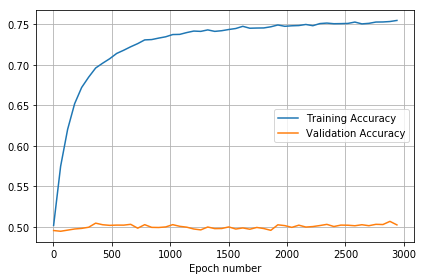

[[4568 4542]
 [5430 5460]]

Validation Avg: [ 0.5014]
Train Avg: [ 0.7535625]


[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]    [0]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]    [0]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]    [1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]    [0]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [2]:
test_size = 0.2
epochs = [1000, 2000, 3000]
b_size = 100
tries = 1
exp = 'final_30'


histories = np.array([])

X, Y = import_data()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print("\nTraining examples: " +  str(X_train.shape[0]))
print("Test examples: " +  str(X_test.shape[0]))


input_size = len(X_train[0])


filters = [int(input_size/4), int(input_size), int(input_size*4)]
kernel_size = [ input_size ]

print(kernel_size)

for f in filters:
    for ks in kernel_size:
        for ep in epochs:
            avg_val = np.array([])
            avg_train = np.array([])
            for t in range(tries):
                print("Epochs: " + str(ep) + '  -------  Try: ' + str(t))
                classifier = create_CCN_model(len(X_train[0]), f, ks)
                classifier.summary()

                history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=ep, batch_size=b_size, verbose=1)
                result = classifier.evaluate(X_test, Y_test, batch_size=b_size)

                avg_val = np.append(avg_val, result[2])
                avg_train = np.append(avg_train, history.history['acc'][-1])
                histories = np.append(histories, history)

                val_acc = history.history['val_acc']
                train_acc = history.history['acc']

                with open(exp + '/acc_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) +'_' + str(f) + '_' + str(ks) + '.txt', "w") as file:
                    file.write('val_acc  ' + str(val_acc))
                    file.write('\ntrain_acc  ' + str(train_acc))

                fig, ax = draw_figure([train_acc], 'Training Accuracy')
                fig, ax = draw_figure([val_acc], 'Validation Accuracy', fig, ax)

                ax.grid('on')
                fig.tight_layout() 
                fig.savefig(exp + '/graph_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(f) + '_' + str(ks) + '.pdf')
                plt.show() 



                print(confusion_matrix(classifier.predict(X_test)>0.5, Y_test))

                print("\nValidation Avg: " + str(avg_val))
                print("Train Avg: " + str(avg_train))
                print("\n")

                c = 0
                classifications = (classifier.predict(X_test) > 0.5 ) == Y_test
                for i, flag in enumerate(classifications):
                    if(flag == False and c<=10):
                        print(str(X_test[i]) + "    " + str(Y_test[i]))
                        c += 1

                c = 0
                with open(exp + '/data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(f) + '_' + str(ks) +'.txt', "w") as file:
                    file.write(str(confusion_matrix(classifier.predict(X_test)>0.5, Y_test)))

                    file.write("\nValidation Avg: " + str(np.average(avg_val)))
                    file.write("\nTrain Avg: " + str(np.average(avg_train)))
                    file.write("\n\n")

                    for i, flag in enumerate(classifications):
                        if(flag == False and c<=10):
                            file.write('\n' + str(X_test[i]) + "    " + str(Y_test[i]))
                            c += 1


                print("\n\n")
            print("\n Overall for: " + str(len(X_train[0])) + '_' + str(ep))
            print(avg_val)
            print(avg_train)
            print("\nOVERALL VAL: " + str(np.average(avg_val)))
            print("OVERALL TRAIN: " + str(np.average(avg_train)))
            print("\n")

            with open(exp + '/data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(f) + '_' + str(ks) + '.txt', "w") as file:
                file.write(str(avg_val))
                file.write("\n" + str(avg_train))
                file.write("\n\nOVERALL VAL: " + str(np.average(avg_val)))
                file.write("\nOVERALL TRAIN: " + str(np.average(avg_train)))

In [3]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.pdf', show_shapes=True, show_layer_names=False)

